In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [7]:
neo=pd.read_csv(r"/Users/abdulrahmanalabdali/Desktop/neo.csv")
neo

id                 name  est_diameter_min  est_diameter_max  \
0       2162635  162635 (2000 SS164)          1.198271          2.679415   
1       2277475    277475 (2005 WK4)          0.265800          0.594347   
2       2512244   512244 (2015 YE18)          0.722030          1.614507   
3       3596030          (2012 BV13)          0.096506          0.215794   
4       3667127          (2014 GE35)          0.255009          0.570217   
...         ...                  ...               ...               ...   
90831   3763337           (2016 VX1)          0.026580          0.059435   
90832   3837603           (2019 AD3)          0.016771          0.037501   
90833  54017201           (2020 JP3)          0.031956          0.071456   
90834  54115824           (2021 CN5)          0.007321          0.016370   
90835  54205447           (2021 TW7)          0.039862          0.089133   

       relative_velocity  miss_distance orbiting_body  sentry_object  \
0           13569.249224   5.483974e+07         Earth          False   
1           73588.726663   6.143813e+07         Earth          False   
2          114258.692129   4.979872e+07         Earth          False   
3           24764.303138   2.543497e+07         Earth          False   
4           42737.733765   4.627557e+07         Earth          False   
...                  ...            ...           ...            ...   
90831       52078.886692   1.230039e+07         Earth          False   
90832       46114.605073   5.432121e+07         Earth          False   
90833        7566.807732   2.840077e+07         Earth          False   
90834       69199.154484   6.869206e+07         Earth          False   
90835       27024.455553   5.977213e+07         Earth          False   

       absolute_magnitude  hazardous  
0                   16.73      False  
1                   20.00       True  
2                   17.83      False  
3                   22.20      False  
4                   20.09       True  
...                   ...        ...  
90831               25.00      False  
90832               26.00      False  
90833               24.60      False  
90834               27.80      False  
90835               24.12      False  

[90836 rows x 10 columns]

In [8]:
neo_vel_mean=neo.groupby(['name']).agg({'relative_velocity' :'mean'})
neo_miss_mean=neo.groupby(['name']).agg({'miss_distance' :'mean'})
neo_vel_mean

relative_velocity
name                                       
(1983 LC)                      60192.646491
(1986 NA)                      51810.077045
(1988 NE)                      22815.738845
(1989 AZ)                      55184.046572
(1991 GO)                      92501.896829
...                                     ...
9950 ESA (1990 VB)             29511.503126
99799 (2002 LJ3)               28970.538534
99907 (1989 VA)                79729.216475
99935 (2002 AV4)               78607.394659
99942 Apophis (2004 MN4)       34678.852704

[27423 rows x 1 columns]

In [9]:
velocity_avg = neo.groupby('name', as_index=False).agg({'relative_velocity':'mean'})
velocity_avg.columns = ['name', 'velocity_avg']
neo = pd.merge(neo, velocity_avg, on='name')
neo=neo.drop(columns=['relative_velocity'])
neo
#data.drop_duplicates(subset=['name'])

id                 name  est_diameter_min  est_diameter_max  \
0       2162635  162635 (2000 SS164)          1.198271          2.679415   
1       2277475    277475 (2005 WK4)          0.265800          0.594347   
2       2277475    277475 (2005 WK4)          0.265800          0.594347   
3       2277475    277475 (2005 WK4)          0.265800          0.594347   
4       2277475    277475 (2005 WK4)          0.265800          0.594347   
...         ...                  ...               ...               ...   
90831   3779523          (2017 OL68)          0.176423          0.394494   
90832  54272756           (2022 GA4)          0.232571          0.520044   
90833  54225015           (2021 WR3)          0.310853          0.695088   
90834   3735178         (2015 VK142)          0.350393          0.783502   
90835   3092229           (1999 LV7)          0.347180          0.776319   

       miss_distance orbiting_body  sentry_object  absolute_magnitude  \
0       5.483974e+07         Earth          False               16.73   
1       6.143813e+07         Earth          False               20.00   
2       4.524364e+07         Earth          False               20.00   
3       2.916569e+07         Earth          False               20.00   
4       1.413990e+07         Earth          False               20.00   
...              ...           ...            ...                 ...   
90831   4.064435e+07         Earth          False               20.89   
90832   3.376447e+07         Earth          False               20.29   
90833   6.254685e+07         Earth          False               19.66   
90834   6.344693e+07         Earth          False               19.40   
90835   2.754936e+07         Earth          False               19.42   

       hazardous   velocity_avg  
0          False   13569.249224  
1           True   37187.969051  
2           True   37187.969051  
3           True   37187.969051  
4           True   37187.969051  
...          ...            ...  
90831      False    4649.668900  
90832      False   34153.422552  
90833      False  103342.744852  
90834      False   65388.349843  
90835      False   60242.316201  

[90836 rows x 10 columns]

In [10]:
miss_distance_avg = neo.groupby('name', as_index=False).agg({'miss_distance':'mean'})
miss_distance_avg.columns = ['name', 'miss_distance_avg']
neo = pd.merge(neo, miss_distance_avg, on='name')
neo= neo.drop(columns=['miss_distance'])
neo
neo_cleaned = neo.drop_duplicates(subset=['name'])

In [11]:
neo_cleaned

id                 name  est_diameter_min  est_diameter_max  \
0       2162635  162635 (2000 SS164)          1.198271          2.679415   
1       2277475    277475 (2005 WK4)          0.265800          0.594347   
25      2512244   512244 (2015 YE18)          0.722030          1.614507   
32      3596030          (2012 BV13)          0.096506          0.215794   
39      3667127          (2014 GE35)          0.255009          0.570217   
...         ...                  ...               ...               ...   
90831   3779523          (2017 OL68)          0.176423          0.394494   
90832  54272756           (2022 GA4)          0.232571          0.520044   
90833  54225015           (2021 WR3)          0.310853          0.695088   
90834   3735178         (2015 VK142)          0.350393          0.783502   
90835   3092229           (1999 LV7)          0.347180          0.776319   

      orbiting_body  sentry_object  absolute_magnitude  hazardous  \
0             Earth          False               16.73      False   
1             Earth          False               20.00       True   
25            Earth          False               17.83      False   
32            Earth          False               22.20      False   
39            Earth          False               20.09       True   
...             ...            ...                 ...        ...   
90831         Earth          False               20.89      False   
90832         Earth          False               20.29      False   
90833         Earth          False               19.66      False   
90834         Earth          False               19.40      False   
90835         Earth          False               19.42      False   

        velocity_avg  miss_distance_avg  
0       13569.249224       5.483974e+07  
1       37187.969051       3.504758e+07  
25      95258.903671       4.794386e+07  
32      43409.550520       4.313247e+07  
39      42580.419393       4.659339e+07  
...              ...                ...  
90831    4649.668900       4.064435e+07  
90832   34153.422552       3.376447e+07  
90833  103342.744852       6.254685e+07  
90834   65388.349843       6.344693e+07  
90835   60242.316201       2.754936e+07  

[27423 rows x 10 columns]

In [12]:
mean_diatemer = neo_cleaned[['est_diameter_min','est_diameter_max']].mean(axis=1)
neo_cleaned ['mean_diameter'] = neo_cleaned[['est_diameter_min','est_diameter_max']].mean(axis=1)
neo_cleaned

/var/folders/_3/p7g0czqs2mn2vrf8z2svm6ph0000gn/T/ipykernel_96687/2014933289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neo_cleaned ['mean_diameter'] = neo_cleaned[['est_diameter_min','est_diameter_max']].mean(axis=1)


id                 name  est_diameter_min  est_diameter_max  \
0       2162635  162635 (2000 SS164)          1.198271          2.679415   
1       2277475    277475 (2005 WK4)          0.265800          0.594347   
25      2512244   512244 (2015 YE18)          0.722030          1.614507   
32      3596030          (2012 BV13)          0.096506          0.215794   
39      3667127          (2014 GE35)          0.255009          0.570217   
...         ...                  ...               ...               ...   
90831   3779523          (2017 OL68)          0.176423          0.394494   
90832  54272756           (2022 GA4)          0.232571          0.520044   
90833  54225015           (2021 WR3)          0.310853          0.695088   
90834   3735178         (2015 VK142)          0.350393          0.783502   
90835   3092229           (1999 LV7)          0.347180          0.776319   

      orbiting_body  sentry_object  absolute_magnitude  hazardous  \
0             Earth          False               16.73      False   
1             Earth          False               20.00       True   
25            Earth          False               17.83      False   
32            Earth          False               22.20      False   
39            Earth          False               20.09       True   
...             ...            ...                 ...        ...   
90831         Earth          False               20.89      False   
90832         Earth          False               20.29      False   
90833         Earth          False               19.66      False   
90834         Earth          False               19.40      False   
90835         Earth          False               19.42      False   

        velocity_avg  miss_distance_avg  mean_diameter  
0       13569.249224       5.483974e+07       1.938843  
1       37187.969051       3.504758e+07       0.430073  
25      95258.903671       4.794386e+07       1.168268  
32      43409.550520       4.313247e+07       0.156150  
39      42580.419393       4.659339e+07       0.412613  
...              ...                ...            ...  
90831    4649.668900       4.064435e+07       0.285458  
90832   34153.422552       3.376447e+07       0.376307  
90833  103342.744852       6.254685e+07       0.502971  
90834   65388.349843       6.344693e+07       0.566947  
90835   60242.316201       2.754936e+07       0.561749  

[27423 rows x 11 columns]

In [13]:
neo_cleaned['hazardous']=neo_cleaned['hazardous'].astype('int')

/var/folders/_3/p7g0czqs2mn2vrf8z2svm6ph0000gn/T/ipykernel_96687/2053308956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neo_cleaned['hazardous']=neo_cleaned['hazardous'].astype('int')


In [14]:
neo_cleaned

id                 name  est_diameter_min  est_diameter_max  \
0       2162635  162635 (2000 SS164)          1.198271          2.679415   
1       2277475    277475 (2005 WK4)          0.265800          0.594347   
25      2512244   512244 (2015 YE18)          0.722030          1.614507   
32      3596030          (2012 BV13)          0.096506          0.215794   
39      3667127          (2014 GE35)          0.255009          0.570217   
...         ...                  ...               ...               ...   
90831   3779523          (2017 OL68)          0.176423          0.394494   
90832  54272756           (2022 GA4)          0.232571          0.520044   
90833  54225015           (2021 WR3)          0.310853          0.695088   
90834   3735178         (2015 VK142)          0.350393          0.783502   
90835   3092229           (1999 LV7)          0.347180          0.776319   

      orbiting_body  sentry_object  absolute_magnitude  hazardous  \
0             Earth          False               16.73          0   
1             Earth          False               20.00          1   
25            Earth          False               17.83          0   
32            Earth          False               22.20          0   
39            Earth          False               20.09          1   
...             ...            ...                 ...        ...   
90831         Earth          False               20.89          0   
90832         Earth          False               20.29          0   
90833         Earth          False               19.66          0   
90834         Earth          False               19.40          0   
90835         Earth          False               19.42          0   

        velocity_avg  miss_distance_avg  mean_diameter  
0       13569.249224       5.483974e+07       1.938843  
1       37187.969051       3.504758e+07       0.430073  
25      95258.903671       4.794386e+07       1.168268  
32      43409.550520       4.313247e+07       0.156150  
39      42580.419393       4.659339e+07       0.412613  
...              ...                ...            ...  
90831    4649.668900       4.064435e+07       0.285458  
90832   34153.422552       3.376447e+07       0.376307  
90833  103342.744852       6.254685e+07       0.502971  
90834   65388.349843       6.344693e+07       0.566947  
90835   60242.316201       2.754936e+07       0.561749  

[27423 rows x 11 columns]

In [15]:
neo_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27423 entries, 0 to 90835
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  27423 non-null  int64  
 1   name                27423 non-null  object 
 2   est_diameter_min    27423 non-null  float64
 3   est_diameter_max    27423 non-null  float64
 4   orbiting_body       27423 non-null  object 
 5   sentry_object       27423 non-null  bool   
 6   absolute_magnitude  27423 non-null  float64
 7   hazardous           27423 non-null  int64  
 8   velocity_avg        27423 non-null  float64
 9   miss_distance_avg   27423 non-null  float64
 10  mean_diameter       27423 non-null  float64
dtypes: bool(1), float64(6), int64(2), object(2)
memory usage: 2.3+ MB


In [16]:
neo_cleaned['name'].value_counts()

162635 (2000 SS164)    1
(2017 QL35)            1
(2019 JO1)             1
(2017 SR10)            1
(2017 SB12)            1
                      ..
(2019 AS13)            1
(2006 DB1)             1
285990 (2001 SK9)      1
(2018 CC1)             1
(1999 LV7)             1
Name: name, Length: 27423, dtype: int64

In [17]:
neo_cleaned.corr()

id  est_diameter_min  est_diameter_max  \
id                  1.000000         -0.131602         -0.131602   
est_diameter_min   -0.131602          1.000000          1.000000   
est_diameter_max   -0.131602          1.000000          1.000000   
sentry_object            NaN               NaN               NaN   
absolute_magnitude  0.260412         -0.506269         -0.506269   
hazardous          -0.101526          0.138320          0.138320   
velocity_avg       -0.057882          0.197504          0.197504   
miss_distance_avg  -0.113796          0.249389          0.249389   
mean_diameter      -0.131602          1.000000          1.000000   

                    sentry_object  absolute_magnitude  hazardous  \
id                            NaN            0.260412  -0.101526   
est_diameter_min              NaN           -0.506269   0.138320   
est_diameter_max              NaN           -0.506269   0.138320   
sentry_object                 NaN                 NaN        NaN   
absolute_magnitude            NaN            1.000000  -0.323234   
hazardous                     NaN           -0.323234   1.000000   
velocity_avg                  NaN           -0.348273   0.232404   
miss_distance_avg             NaN           -0.531761   0.086556   
mean_diameter                 NaN           -0.506269   0.138320   

                    velocity_avg  miss_distance_avg  mean_diameter  
id                     -0.057882          -0.113796      -0.131602  
est_diameter_min        0.197504           0.249389       1.000000  
est_diameter_max        0.197504           0.249389       1.000000  
sentry_object                NaN                NaN            NaN  
absolute_magnitude     -0.348273          -0.531761      -0.506269  
hazardous               0.232404           0.086556       0.138320  
velocity_avg            1.000000           0.197884       0.197504  
miss_distance_avg       0.197884           1.000000       0.249389  
mean_diameter           0.197504           0.249389       1.000000

In [18]:
df = neo_cleaned.drop(['sentry_object','orbiting_body'], axis=1)
df

id                 name  est_diameter_min  est_diameter_max  \
0       2162635  162635 (2000 SS164)          1.198271          2.679415   
1       2277475    277475 (2005 WK4)          0.265800          0.594347   
25      2512244   512244 (2015 YE18)          0.722030          1.614507   
32      3596030          (2012 BV13)          0.096506          0.215794   
39      3667127          (2014 GE35)          0.255009          0.570217   
...         ...                  ...               ...               ...   
90831   3779523          (2017 OL68)          0.176423          0.394494   
90832  54272756           (2022 GA4)          0.232571          0.520044   
90833  54225015           (2021 WR3)          0.310853          0.695088   
90834   3735178         (2015 VK142)          0.350393          0.783502   
90835   3092229           (1999 LV7)          0.347180          0.776319   

       absolute_magnitude  hazardous   velocity_avg  miss_distance_avg  \
0                   16.73          0   13569.249224       5.483974e+07   
1                   20.00          1   37187.969051       3.504758e+07   
25                  17.83          0   95258.903671       4.794386e+07   
32                  22.20          0   43409.550520       4.313247e+07   
39                  20.09          1   42580.419393       4.659339e+07   
...                   ...        ...            ...                ...   
90831               20.89          0    4649.668900       4.064435e+07   
90832               20.29          0   34153.422552       3.376447e+07   
90833               19.66          0  103342.744852       6.254685e+07   
90834               19.40          0   65388.349843       6.344693e+07   
90835               19.42          0   60242.316201       2.754936e+07   

       mean_diameter  
0           1.938843  
1           0.430073  
25          1.168268  
32          0.156150  
39          0.412613  
...              ...  
90831       0.285458  
90832       0.376307  
90833       0.502971  
90834       0.566947  
90835       0.561749  

[27423 rows x 9 columns]

In [19]:
df.corr()

id  est_diameter_min  est_diameter_max  \
id                  1.000000         -0.131602         -0.131602   
est_diameter_min   -0.131602          1.000000          1.000000   
est_diameter_max   -0.131602          1.000000          1.000000   
absolute_magnitude  0.260412         -0.506269         -0.506269   
hazardous          -0.101526          0.138320          0.138320   
velocity_avg       -0.057882          0.197504          0.197504   
miss_distance_avg  -0.113796          0.249389          0.249389   
mean_diameter      -0.131602          1.000000          1.000000   

                    absolute_magnitude  hazardous  velocity_avg  \
id                            0.260412  -0.101526     -0.057882   
est_diameter_min             -0.506269   0.138320      0.197504   
est_diameter_max             -0.506269   0.138320      0.197504   
absolute_magnitude            1.000000  -0.323234     -0.348273   
hazardous                    -0.323234   1.000000      0.232404   
velocity_avg                 -0.348273   0.232404      1.000000   
miss_distance_avg            -0.531761   0.086556      0.197884   
mean_diameter                -0.506269   0.138320      0.197504   

                    miss_distance_avg  mean_diameter  
id                          -0.113796      -0.131602  
est_diameter_min             0.249389       1.000000  
est_diameter_max             0.249389       1.000000  
absolute_magnitude          -0.531761      -0.506269  
hazardous                    0.086556       0.138320  
velocity_avg                 0.197884       0.197504  
miss_distance_avg            1.000000       0.249389  
mean_diameter                0.249389       1.000000

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27423 entries, 0 to 90835
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  27423 non-null  int64  
 1   name                27423 non-null  object 
 2   est_diameter_min    27423 non-null  float64
 3   est_diameter_max    27423 non-null  float64
 4   absolute_magnitude  27423 non-null  float64
 5   hazardous           27423 non-null  int64  
 6   velocity_avg        27423 non-null  float64
 7   miss_distance_avg   27423 non-null  float64
 8   mean_diameter       27423 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.1+ MB


In [21]:
df.set_index('name', inplace=True)

In [22]:
df.corr()

id  est_diameter_min  est_diameter_max  \
id                  1.000000         -0.131602         -0.131602   
est_diameter_min   -0.131602          1.000000          1.000000   
est_diameter_max   -0.131602          1.000000          1.000000   
absolute_magnitude  0.260412         -0.506269         -0.506269   
hazardous          -0.101526          0.138320          0.138320   
velocity_avg       -0.057882          0.197504          0.197504   
miss_distance_avg  -0.113796          0.249389          0.249389   
mean_diameter      -0.131602          1.000000          1.000000   

                    absolute_magnitude  hazardous  velocity_avg  \
id                            0.260412  -0.101526     -0.057882   
est_diameter_min             -0.506269   0.138320      0.197504   
est_diameter_max             -0.506269   0.138320      0.197504   
absolute_magnitude            1.000000  -0.323234     -0.348273   
hazardous                    -0.323234   1.000000      0.232404   
velocity_avg                 -0.348273   0.232404      1.000000   
miss_distance_avg            -0.531761   0.086556      0.197884   
mean_diameter                -0.506269   0.138320      0.197504   

                    miss_distance_avg  mean_diameter  
id                          -0.113796      -0.131602  
est_diameter_min             0.249389       1.000000  
est_diameter_max             0.249389       1.000000  
absolute_magnitude          -0.531761      -0.506269  
hazardous                    0.086556       0.138320  
velocity_avg                 0.197884       0.197504  
miss_distance_avg            1.000000       0.249389  
mean_diameter                0.249389       1.000000

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27423 entries, 162635 (2000 SS164) to (1999 LV7)
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  27423 non-null  int64  
 1   est_diameter_min    27423 non-null  float64
 2   est_diameter_max    27423 non-null  float64
 3   absolute_magnitude  27423 non-null  float64
 4   hazardous           27423 non-null  int64  
 5   velocity_avg        27423 non-null  float64
 6   miss_distance_avg   27423 non-null  float64
 7   mean_diameter       27423 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.9+ MB


<AxesSubplot:ylabel='name'>

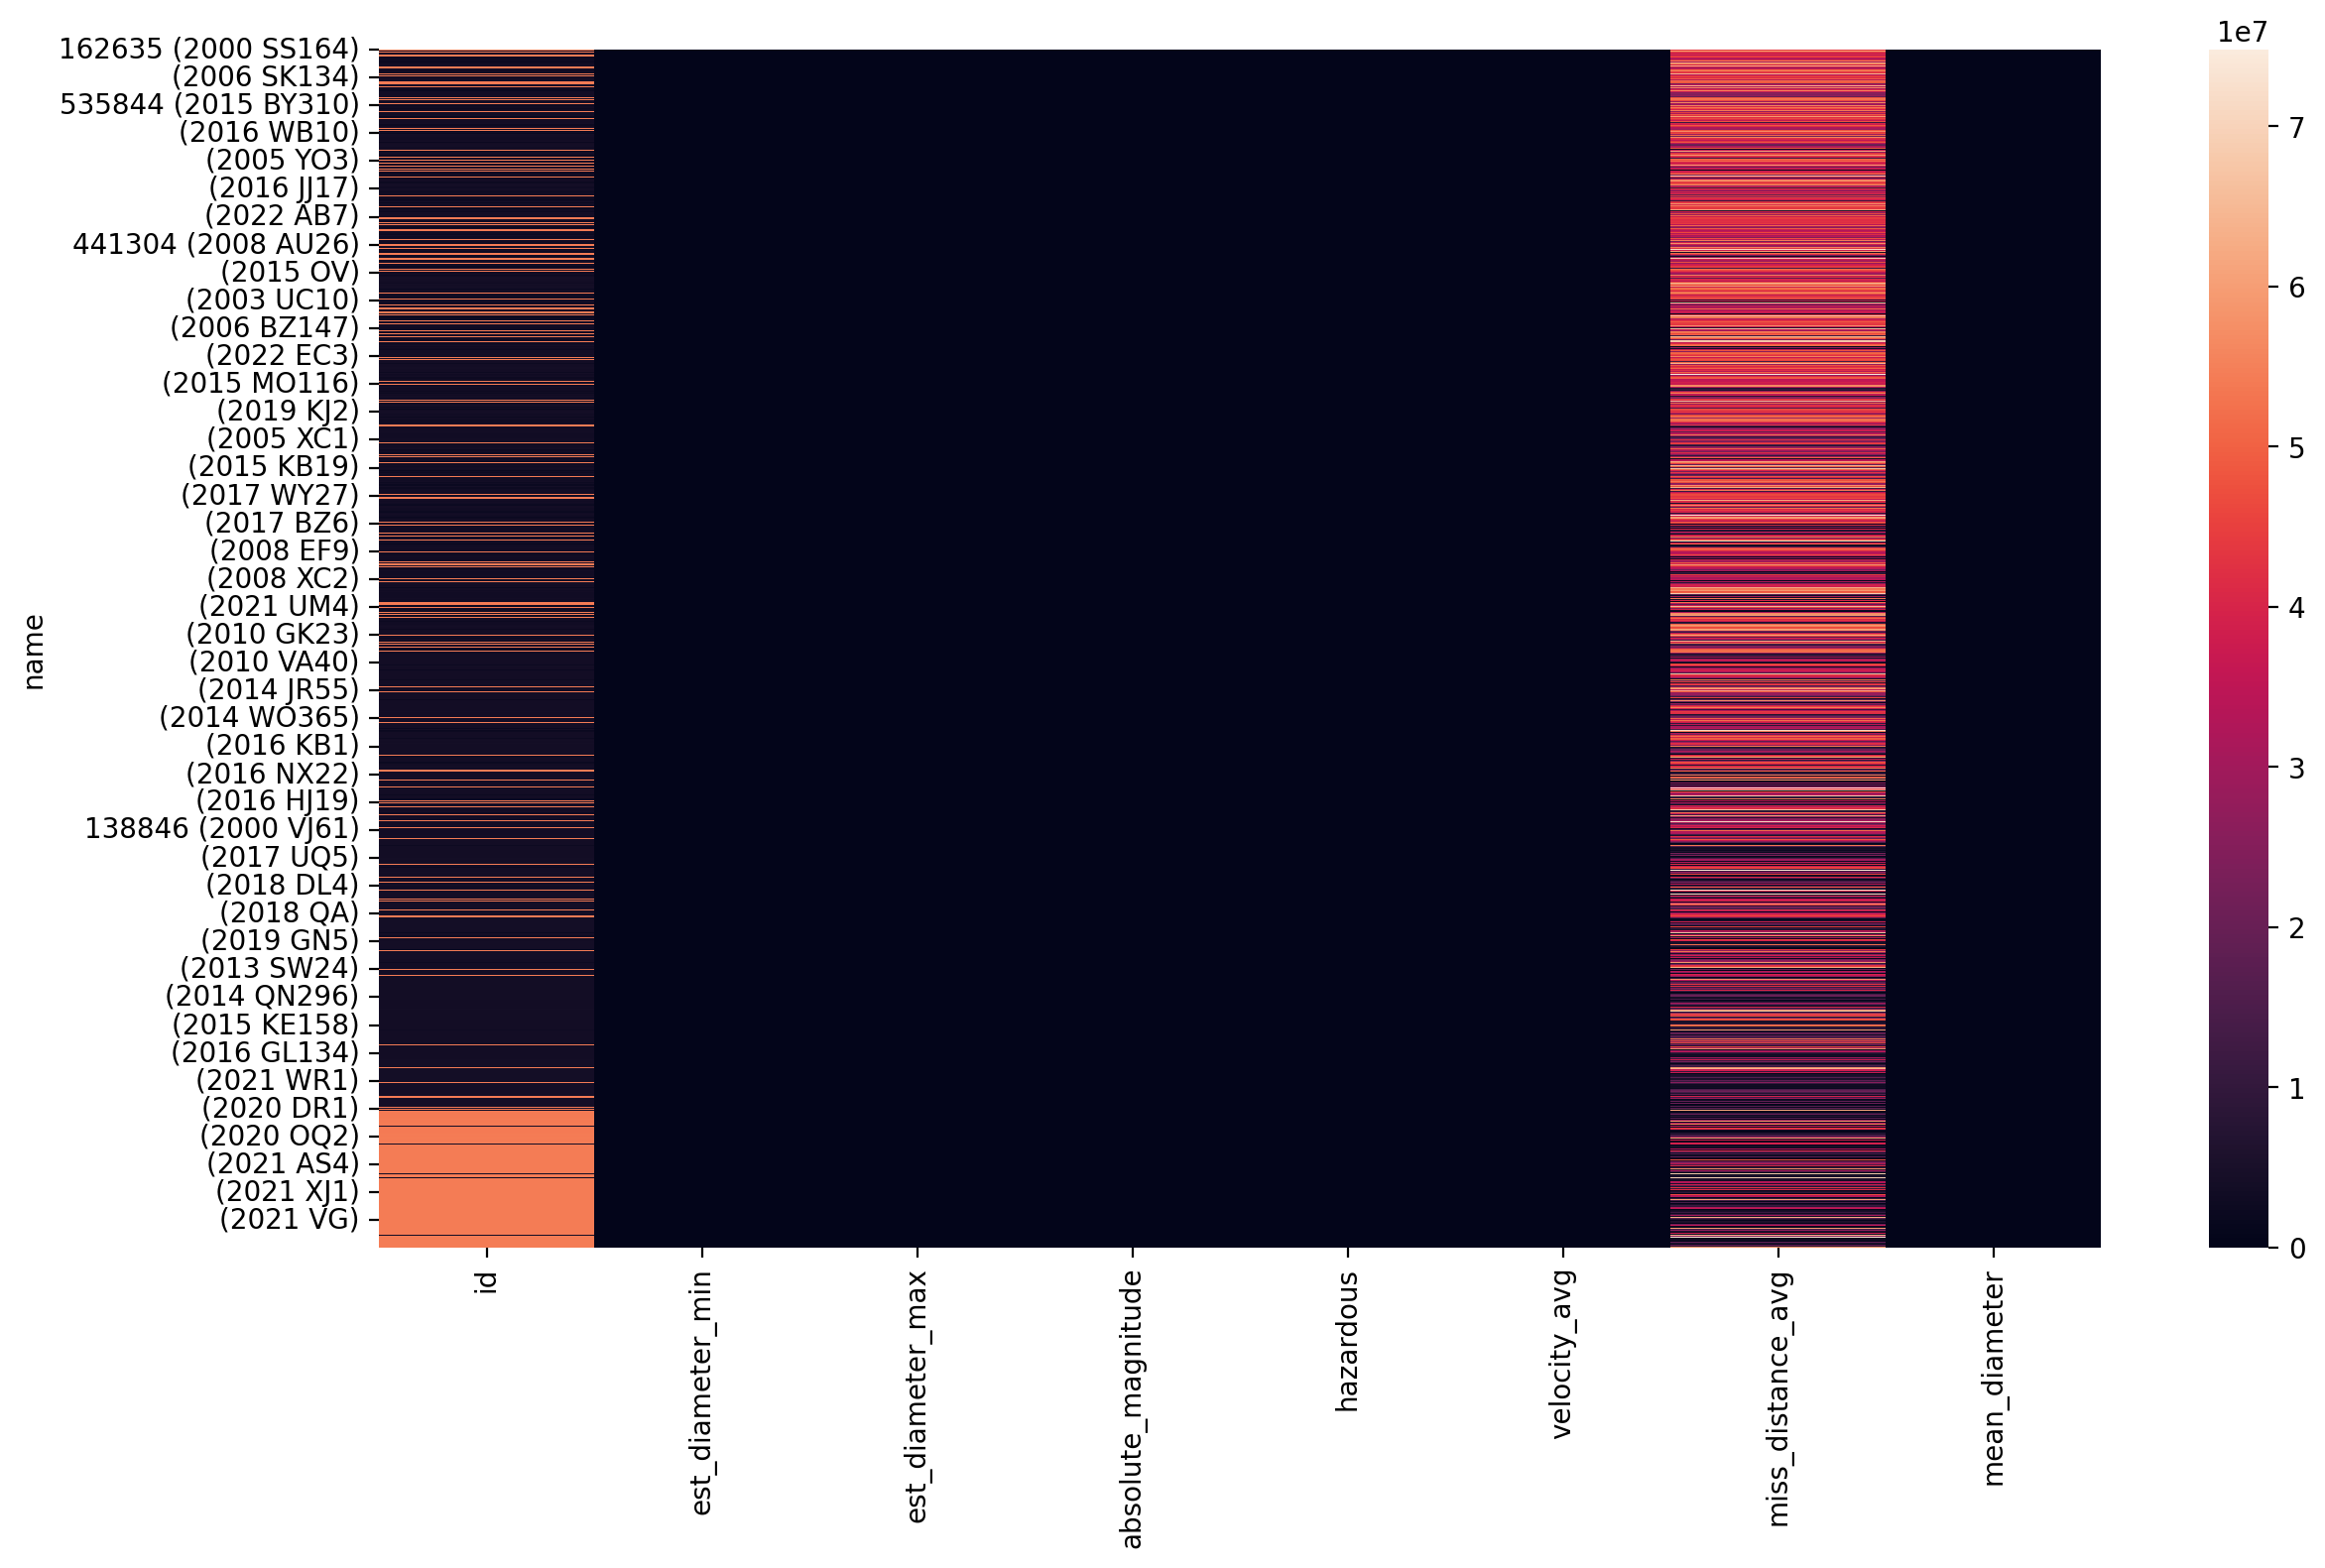

In [28]:
plt.figure(figsize=(14,8), dpi=200)
sns.heatmap(df)

<AxesSubplot:xlabel='mean_diameter', ylabel='miss_distance_avg'>

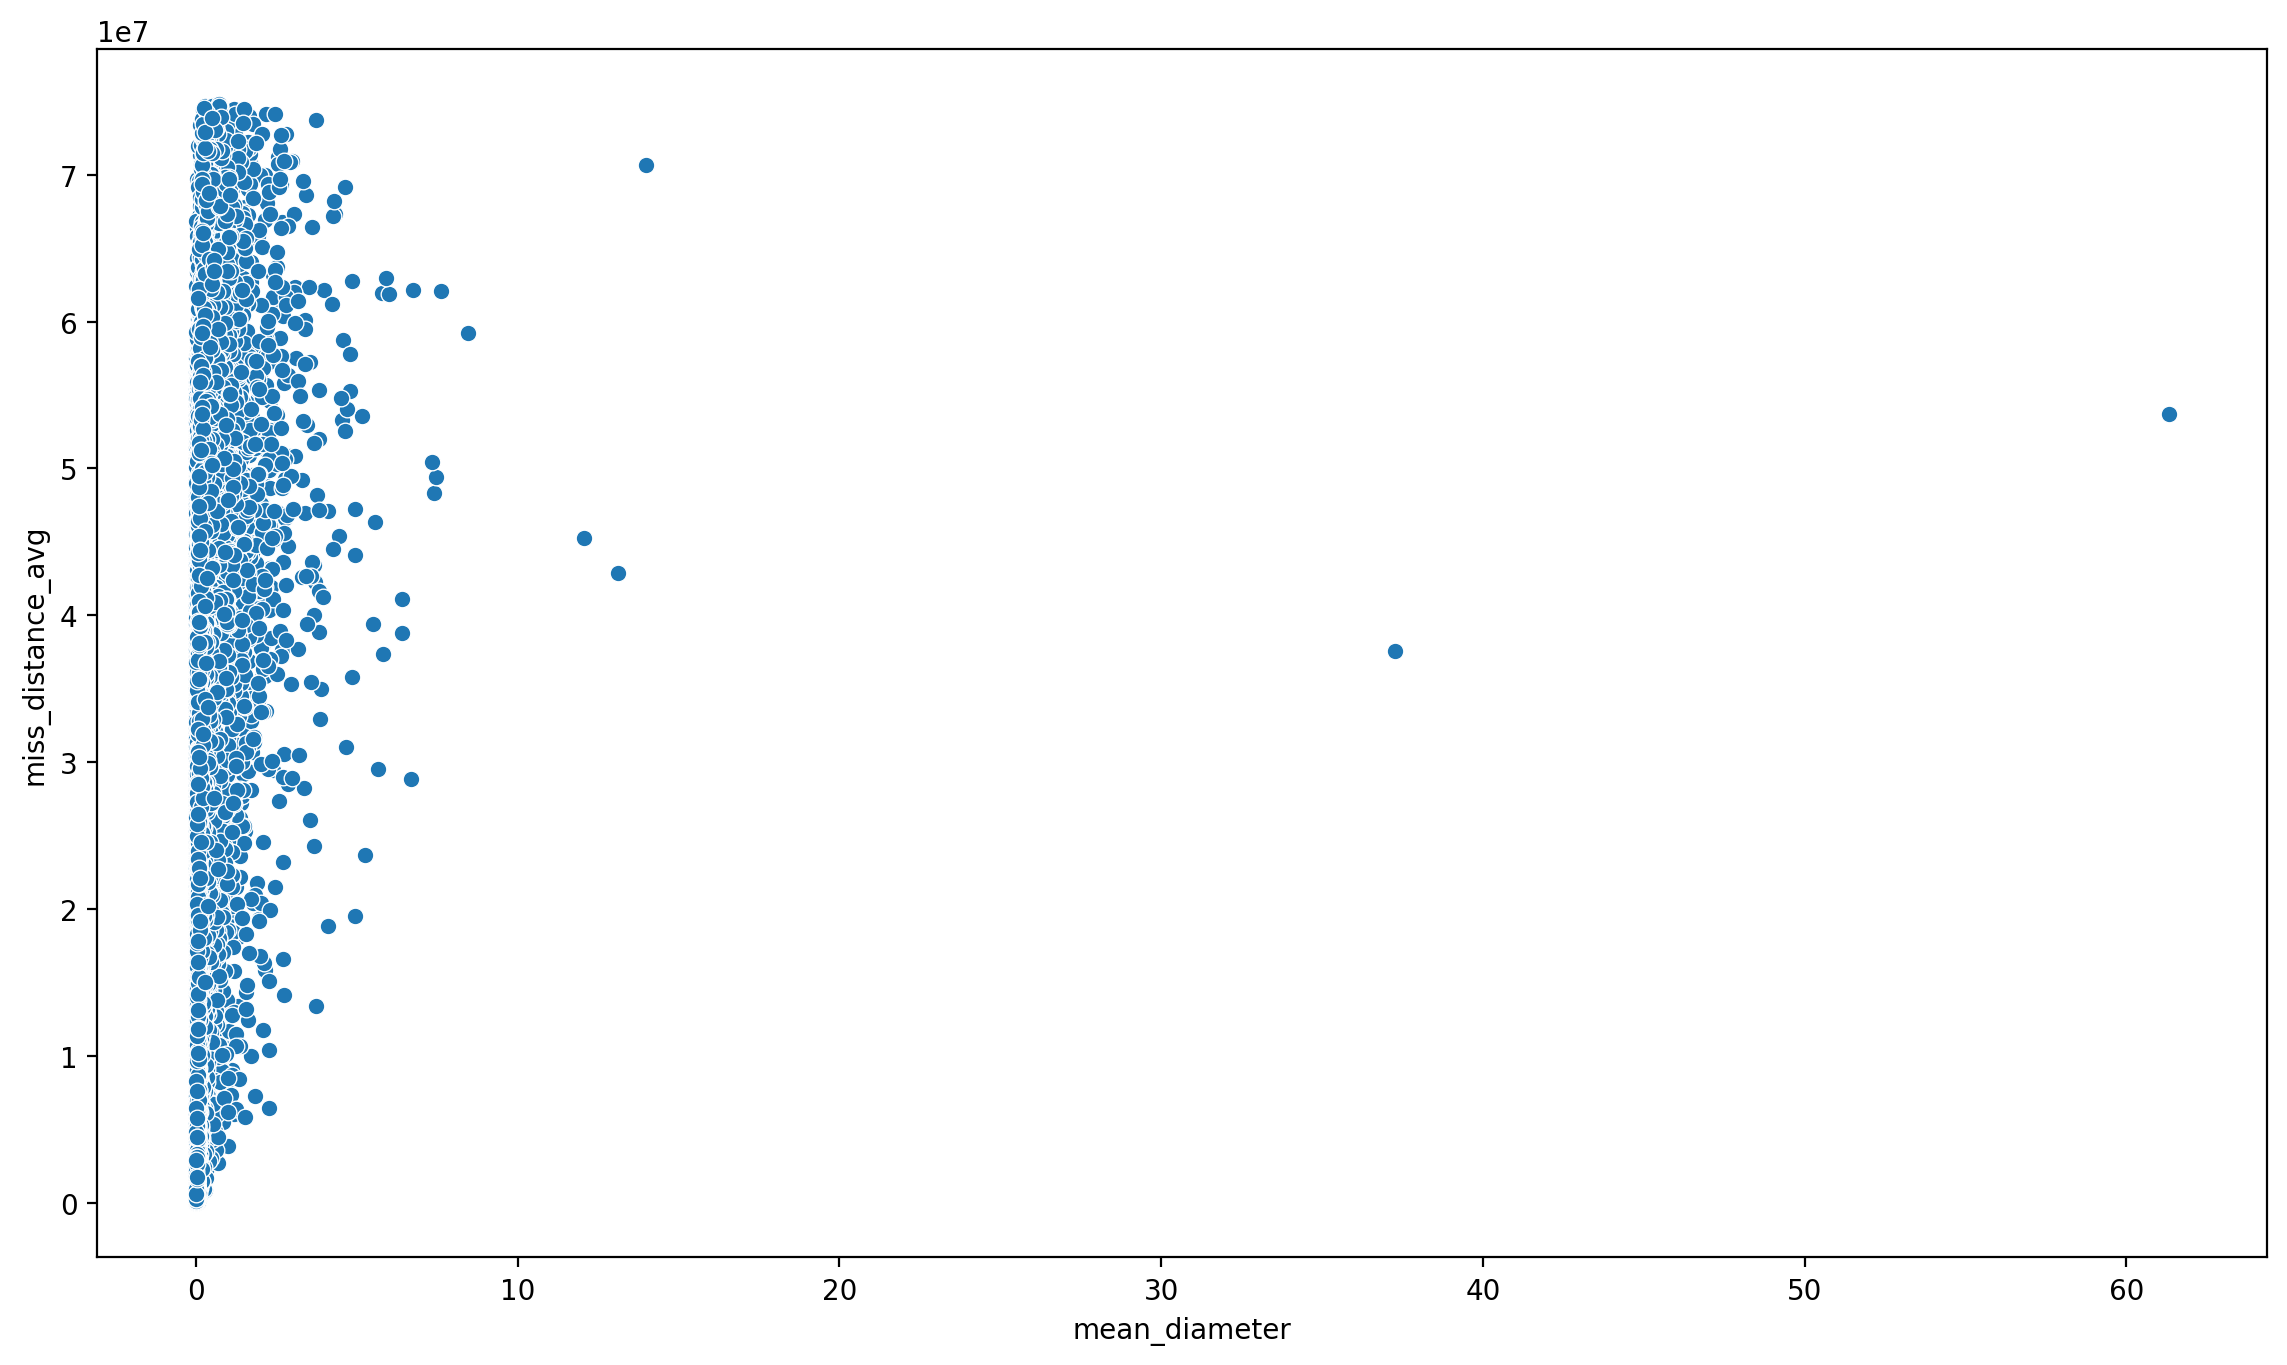

In [29]:
plt.figure(figsize=(14,8), dpi=200)
sns.scatterplot(data=df, x='mean_diameter', y='miss_distance_avg')

<AxesSubplot:xlabel='mean_diameter', ylabel='absolute_magnitude'>

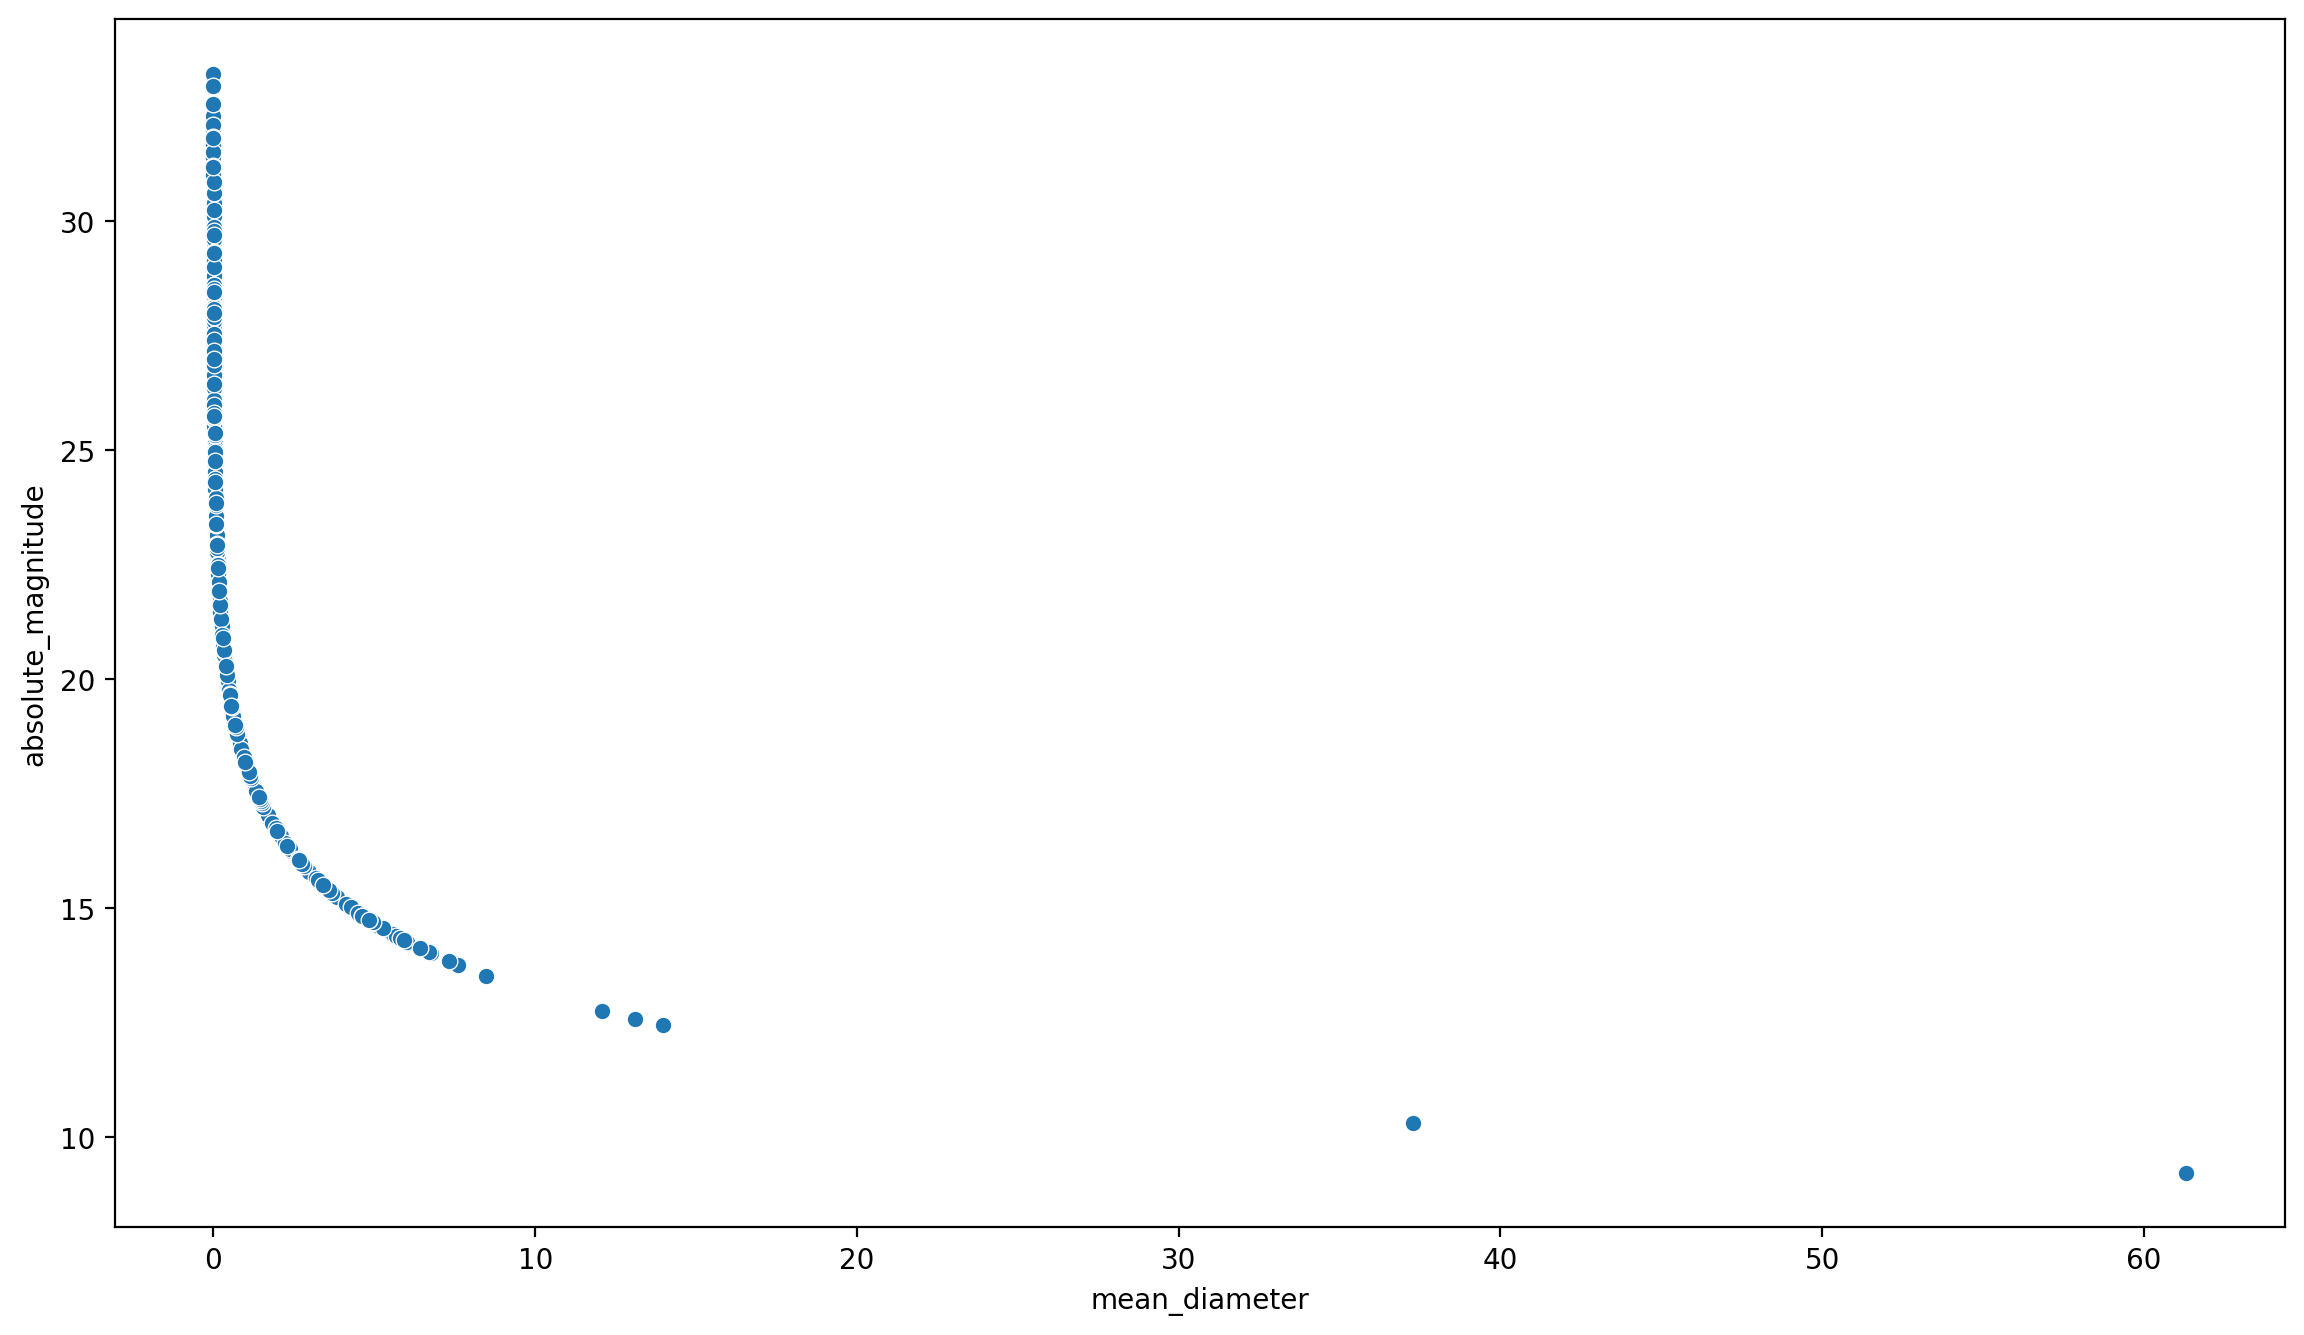

In [30]:
plt.figure(figsize=(14,8), dpi=200)
sns.scatterplot(data=df, x='mean_diameter', y='absolute_magnitude')

<AxesSubplot:xlabel='absolute_magnitude', ylabel='mean_diameter'>

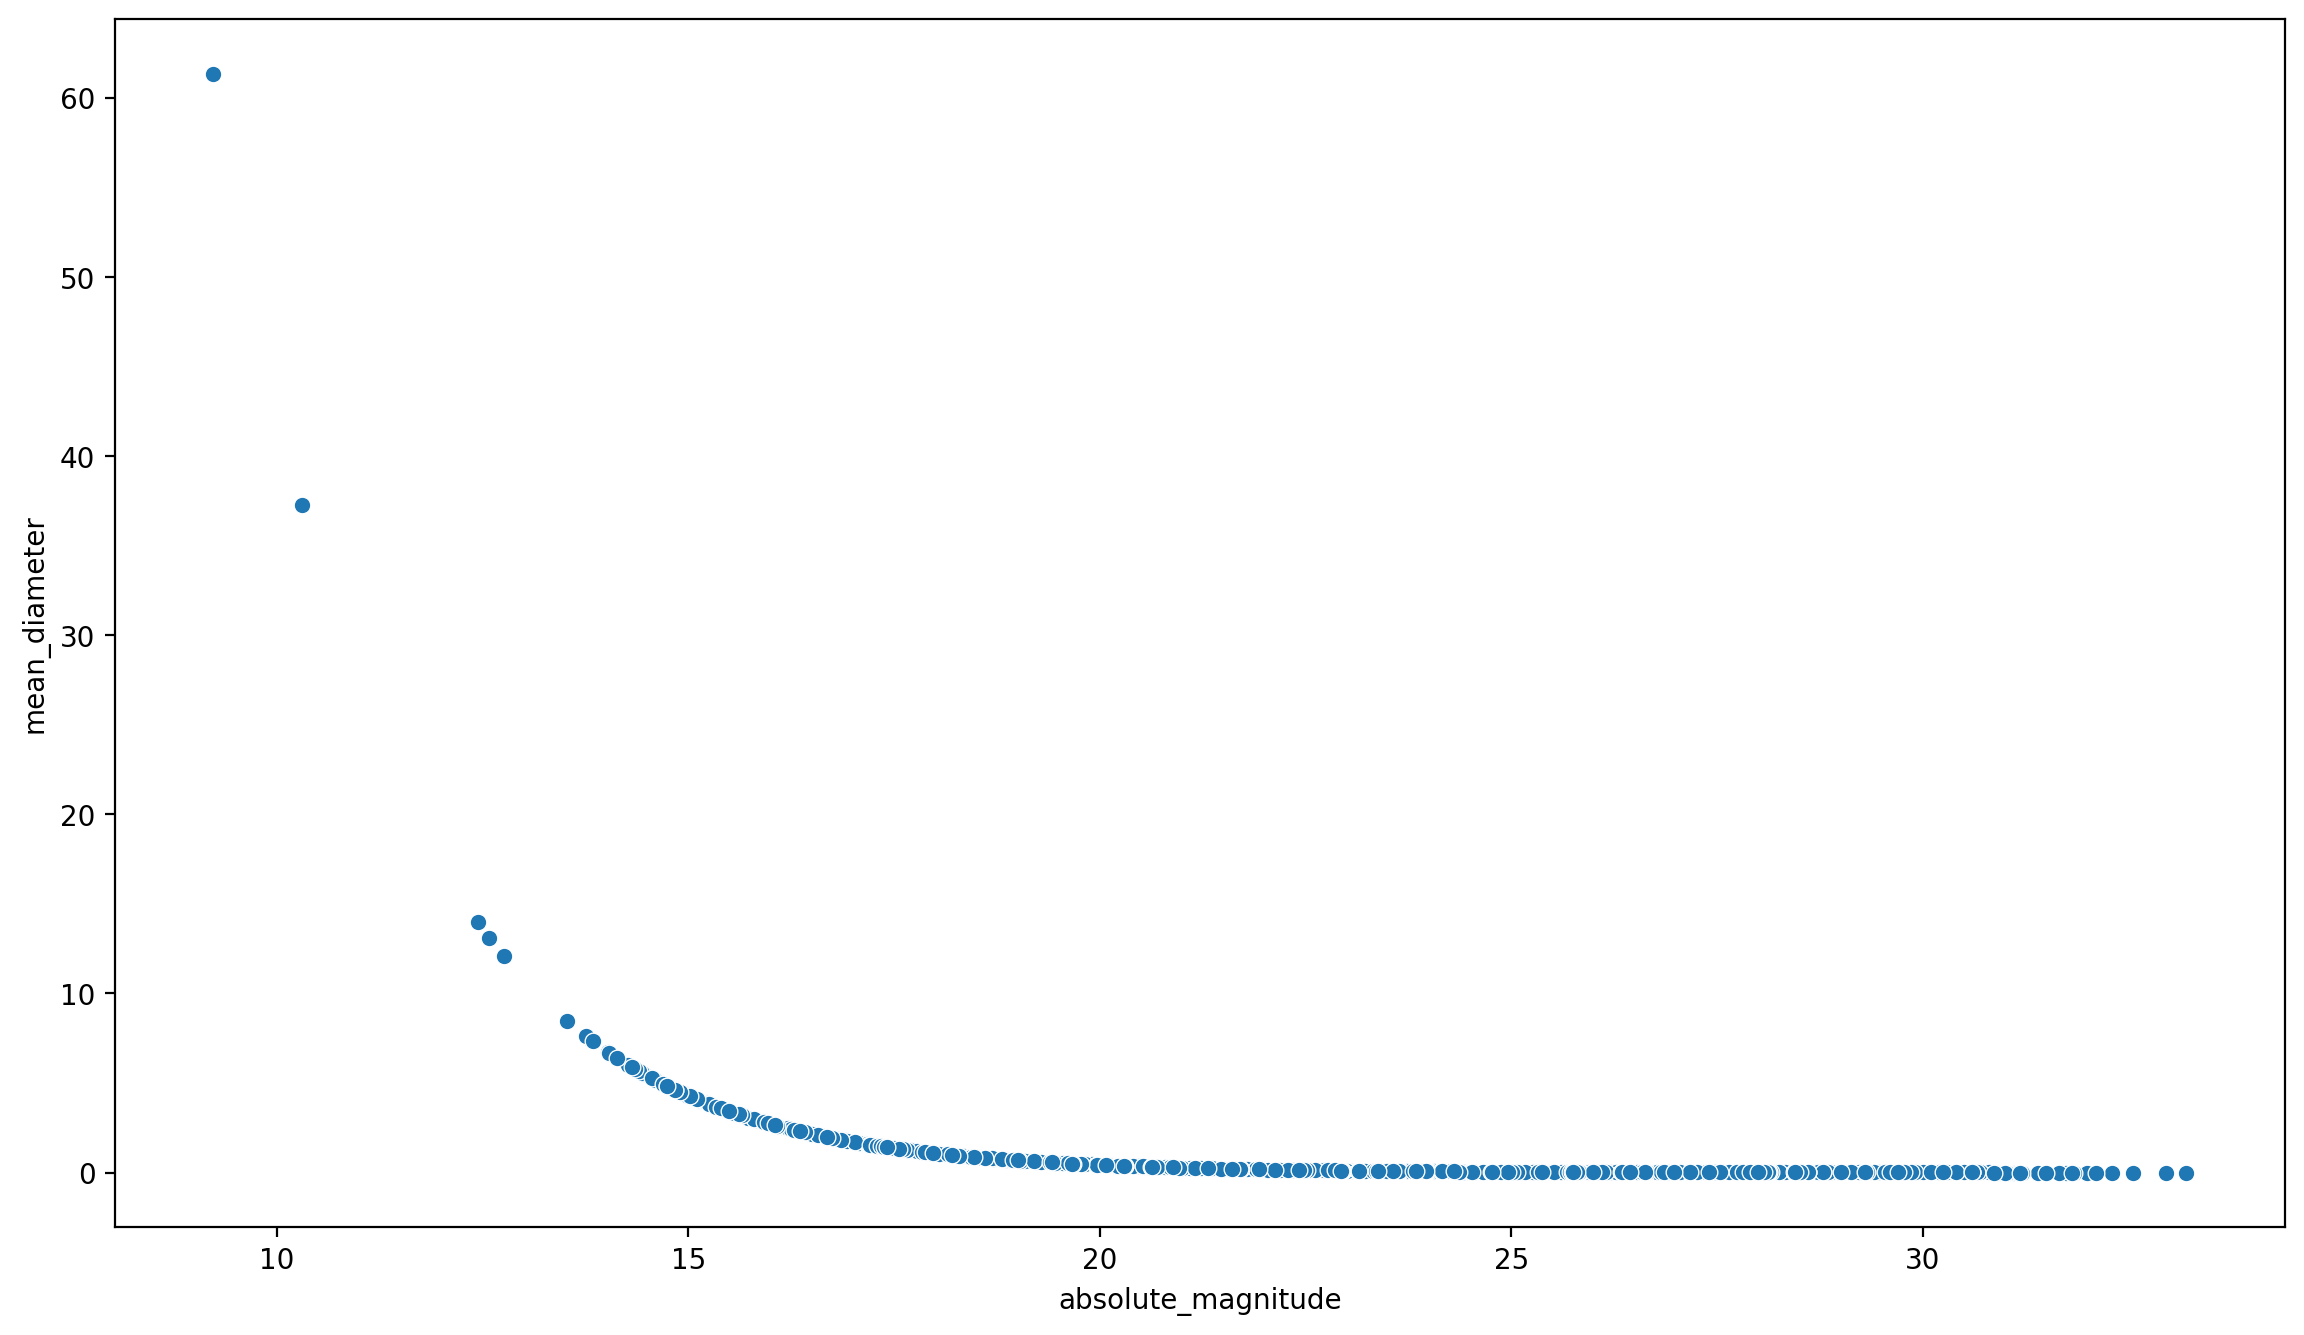

In [61]:
plt.figure(figsize=(14,8), dpi=200)
sns.scatterplot(data=df, x='absolute_magnitude', y='mean_diameter')

In [31]:
df

id  est_diameter_min  est_diameter_max  \
name                                                                
162635 (2000 SS164)   2162635          1.198271          2.679415   
277475 (2005 WK4)     2277475          0.265800          0.594347   
512244 (2015 YE18)    2512244          0.722030          1.614507   
(2012 BV13)           3596030          0.096506          0.215794   
(2014 GE35)           3667127          0.255009          0.570217   
...                       ...               ...               ...   
(2017 OL68)           3779523          0.176423          0.394494   
(2022 GA4)           54272756          0.232571          0.520044   
(2021 WR3)           54225015          0.310853          0.695088   
(2015 VK142)          3735178          0.350393          0.783502   
(1999 LV7)            3092229          0.347180          0.776319   

                     absolute_magnitude  hazardous   velocity_avg  \
name                                                                
162635 (2000 SS164)               16.73          0   13569.249224   
277475 (2005 WK4)                 20.00          1   37187.969051   
512244 (2015 YE18)                17.83          0   95258.903671   
(2012 BV13)                       22.20          0   43409.550520   
(2014 GE35)                       20.09          1   42580.419393   
...                                 ...        ...            ...   
(2017 OL68)                       20.89          0    4649.668900   
(2022 GA4)                        20.29          0   34153.422552   
(2021 WR3)                        19.66          0  103342.744852   
(2015 VK142)                      19.40          0   65388.349843   
(1999 LV7)                        19.42          0   60242.316201   

                     miss_distance_avg  mean_diameter  
name                                                   
162635 (2000 SS164)       5.483974e+07       1.938843  
277475 (2005 WK4)         3.504758e+07       0.430073  
512244 (2015 YE18)        4.794386e+07       1.168268  
(2012 BV13)               4.313247e+07       0.156150  
(2014 GE35)               4.659339e+07       0.412613  
...                                ...            ...  
(2017 OL68)               4.064435e+07       0.285458  
(2022 GA4)                3.376447e+07       0.376307  
(2021 WR3)                6.254685e+07       0.502971  
(2015 VK142)              6.344693e+07       0.566947  
(1999 LV7)                2.754936e+07       0.561749  

[27423 rows x 8 columns]

<AxesSubplot:xlabel='mean_diameter', ylabel='velocity_avg'>

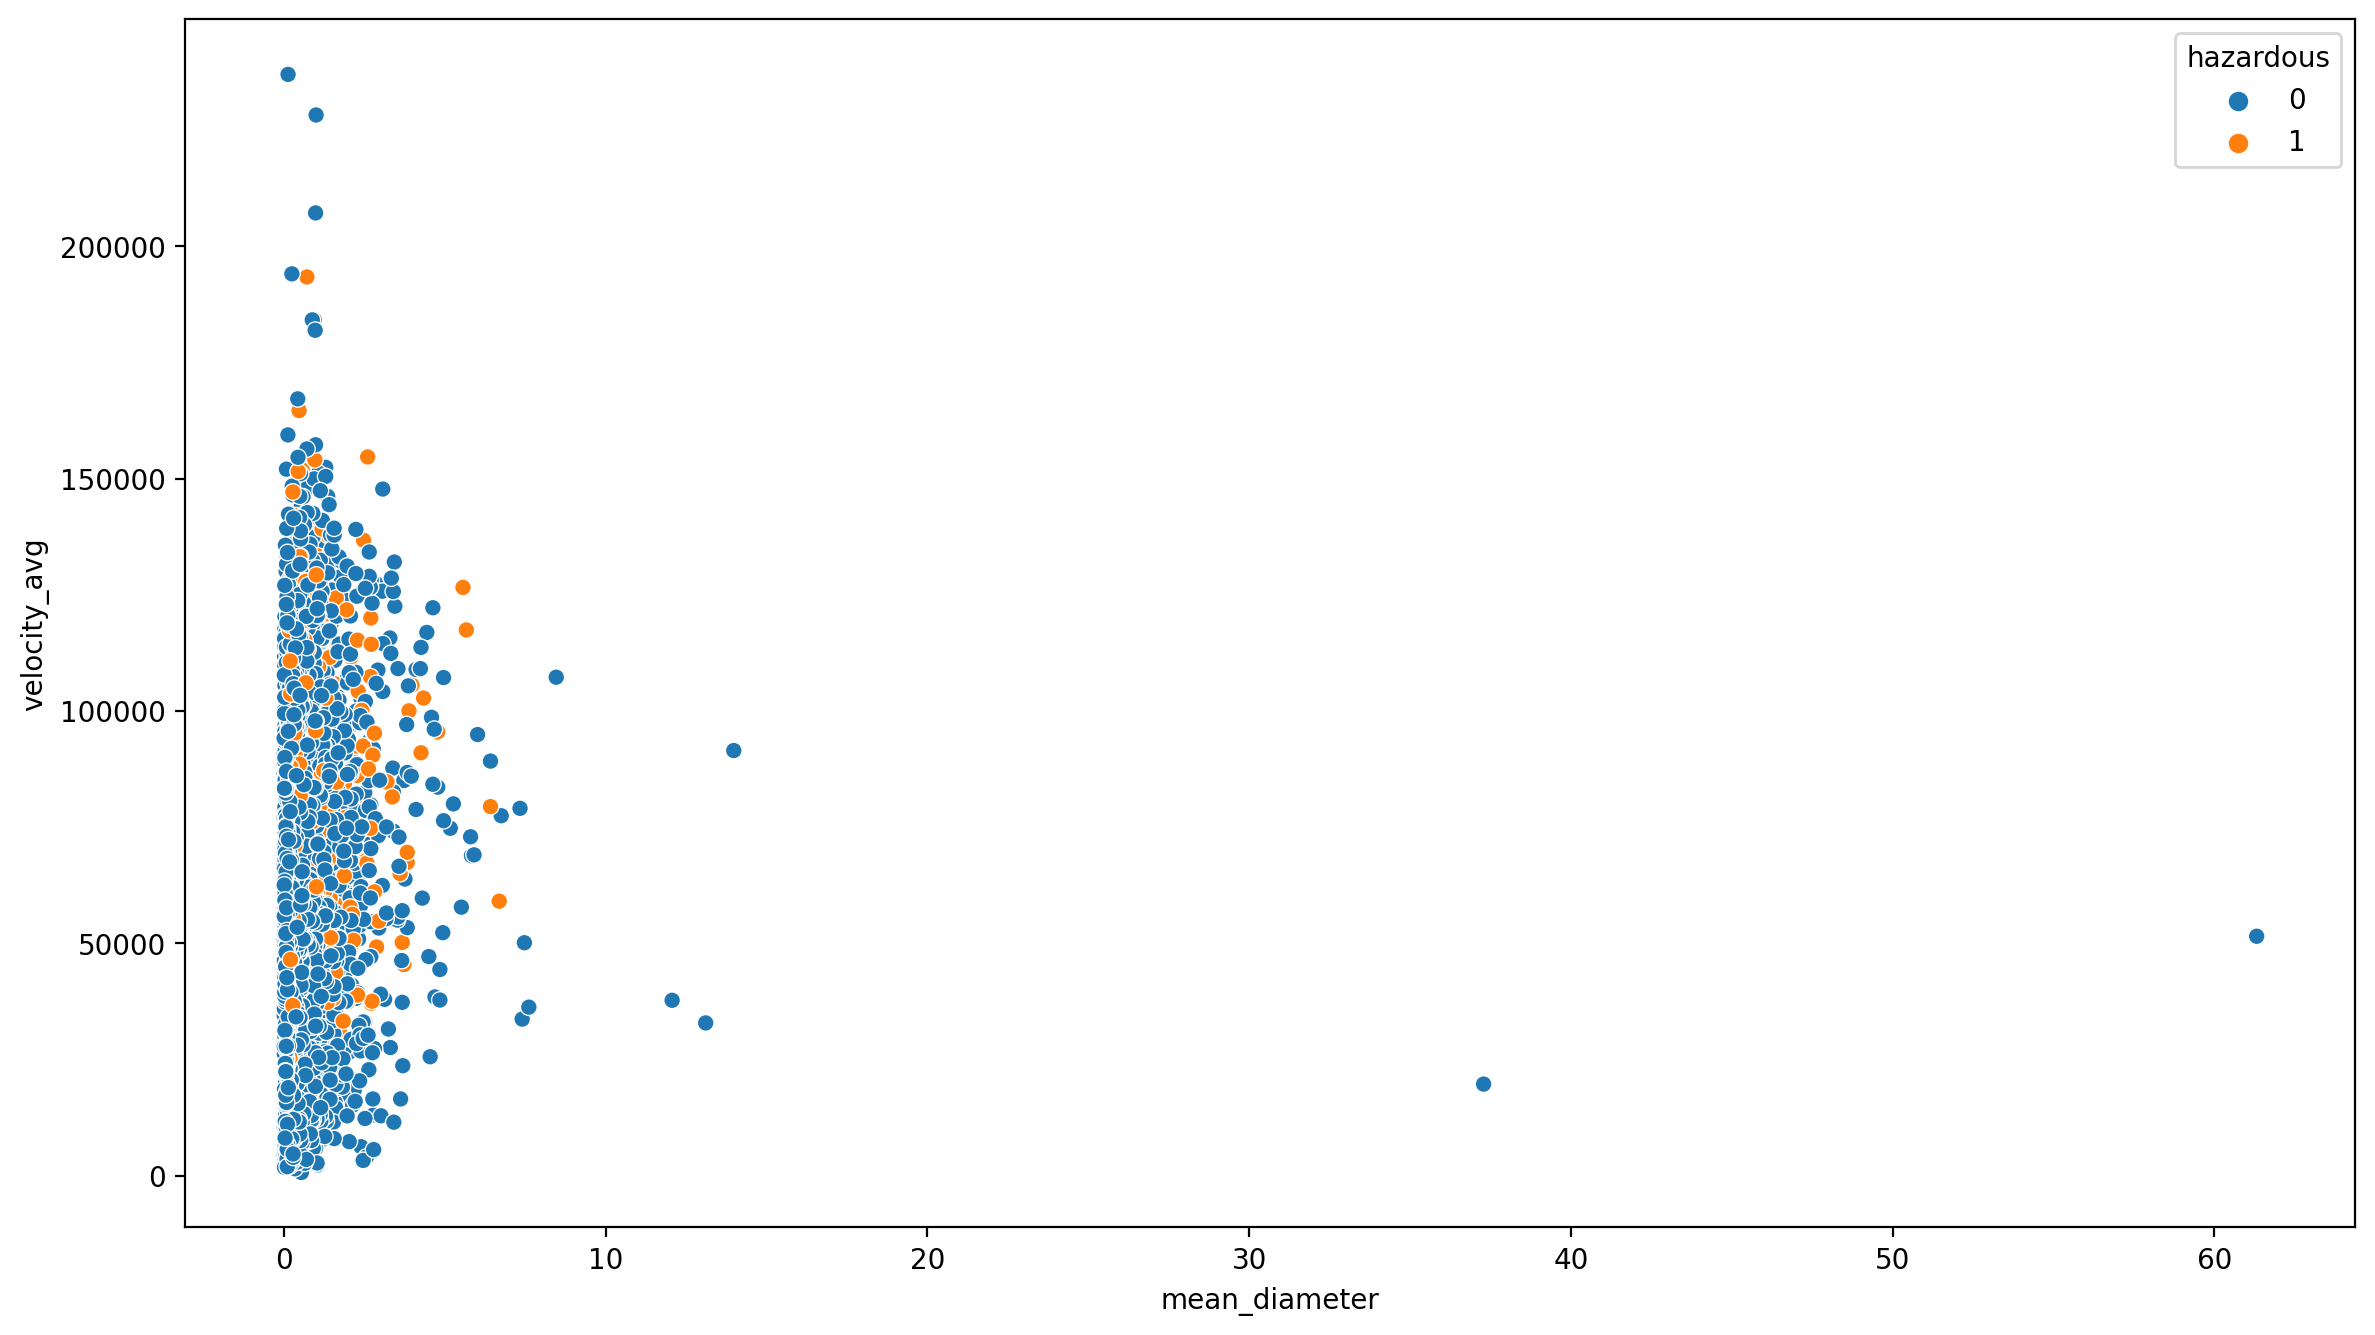

In [32]:
plt.figure(figsize=(14,8), dpi=200)
sns.scatterplot(data=df, x='mean_diameter', y='velocity_avg', hue='hazardous')

<Figure size 2800x1600 with 0 Axes>

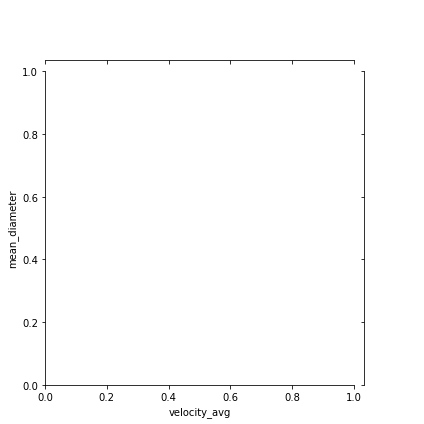

In [34]:
plt.figure(figsize=(14,8), dpi=200)
sns.JointGrid(data=df, x="velocity_avg", y="mean_diameter")

<AxesSubplot:xlabel='hazardous', ylabel='count'>

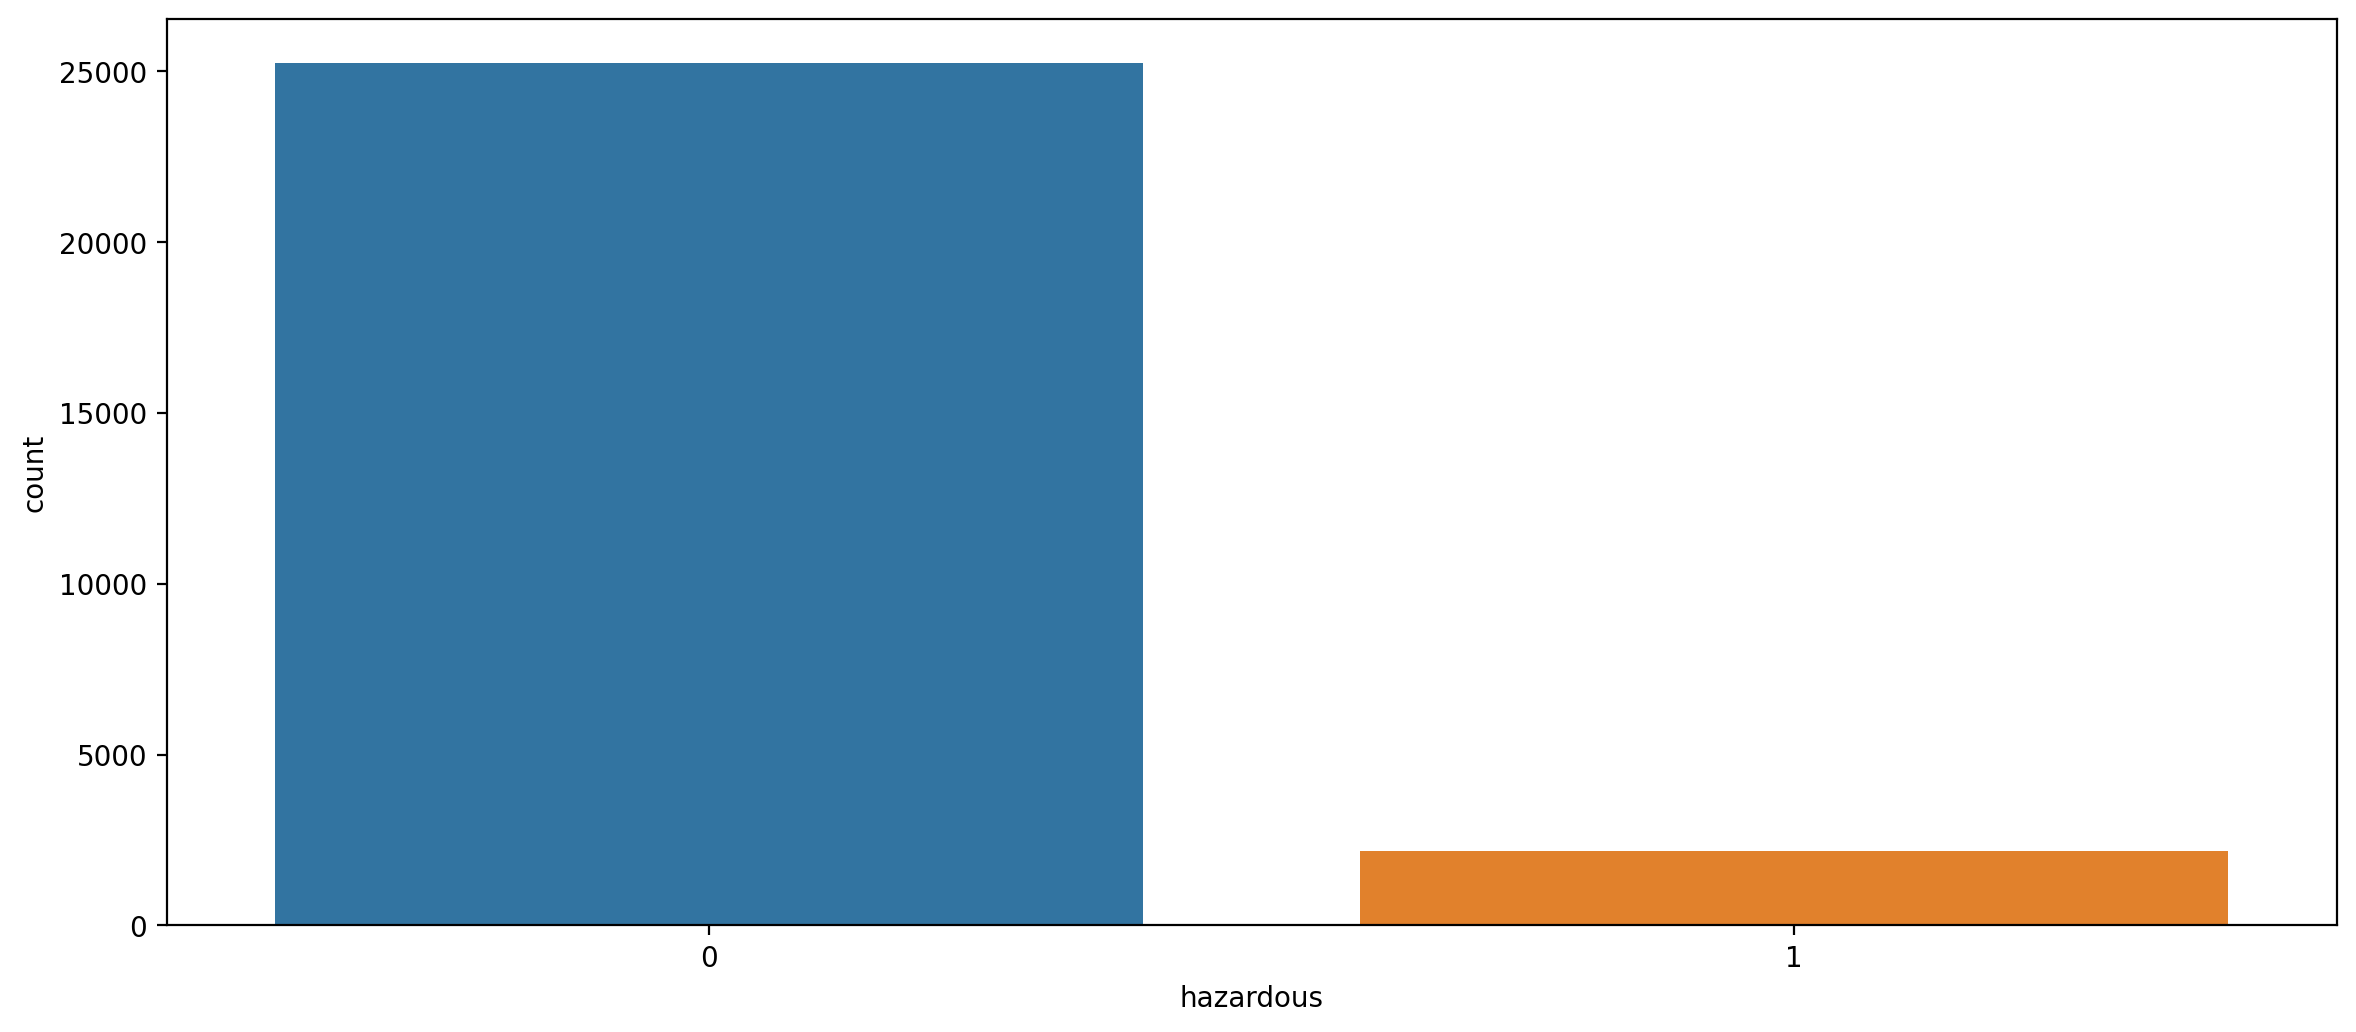

In [56]:
plt.figure(figsize=(14,6), dpi=200)
sns.countplot(data=df, x='hazardous')

In [57]:
plt.figure(figsize=(14,6), dpi=200)
sns.plt.pie

AttributeError: module 'seaborn' has no attribute 'plt'

<Figure size 2800x1200 with 0 Axes>

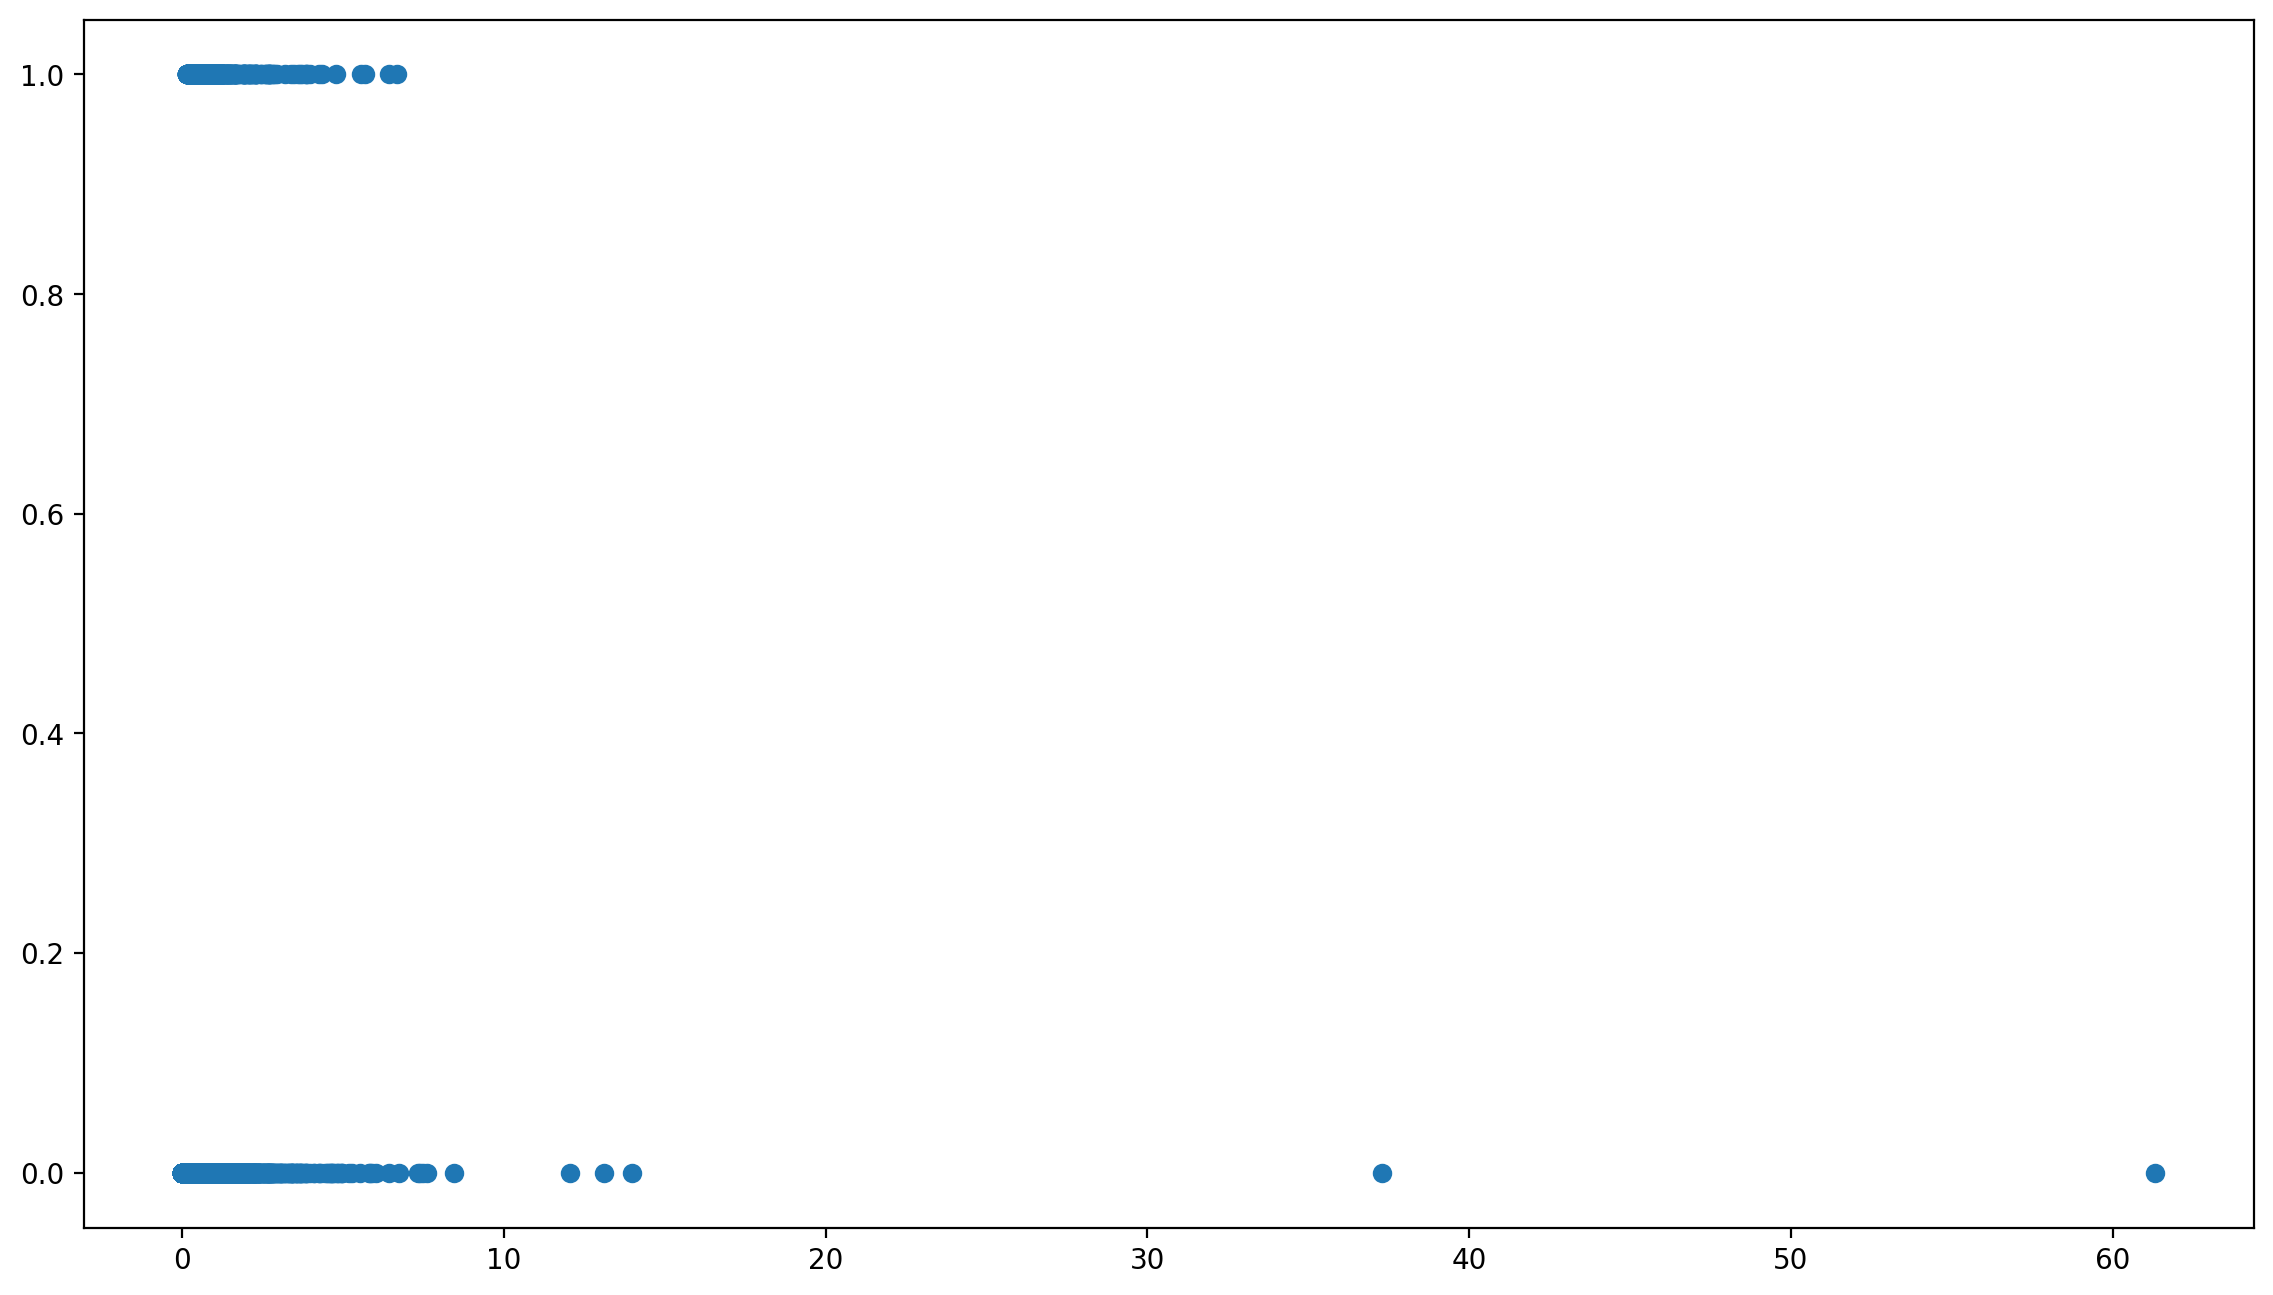

In [36]:
plt.figure(figsize=(14,8), dpi=200)
plt.scatter(neo_cleaned['mean_diameter'], neo_cleaned['hazardous'])

<AxesSubplot:xlabel='mean_diameter', ylabel='count'>

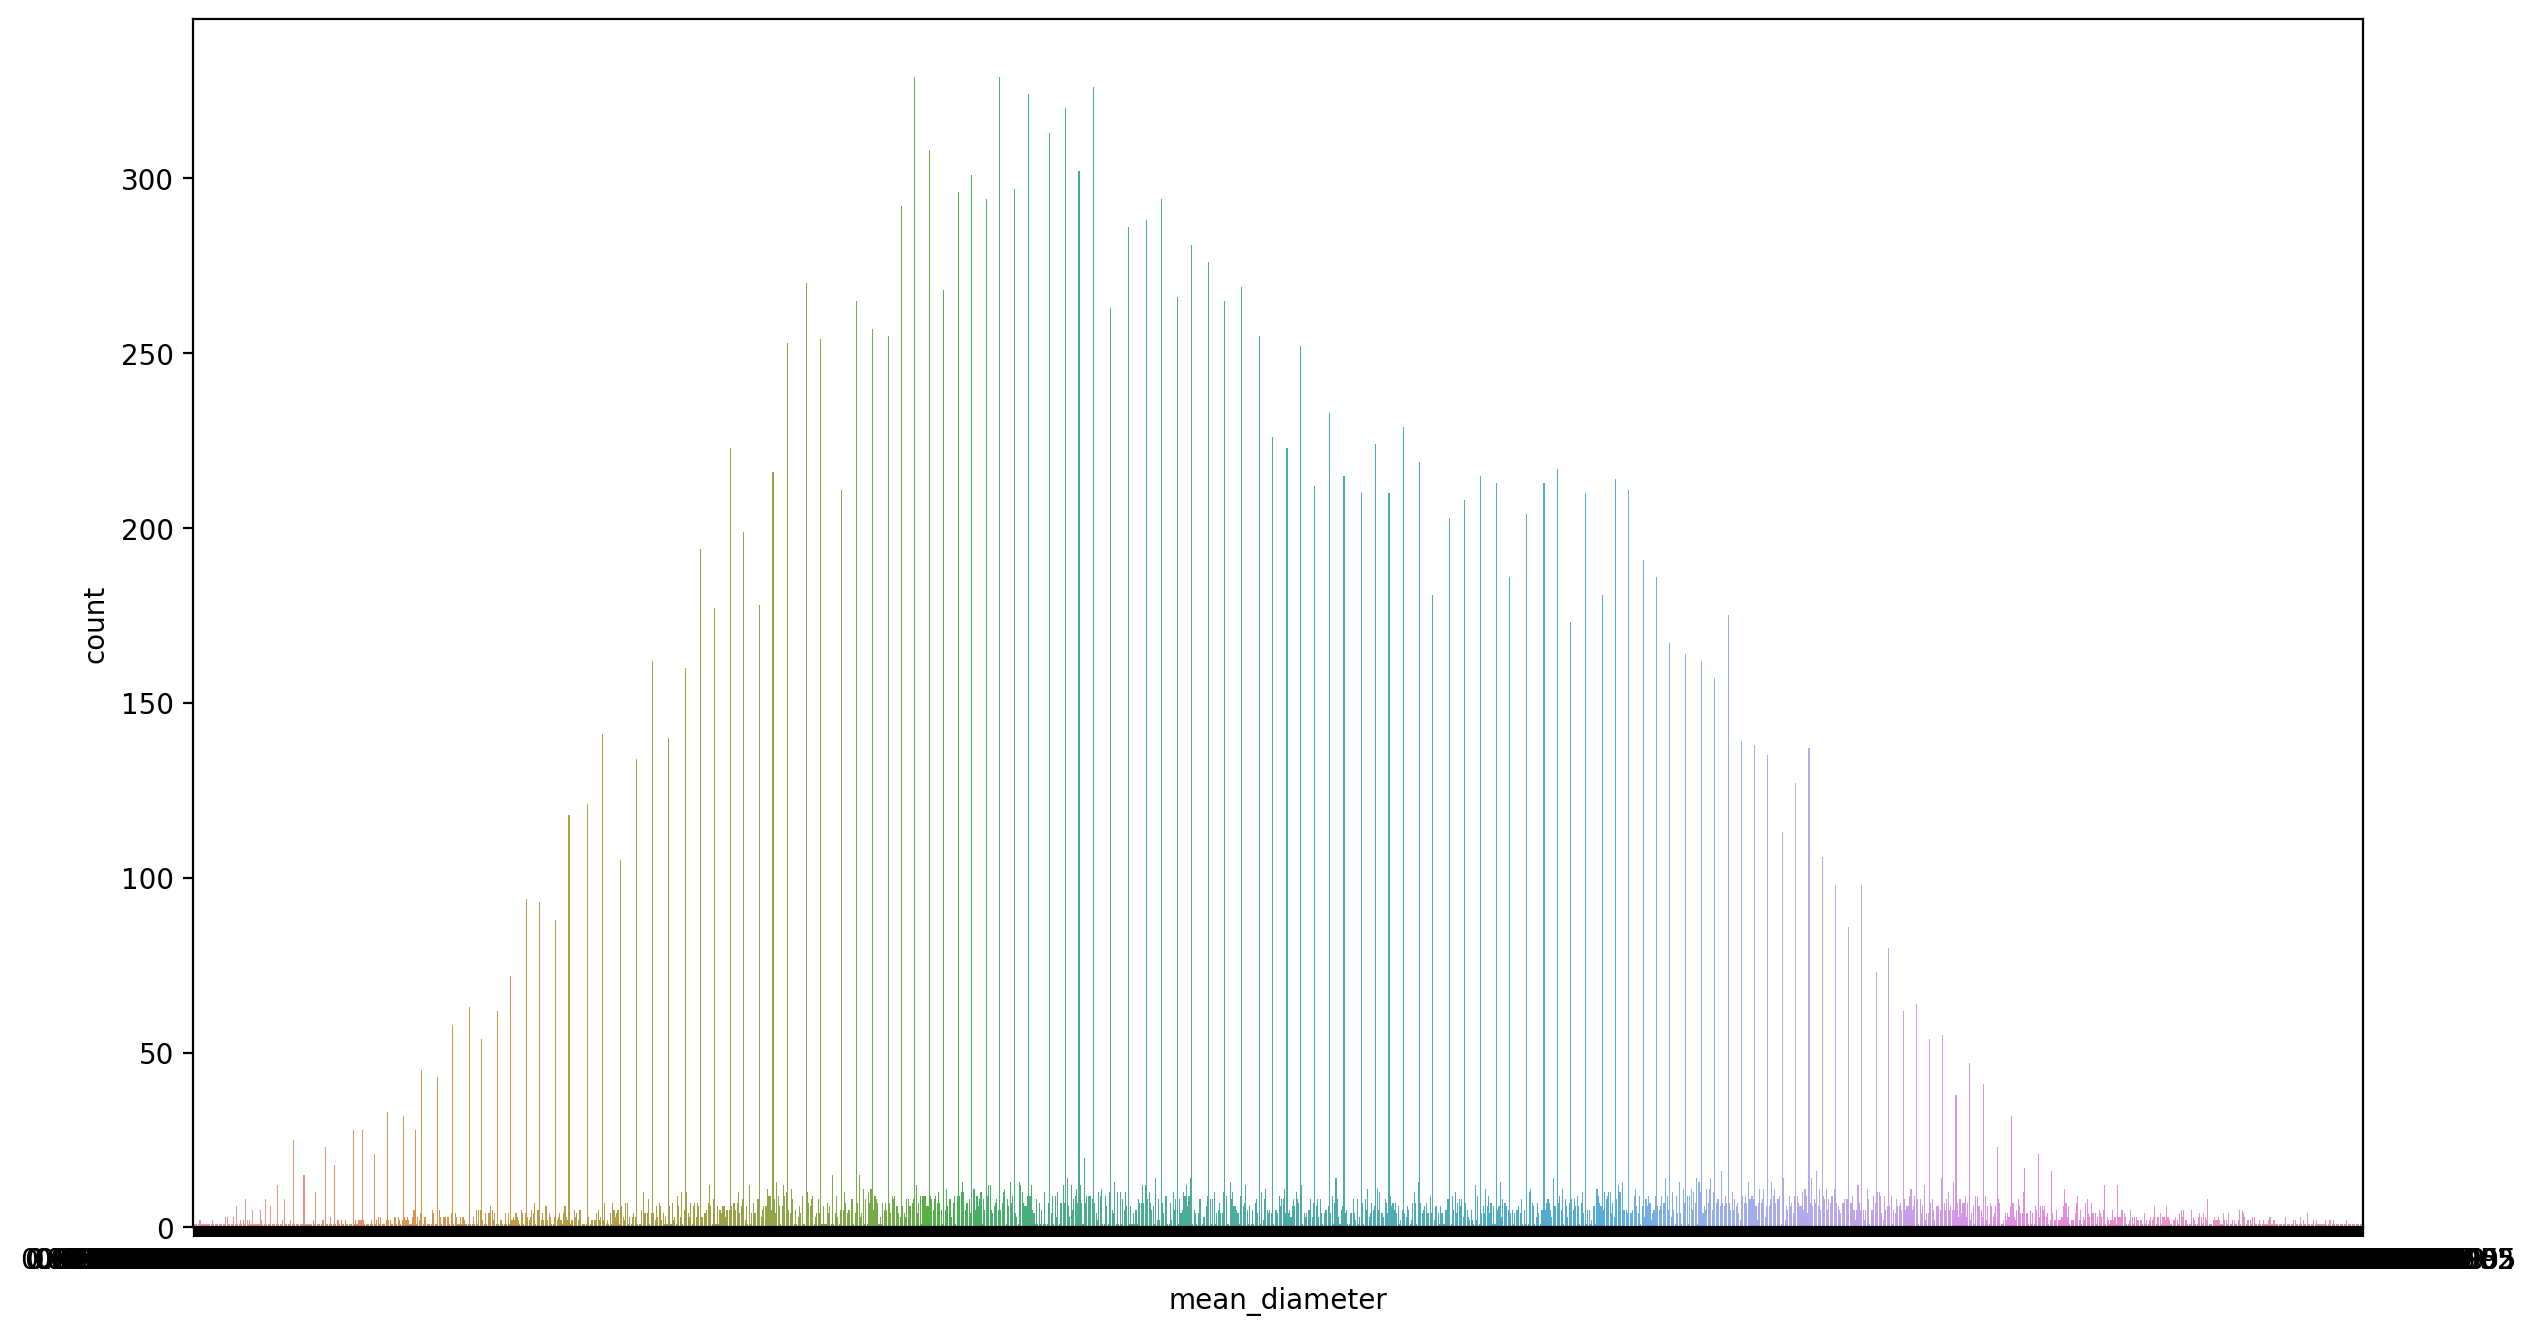

In [37]:
plt.figure(figsize=(14,8), dpi=200)
sns.countplot(data=df, x='mean_diameter')

<AxesSubplot:>

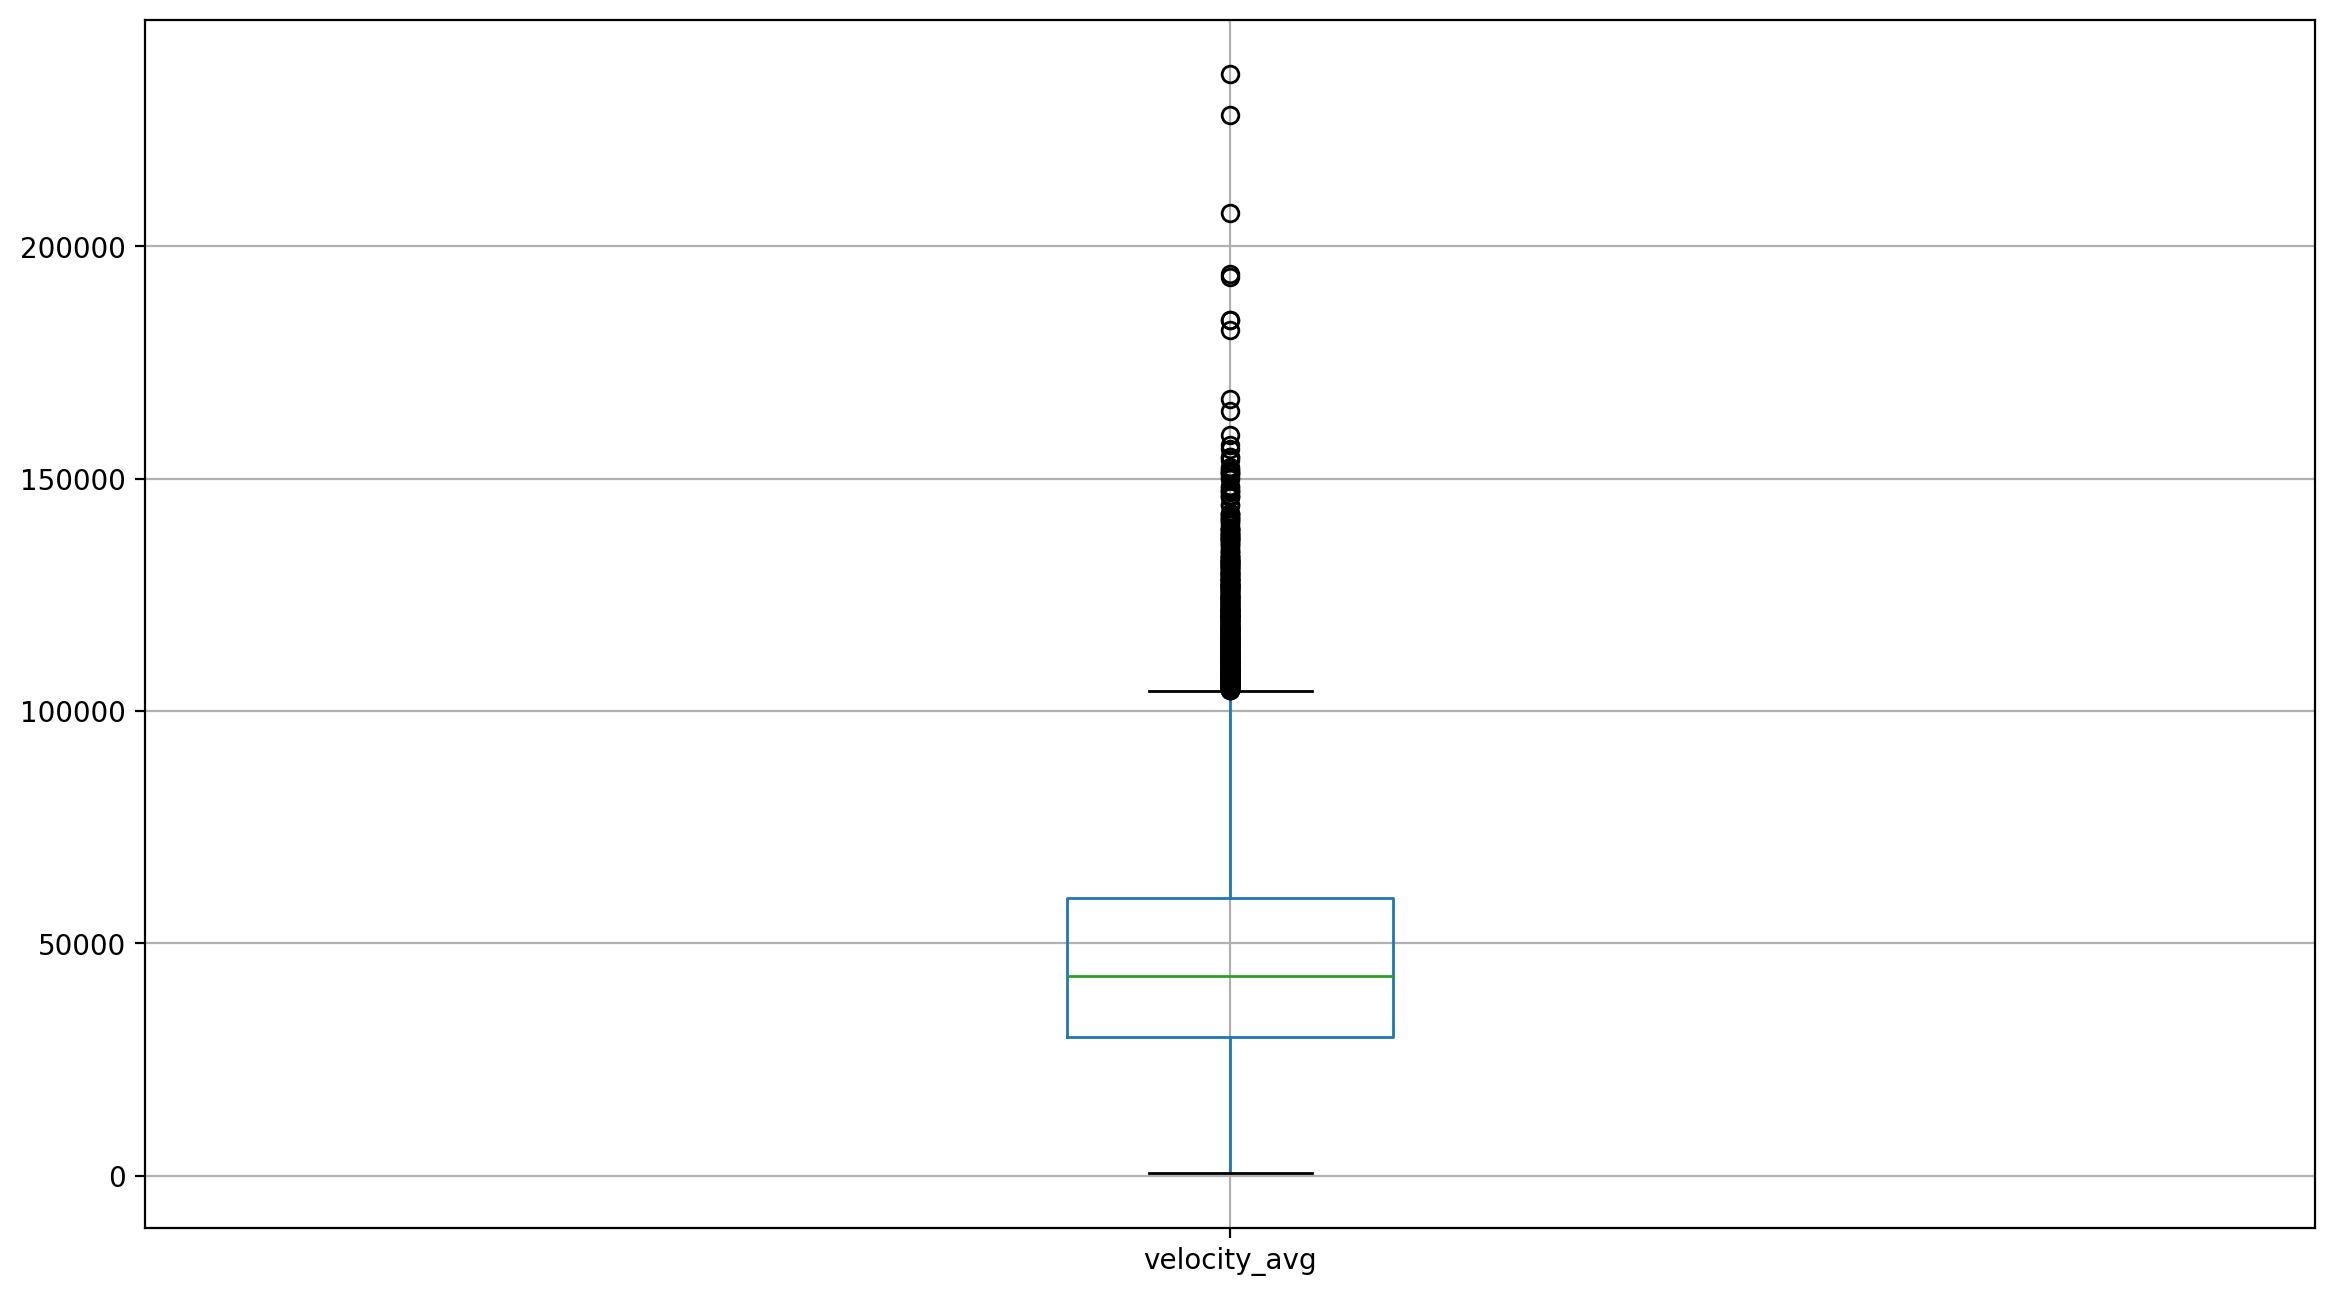

In [38]:
plt.figure(figsize=(14,8), dpi=200)
df.boxplot('velocity_avg')

<AxesSubplot:>

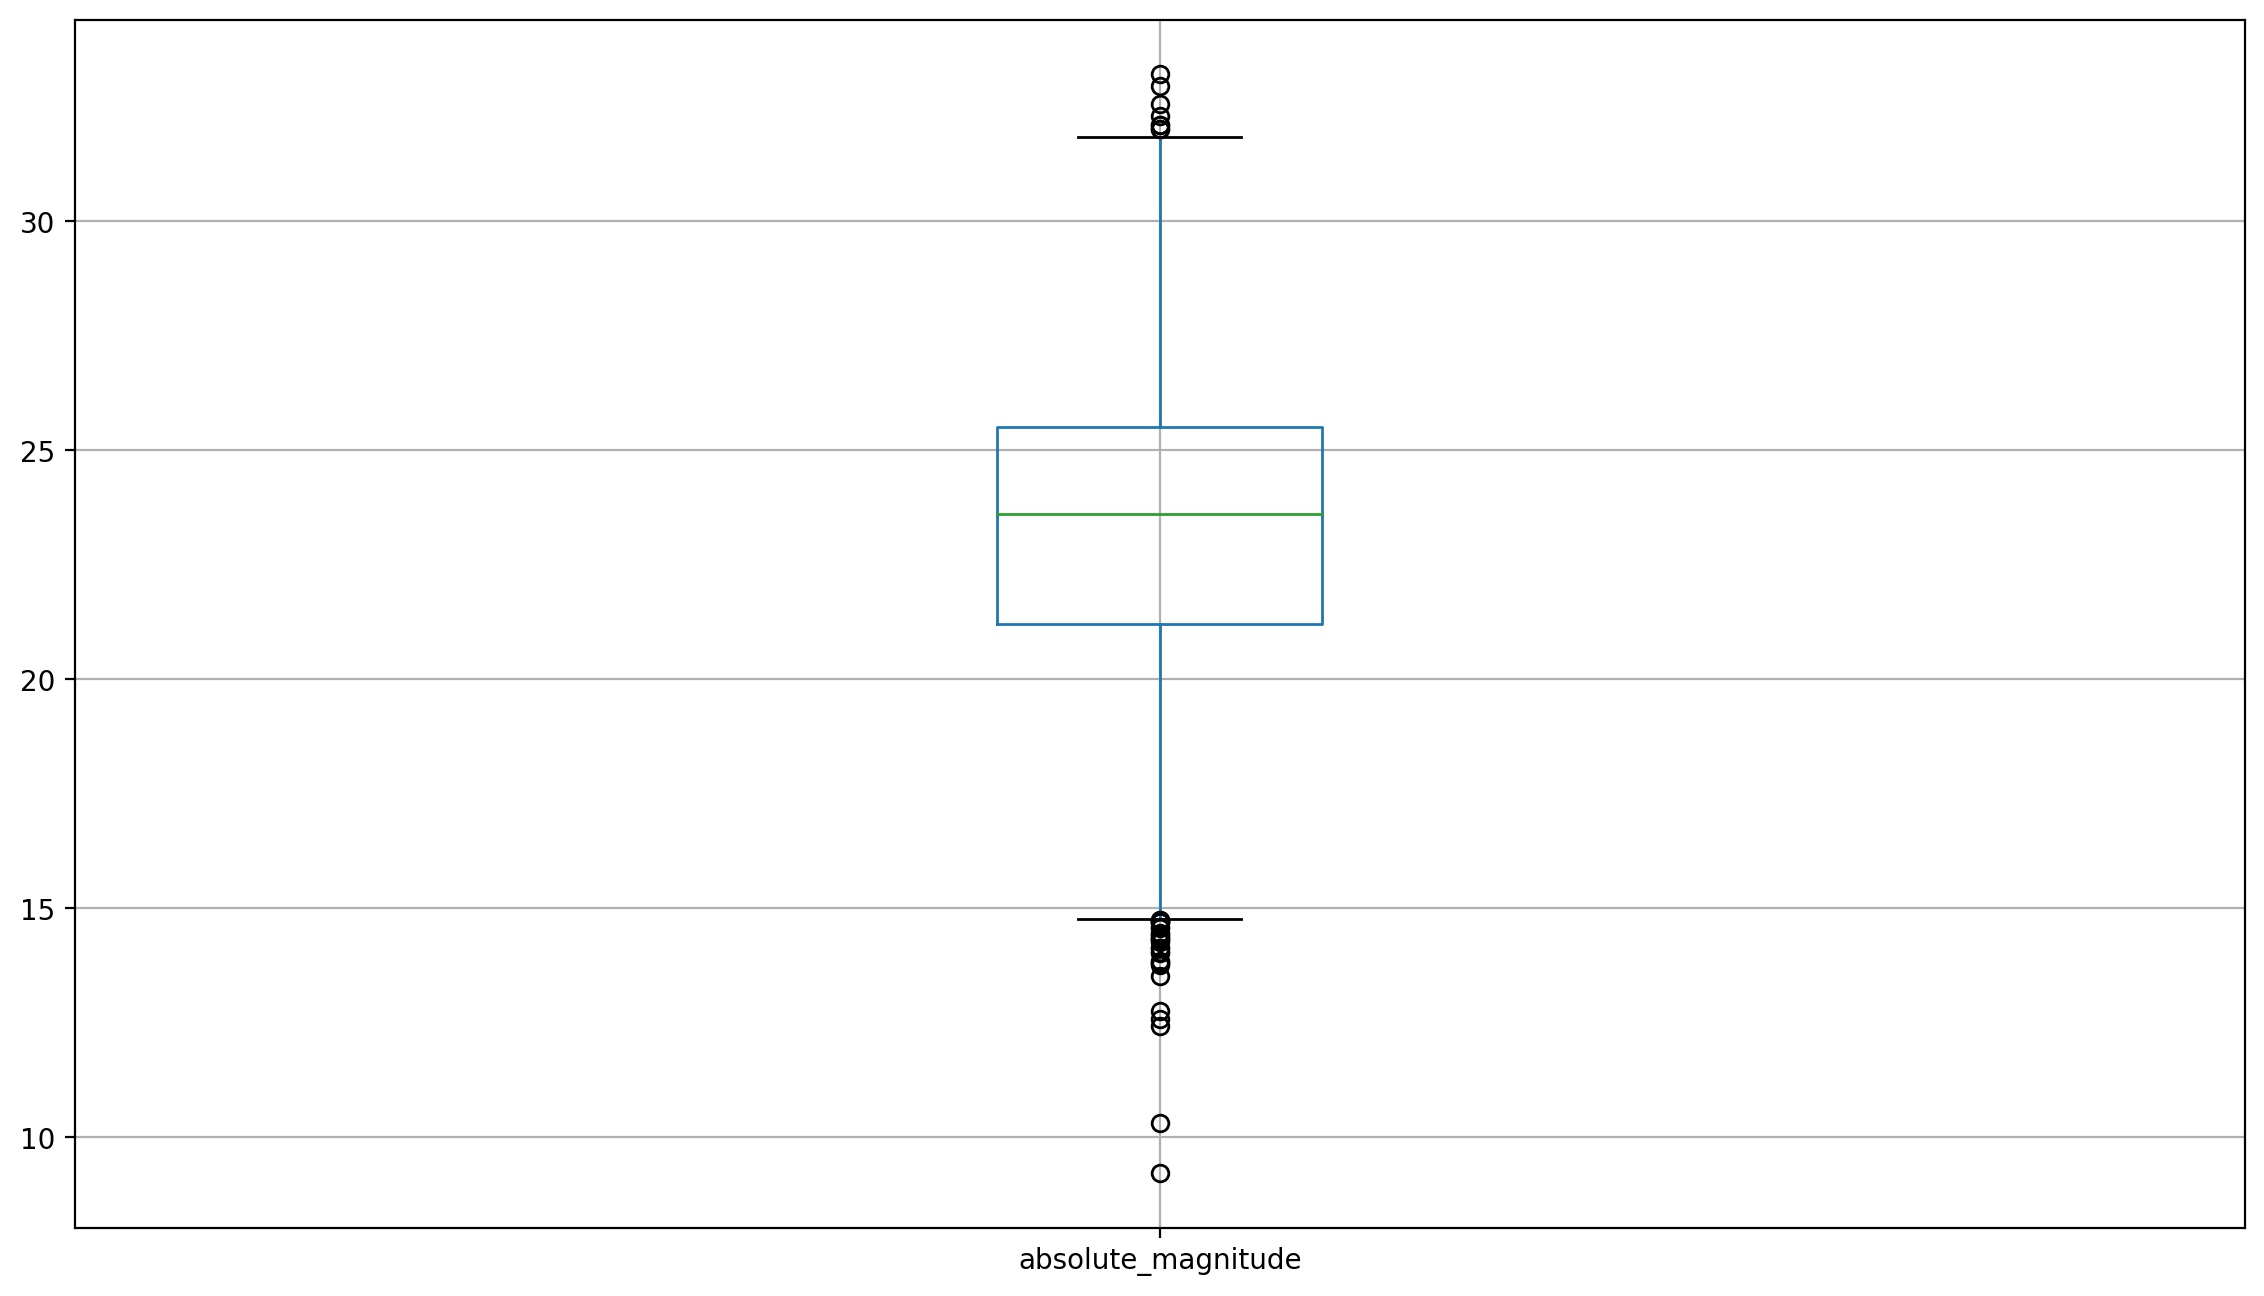

In [39]:
plt.figure(figsize=(14,8), dpi=200)
df.boxplot('absolute_magnitude')

<BarContainer object of 27423 artists>

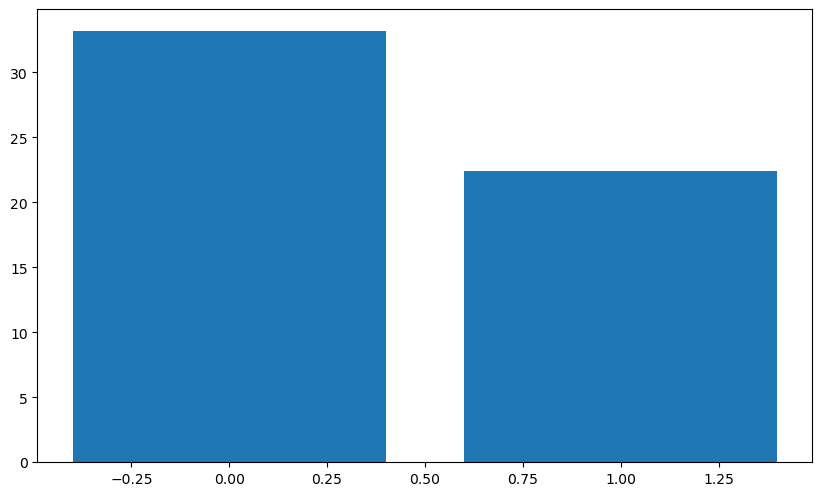

In [69]:
plt.figure(figsize=(10,6), dpi=100)
plt.bar(neo_cleaned['hazardous'], neo_cleaned['absolute_magnitude'])

In [42]:
df

id  est_diameter_min  est_diameter_max  \
name                                                                
162635 (2000 SS164)   2162635          1.198271          2.679415   
277475 (2005 WK4)     2277475          0.265800          0.594347   
512244 (2015 YE18)    2512244          0.722030          1.614507   
(2012 BV13)           3596030          0.096506          0.215794   
(2014 GE35)           3667127          0.255009          0.570217   
...                       ...               ...               ...   
(2017 OL68)           3779523          0.176423          0.394494   
(2022 GA4)           54272756          0.232571          0.520044   
(2021 WR3)           54225015          0.310853          0.695088   
(2015 VK142)          3735178          0.350393          0.783502   
(1999 LV7)            3092229          0.347180          0.776319   

                     absolute_magnitude  hazardous   velocity_avg  \
name                                                                
162635 (2000 SS164)               16.73          0   13569.249224   
277475 (2005 WK4)                 20.00          1   37187.969051   
512244 (2015 YE18)                17.83          0   95258.903671   
(2012 BV13)                       22.20          0   43409.550520   
(2014 GE35)                       20.09          1   42580.419393   
...                                 ...        ...            ...   
(2017 OL68)                       20.89          0    4649.668900   
(2022 GA4)                        20.29          0   34153.422552   
(2021 WR3)                        19.66          0  103342.744852   
(2015 VK142)                      19.40          0   65388.349843   
(1999 LV7)                        19.42          0   60242.316201   

                     miss_distance_avg  mean_diameter  
name                                                   
162635 (2000 SS164)       5.483974e+07       1.938843  
277475 (2005 WK4)         3.504758e+07       0.430073  
512244 (2015 YE18)        4.794386e+07       1.168268  
(2012 BV13)               4.313247e+07       0.156150  
(2014 GE35)               4.659339e+07       0.412613  
...                                ...            ...  
(2017 OL68)               4.064435e+07       0.285458  
(2022 GA4)                3.376447e+07       0.376307  
(2021 WR3)                6.254685e+07       0.502971  
(2015 VK142)              6.344693e+07       0.566947  
(1999 LV7)                2.754936e+07       0.561749  

[27423 rows x 8 columns]

<AxesSubplot:xlabel='id', ylabel='mean_diameter'>

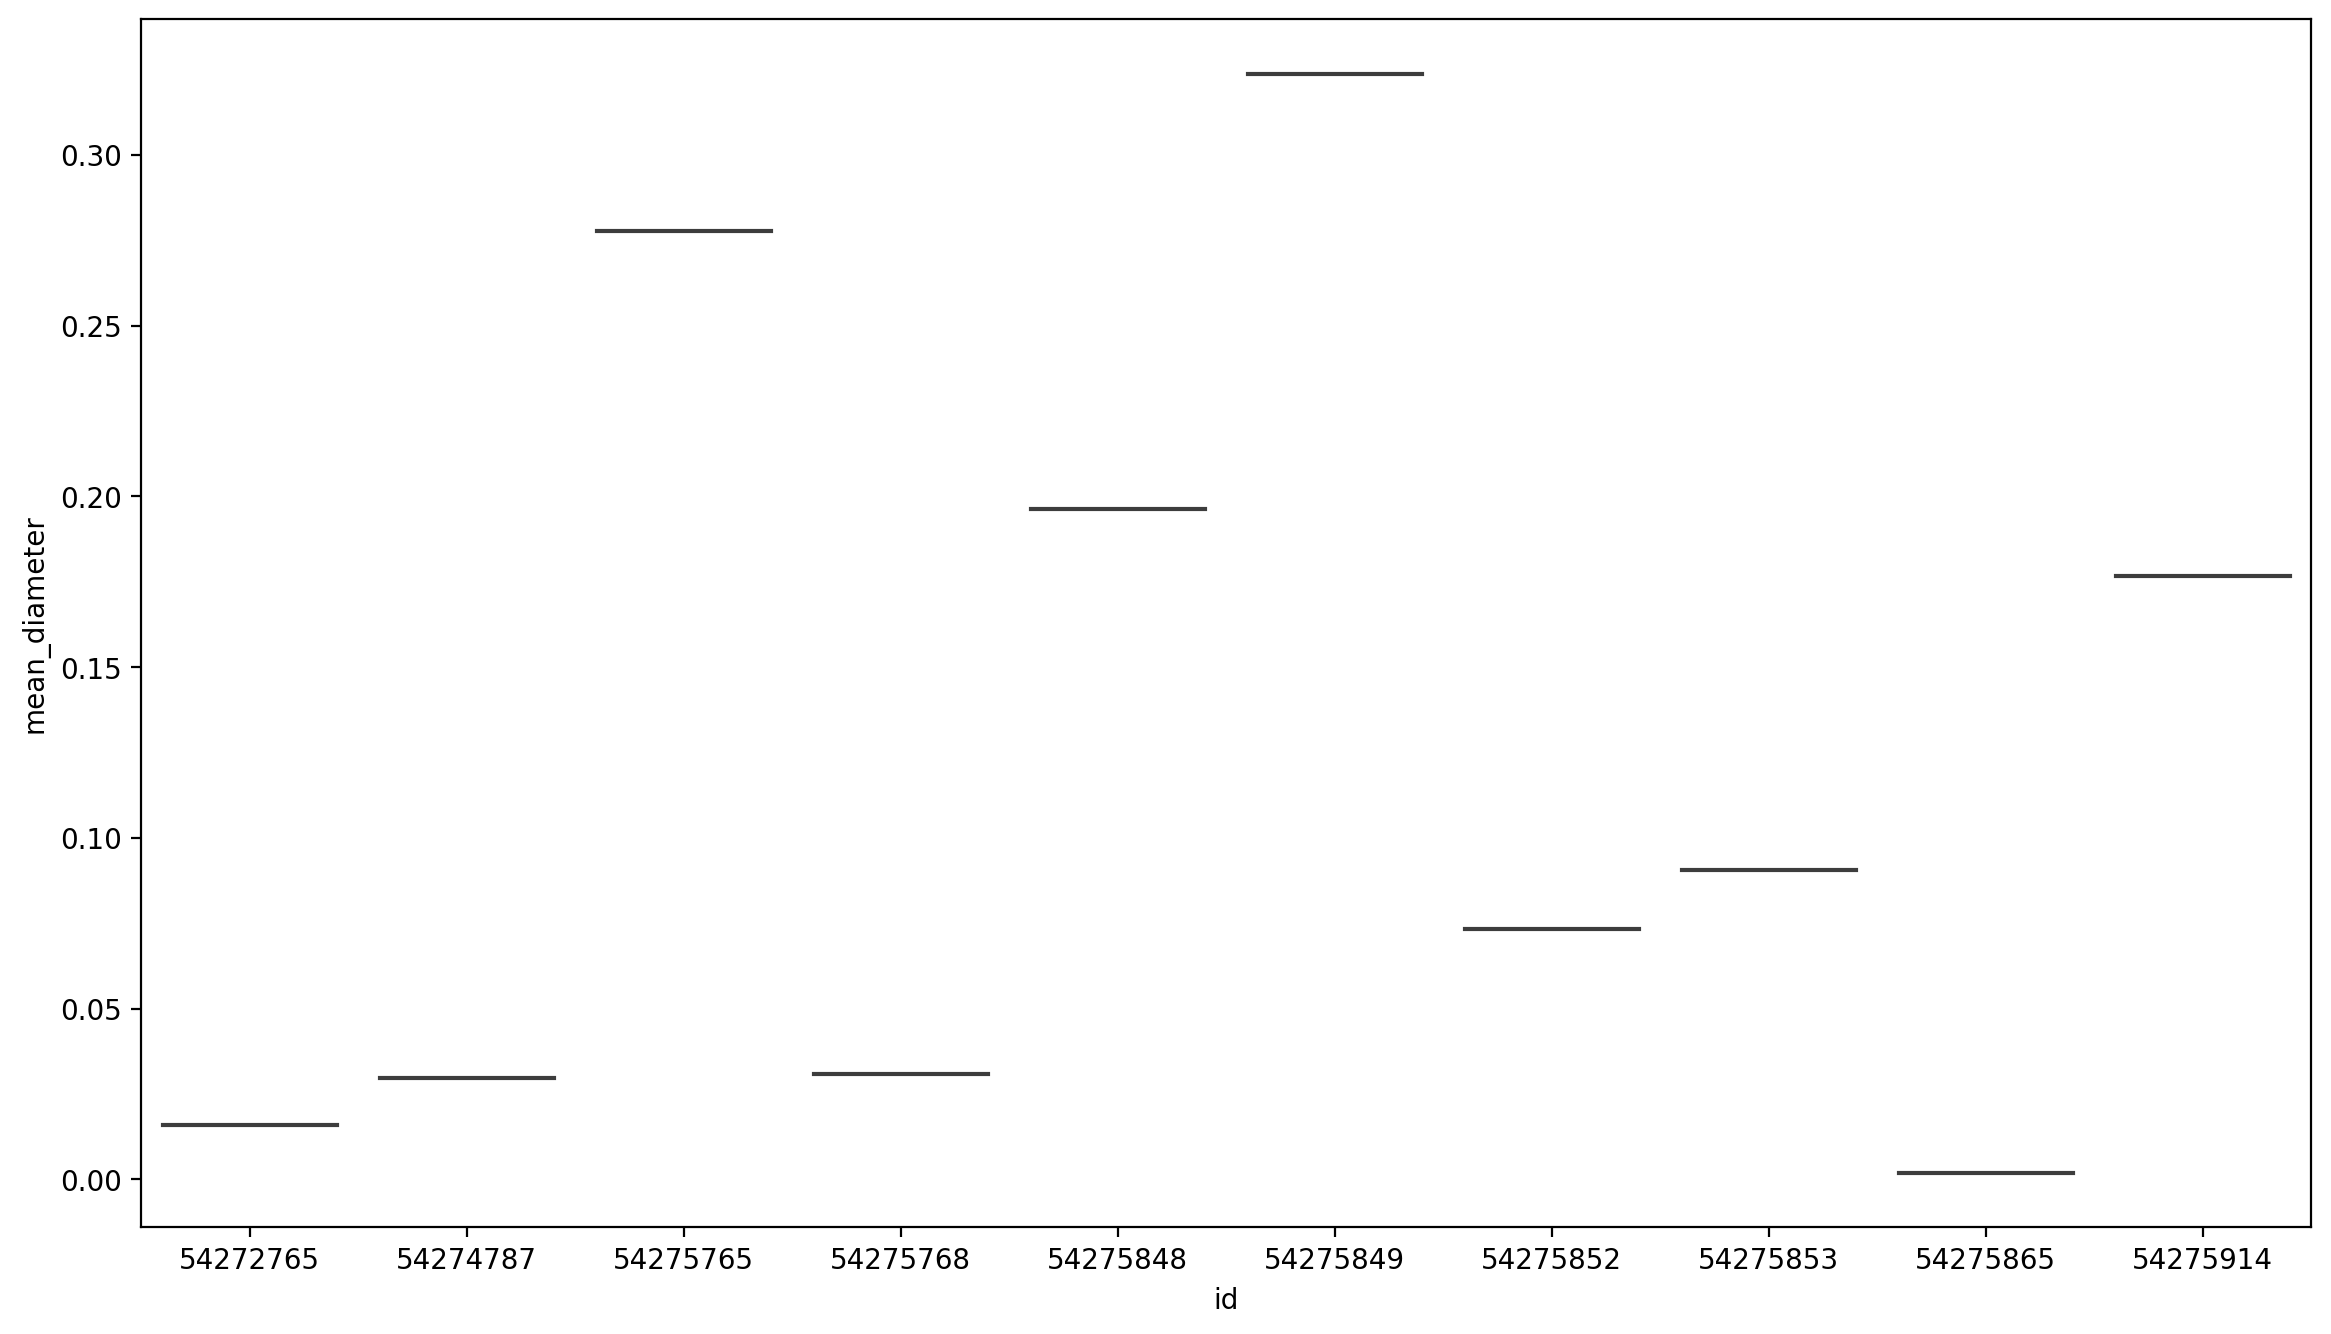

In [60]:
plt.figure(figsize=(14,8), dpi=200)
sns.violinplot(
    x='id',
    y='mean_diameter',
    data=df.nlargest(10, 'id')
)

<AxesSubplot:xlabel='id'>

<Figure size 3200x2000 with 0 Axes>

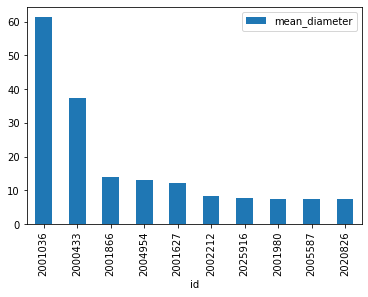

In [70]:
plt.figure(figsize=(16,10), dpi=200)
(df.nlargest(10, 'mean_diameter')
   .plot.bar(x='id', y='mean_diameter'))
#Top 10 Largest

<AxesSubplot:xlabel='id'>

<Figure size 2800x1600 with 0 Axes>

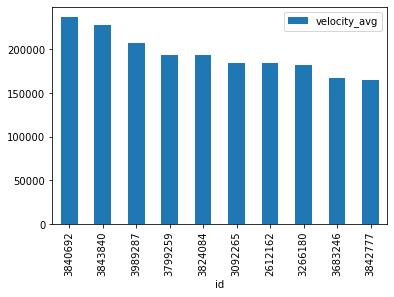

In [45]:
plt.figure(figsize=(14,8), dpi=200)
(df.nlargest(10, 'velocity_avg')
   .plot.bar(x='id', y='velocity_avg'))
#Top 10 Fastest

<AxesSubplot:xlabel='id', ylabel='mean_diameter'>

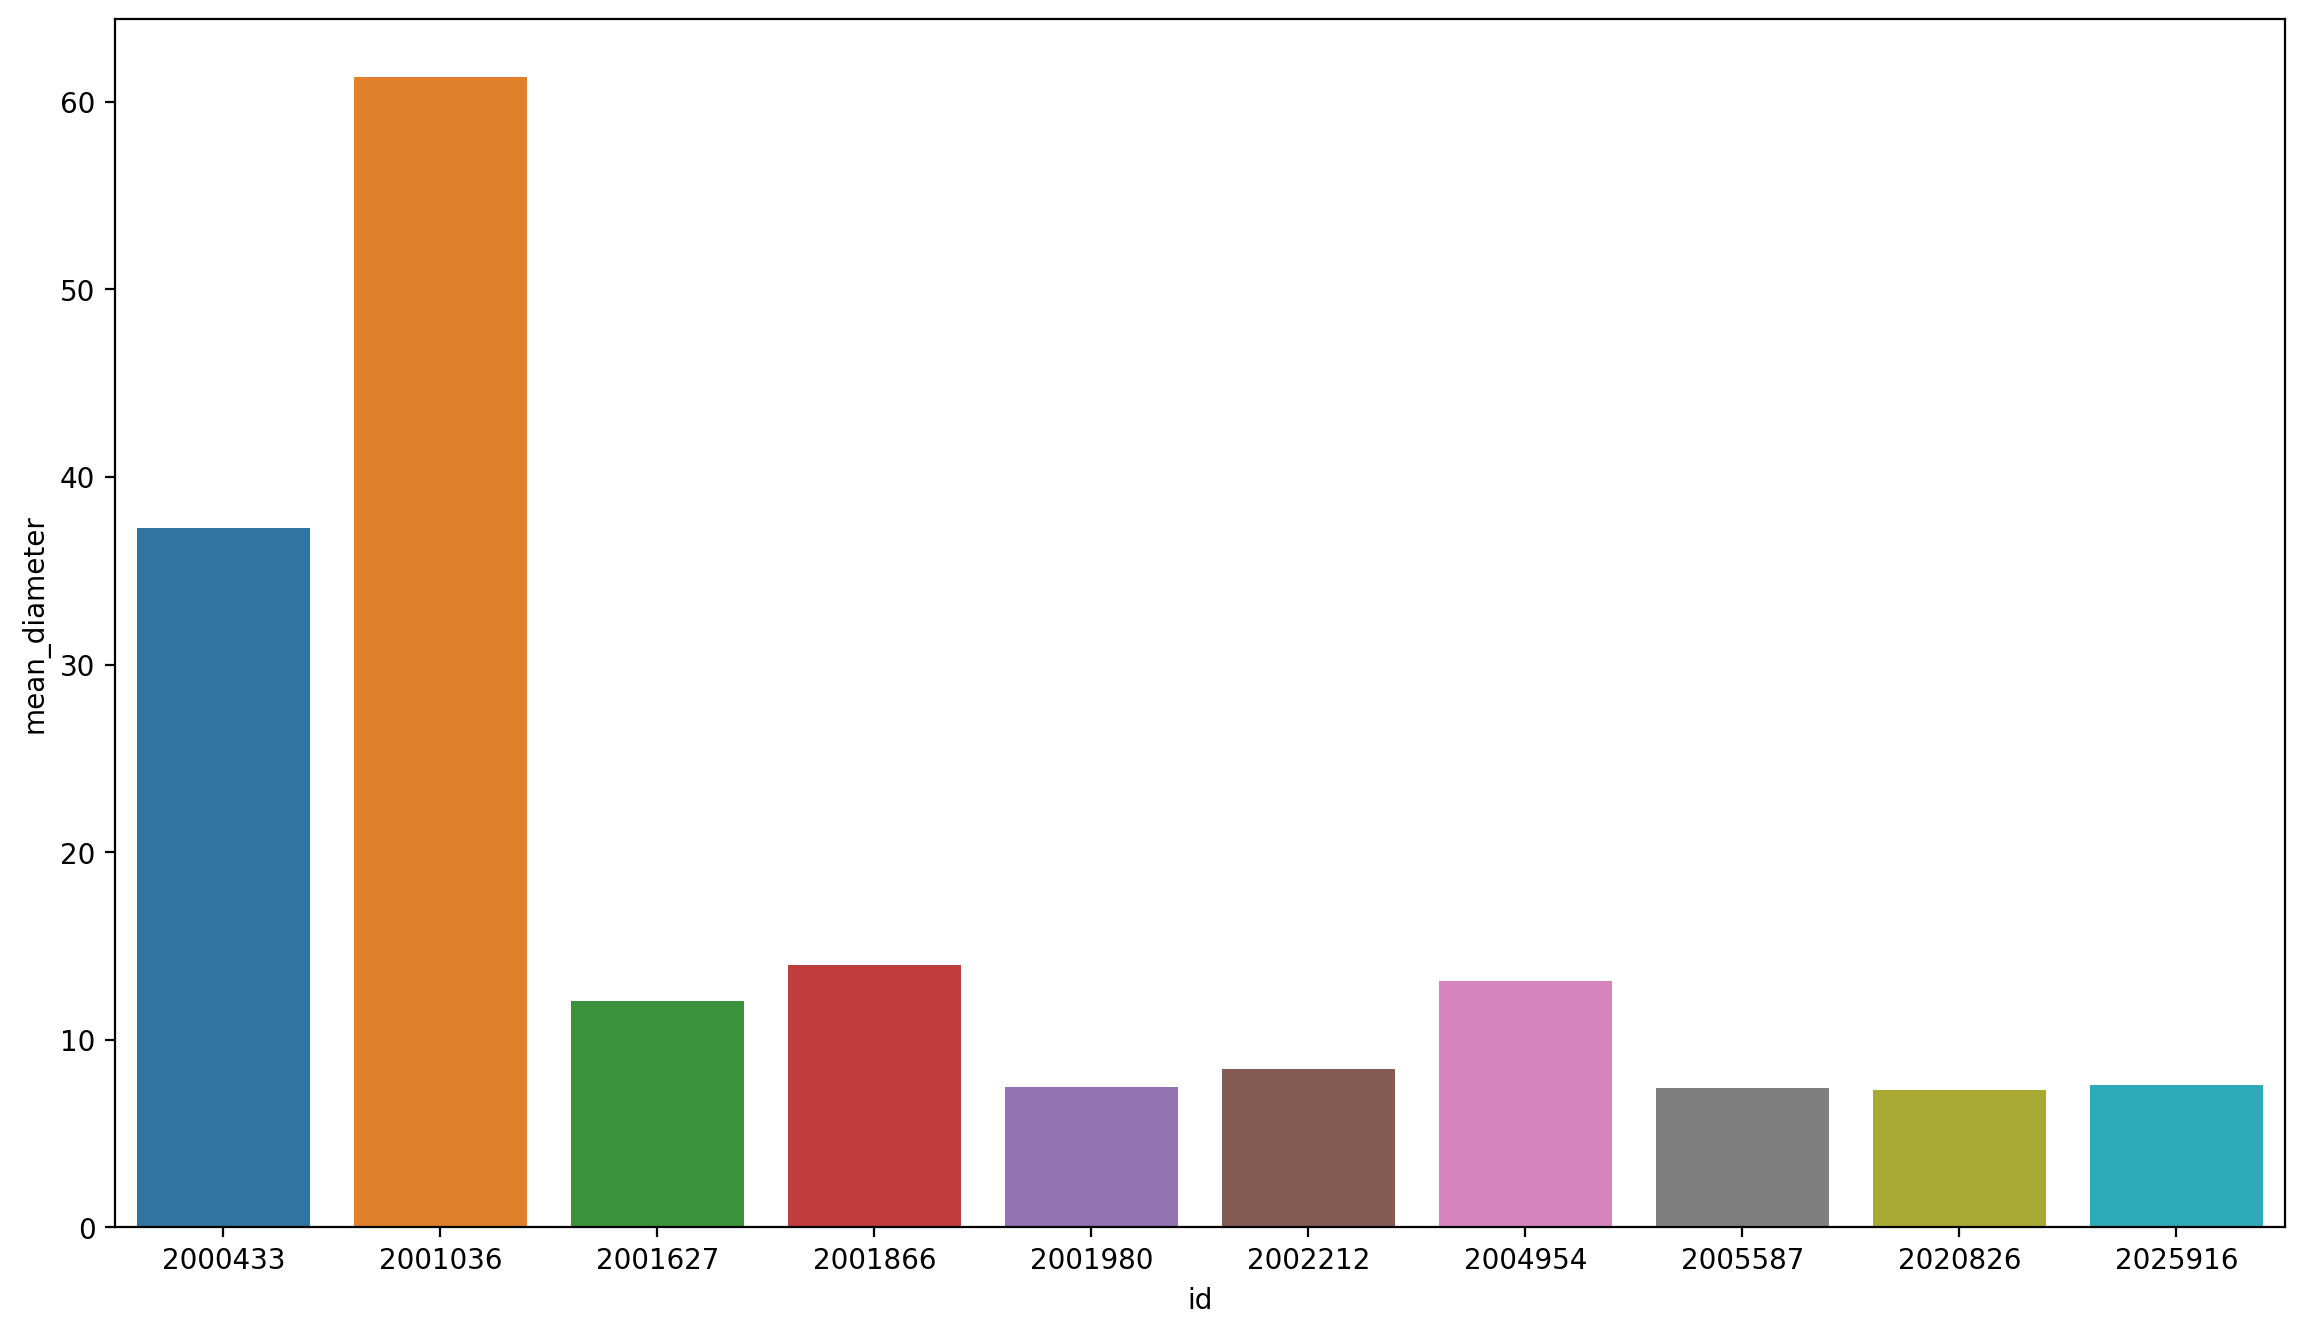

In [49]:
plt.figure(figsize=(14,8), dpi=200)
sns.barplot(x='id', 
            y='mean_diameter',
            data=df.nlargest(10, 'mean_diameter'))
#Top 10 Largest

<AxesSubplot:xlabel='hazardous', ylabel='mean_diameter'>

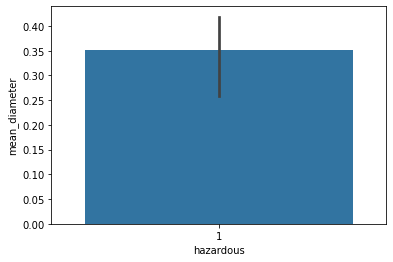

In [85]:
sns.barplot(x='hazardous', 
            y='mean_diameter',
            data=df.nlargest(5, 'hazardous'))

In [50]:
df

id  est_diameter_min  est_diameter_max  \
name                                                                
162635 (2000 SS164)   2162635          1.198271          2.679415   
277475 (2005 WK4)     2277475          0.265800          0.594347   
512244 (2015 YE18)    2512244          0.722030          1.614507   
(2012 BV13)           3596030          0.096506          0.215794   
(2014 GE35)           3667127          0.255009          0.570217   
...                       ...               ...               ...   
(2017 OL68)           3779523          0.176423          0.394494   
(2022 GA4)           54272756          0.232571          0.520044   
(2021 WR3)           54225015          0.310853          0.695088   
(2015 VK142)          3735178          0.350393          0.783502   
(1999 LV7)            3092229          0.347180          0.776319   

                     absolute_magnitude  hazardous   velocity_avg  \
name                                                                
162635 (2000 SS164)               16.73          0   13569.249224   
277475 (2005 WK4)                 20.00          1   37187.969051   
512244 (2015 YE18)                17.83          0   95258.903671   
(2012 BV13)                       22.20          0   43409.550520   
(2014 GE35)                       20.09          1   42580.419393   
...                                 ...        ...            ...   
(2017 OL68)                       20.89          0    4649.668900   
(2022 GA4)                        20.29          0   34153.422552   
(2021 WR3)                        19.66          0  103342.744852   
(2015 VK142)                      19.40          0   65388.349843   
(1999 LV7)                        19.42          0   60242.316201   

                     miss_distance_avg  mean_diameter  
name                                                   
162635 (2000 SS164)       5.483974e+07       1.938843  
277475 (2005 WK4)         3.504758e+07       0.430073  
512244 (2015 YE18)        4.794386e+07       1.168268  
(2012 BV13)               4.313247e+07       0.156150  
(2014 GE35)               4.659339e+07       0.412613  
...                                ...            ...  
(2017 OL68)               4.064435e+07       0.285458  
(2022 GA4)                3.376447e+07       0.376307  
(2021 WR3)                6.254685e+07       0.502971  
(2015 VK142)              6.344693e+07       0.566947  
(1999 LV7)                2.754936e+07       0.561749  

[27423 rows x 8 columns]

<AxesSubplot:xlabel='id', ylabel='mean_diameter'>

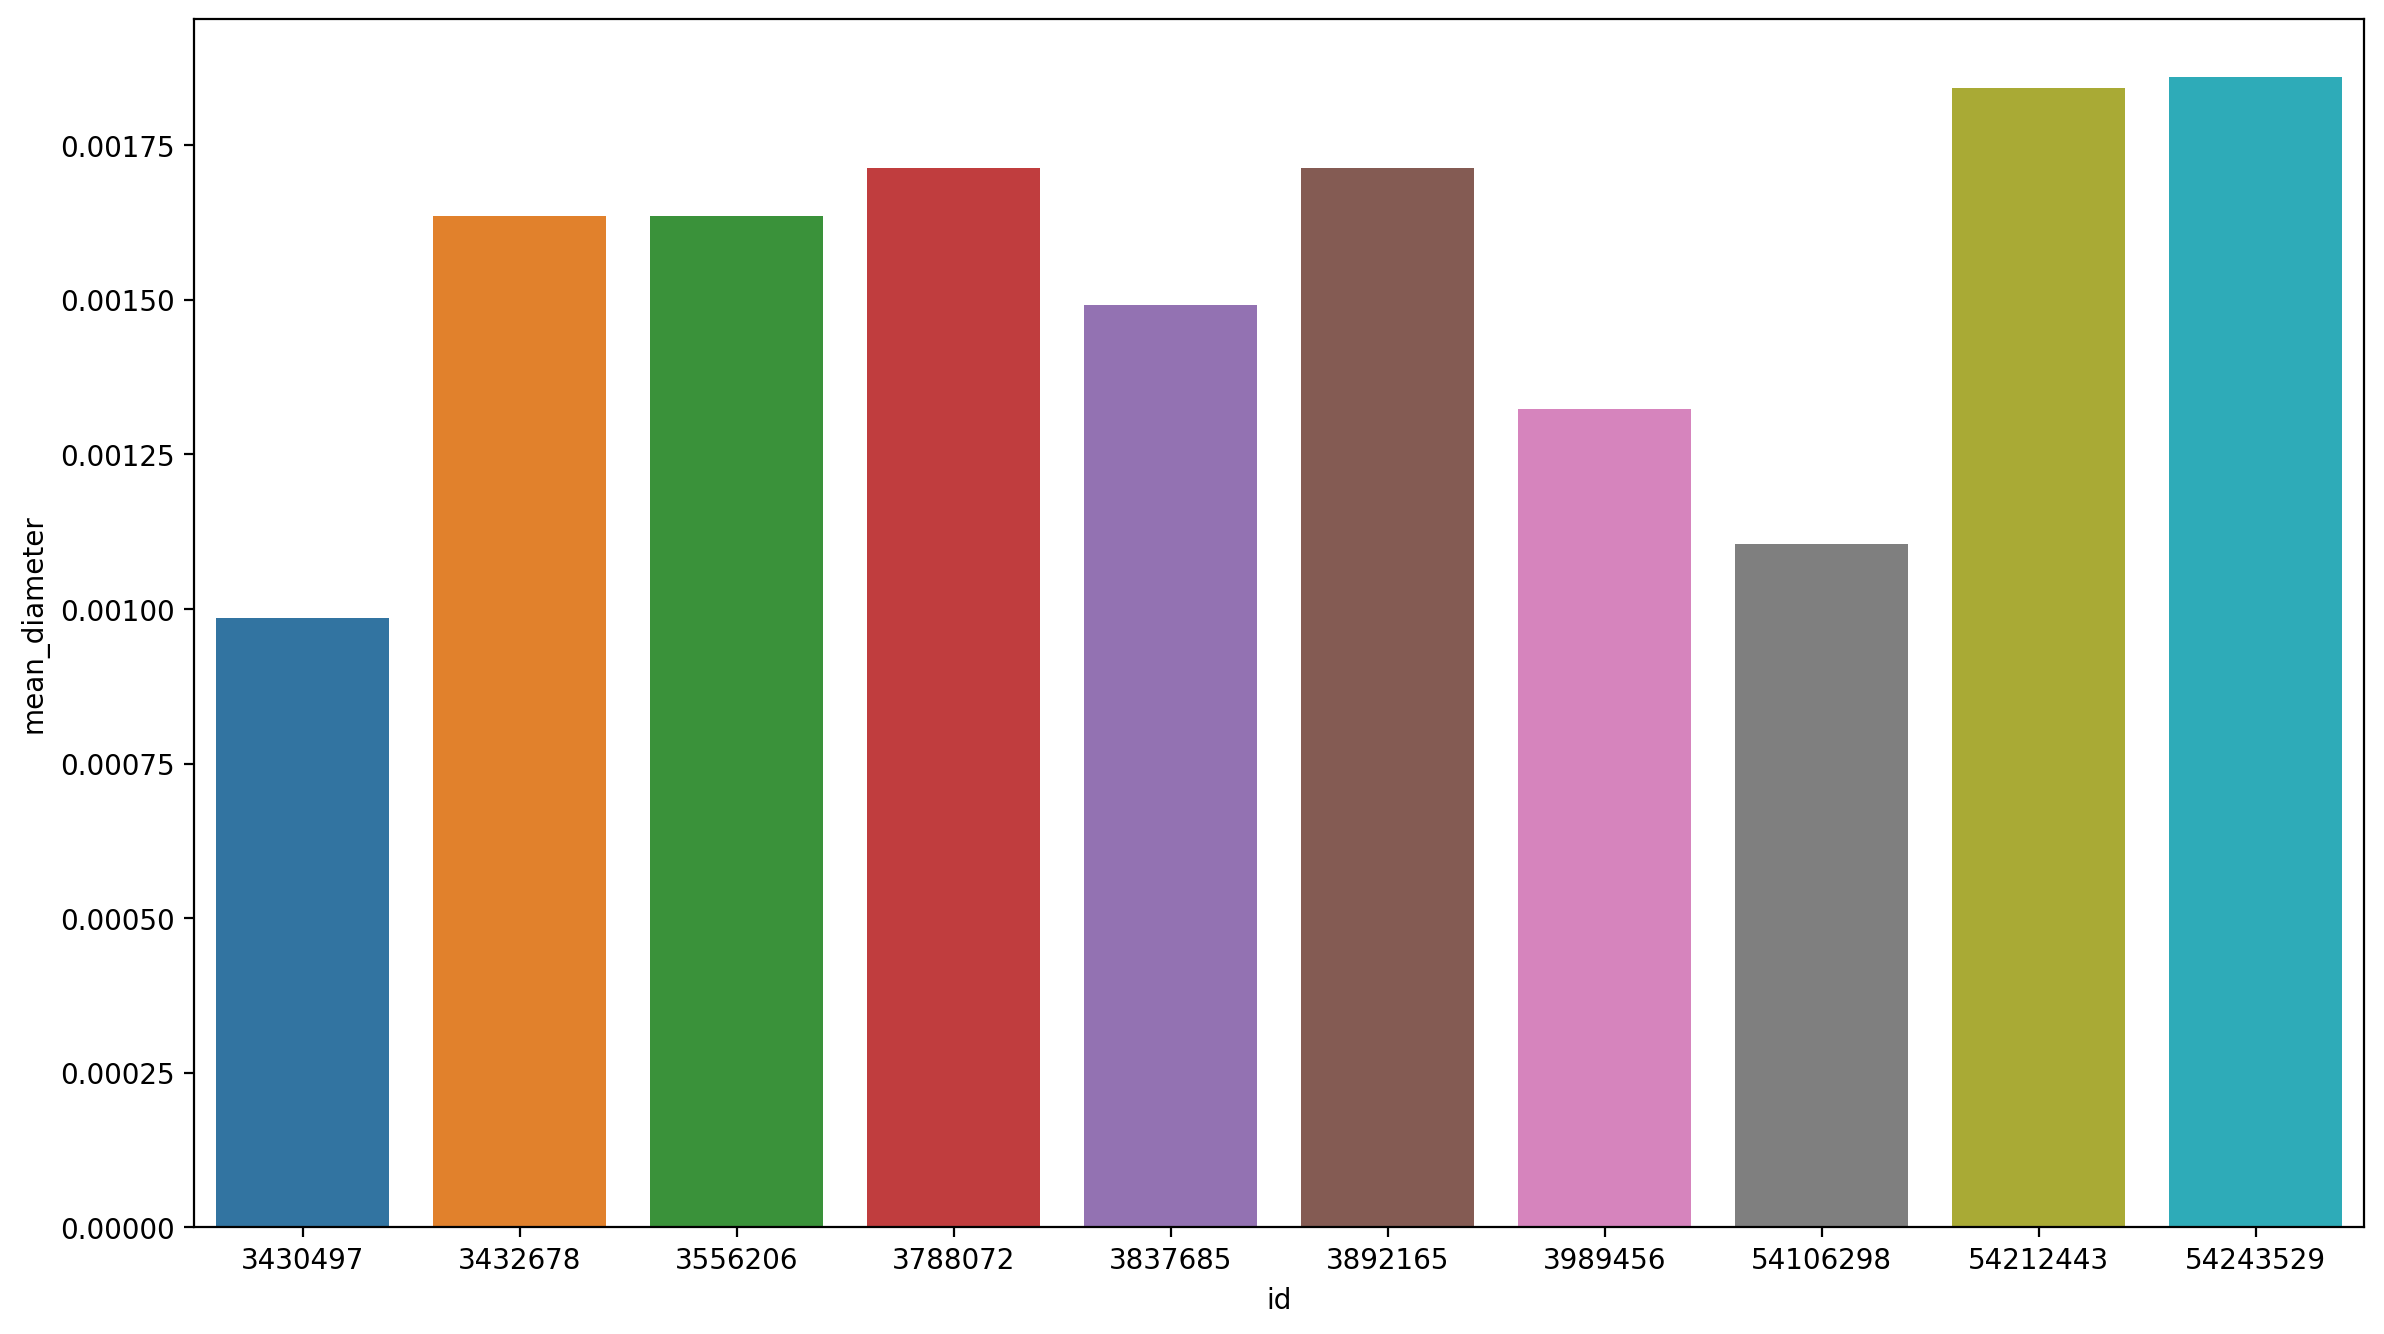

In [53]:
plt.figure(figsize=(14,8), dpi=200)
sns.barplot(x='id', 
            y='mean_diameter',
            data=df.nsmallest(10, 'mean_diameter'))
#Top 10 Smallest

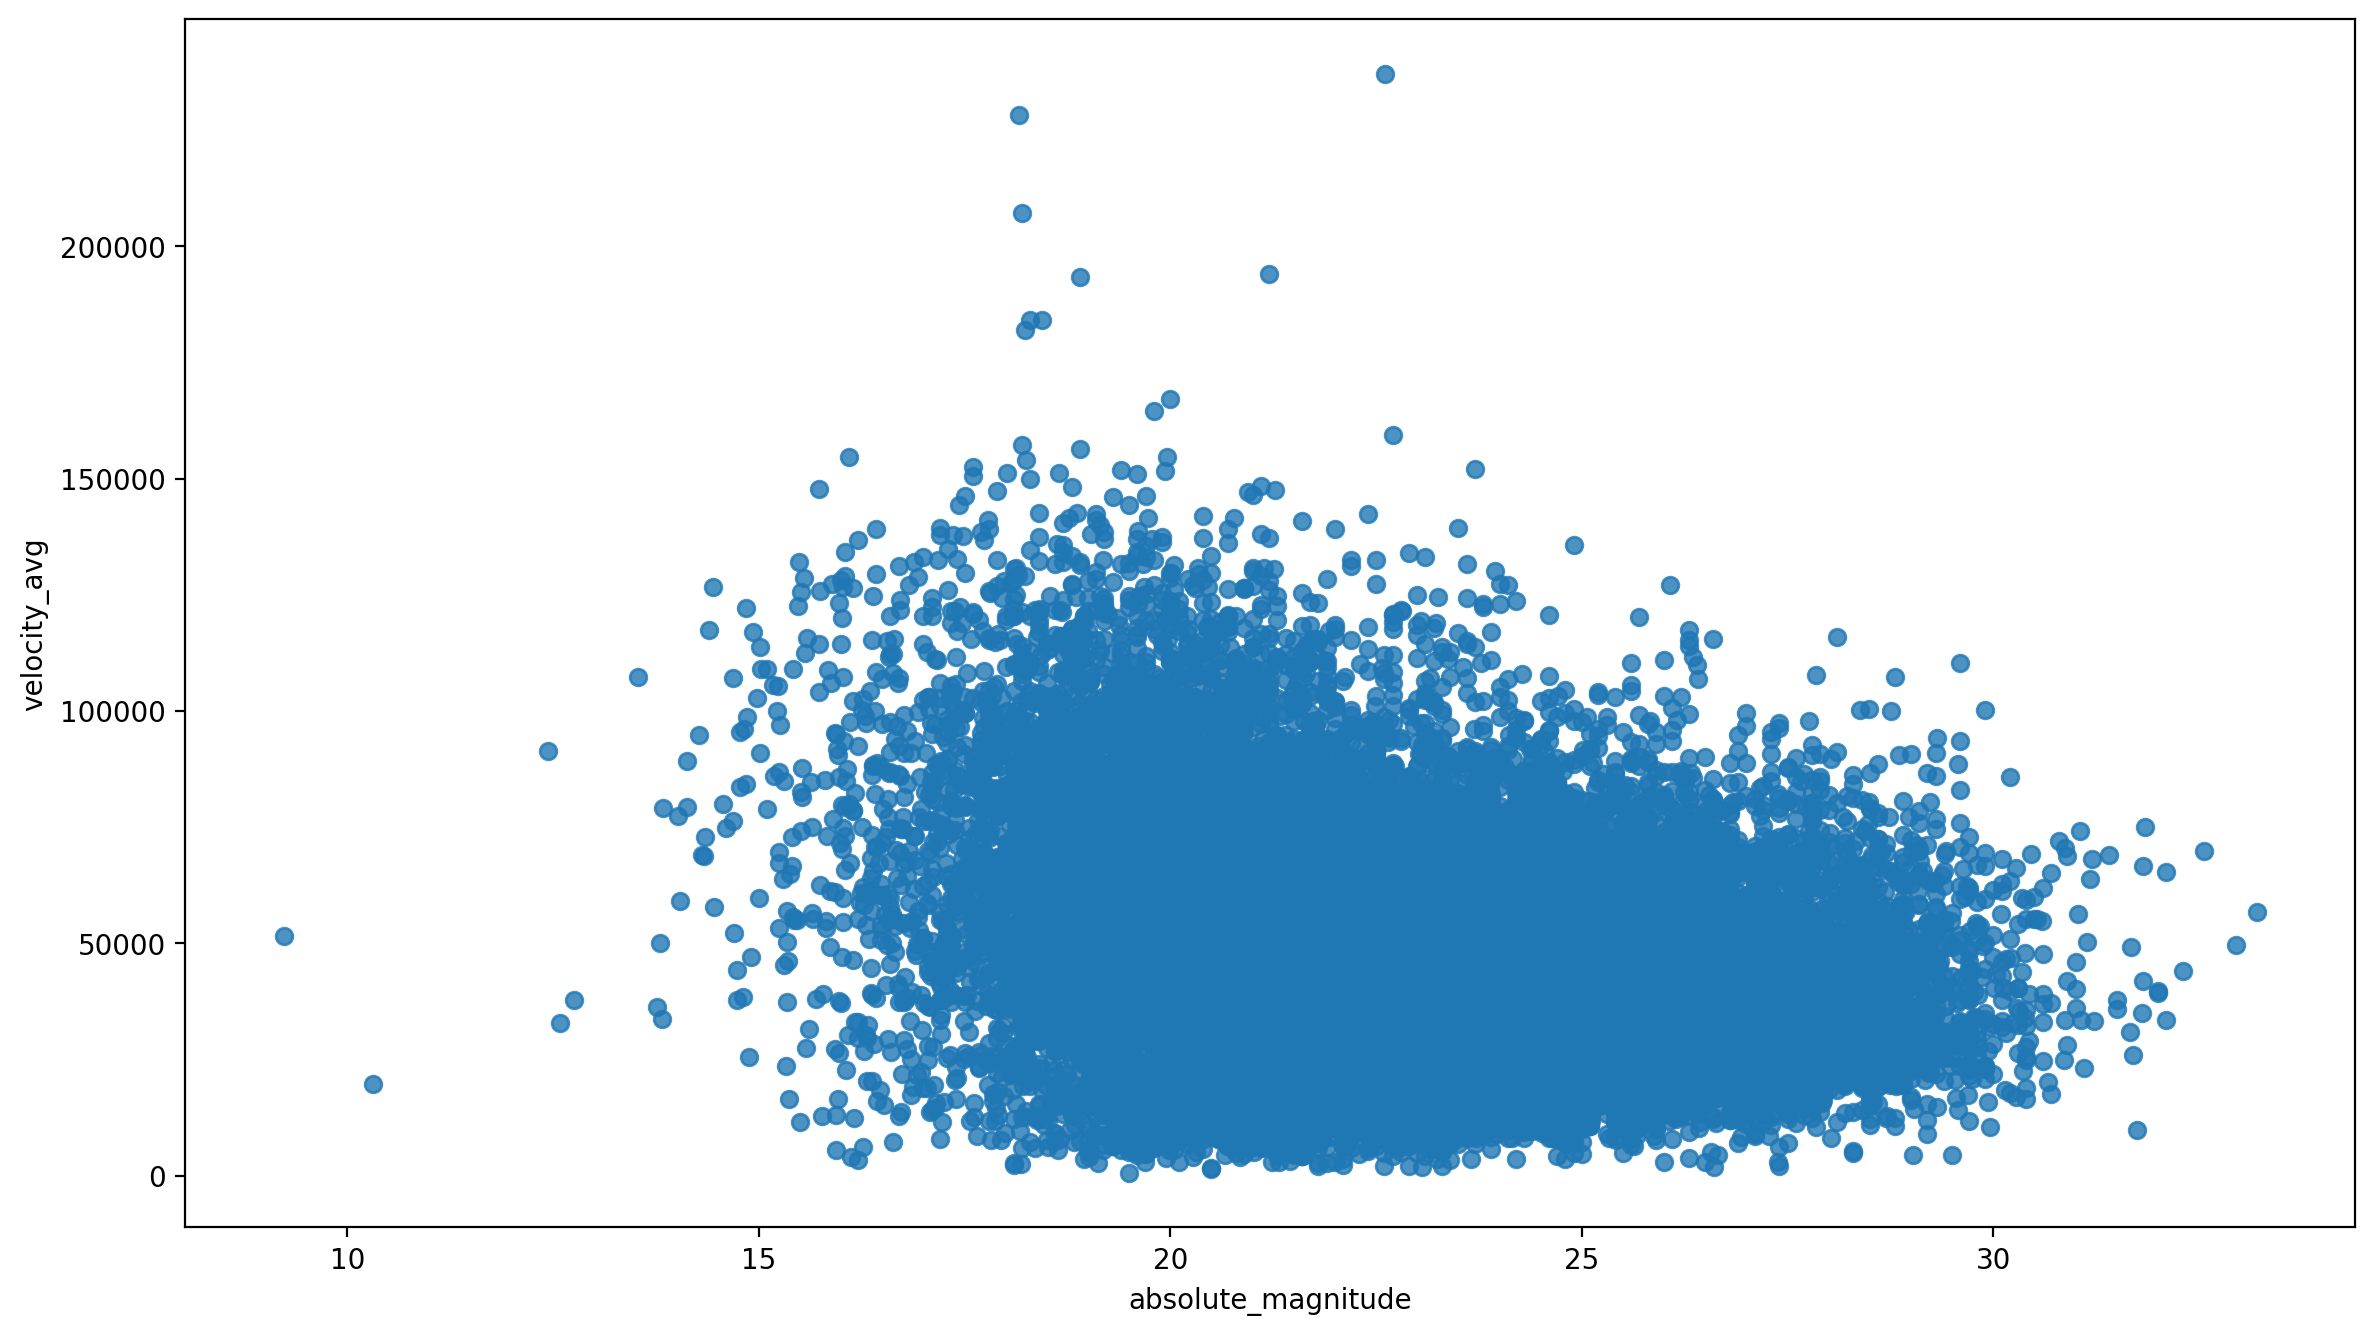

In [54]:
plt.figure(figsize=(14,8), dpi=200)
sns.regplot(x='absolute_magnitude', y='velocity_avg', data=df, fit_reg=False);

In [1]:
pip install altair vega_datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.8/812.8 kB 13.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.8/210.8 kB 6.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import vega_datasets as vd

In [2]:
import altair as alt

In [5]:
df

NameError: name 'df' is not defined

In [ ]:
source = df()

alt.Chart(source).mark_line().encode(
    x='date',
    y='price',
    color='symbol',
    strokeDash='symbol',
)

<AxesSubplot:xlabel='id', ylabel='velocity_avg'>

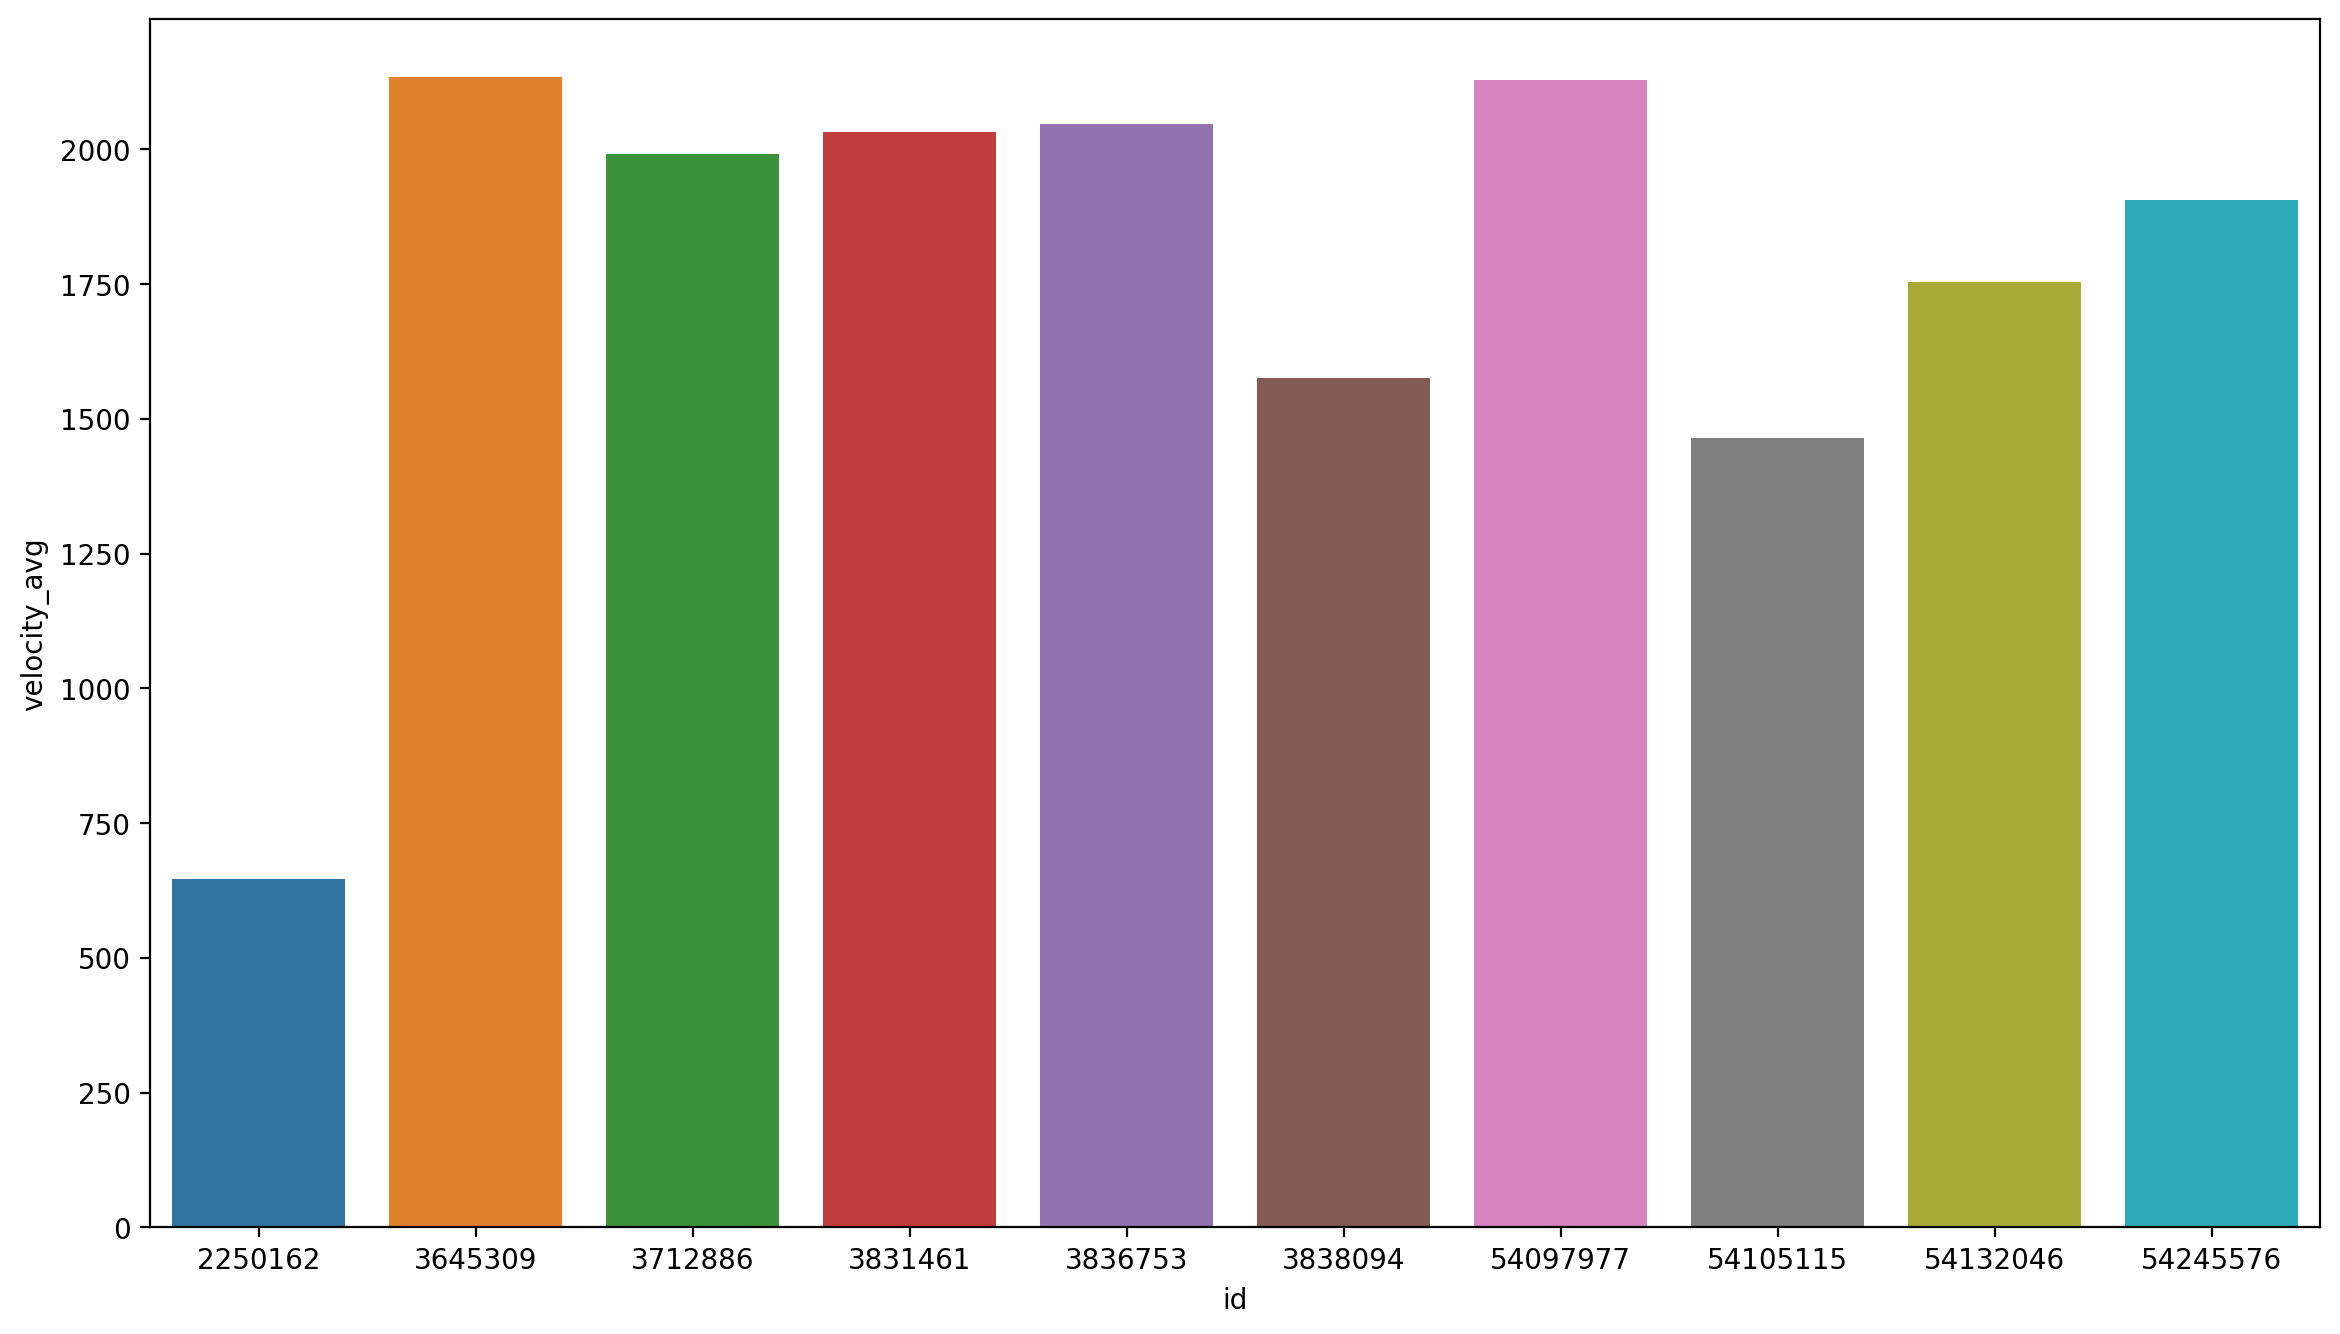

In [58]:
plt.figure(figsize=(14,8), dpi=200)
sns.barplot(x='id', 
            y='velocity_avg',
            data=df.nsmallest(10, 'velocity_avg'))
# top 10 slowest

<AxesSubplot:xlabel='id', ylabel='velocity_avg'>

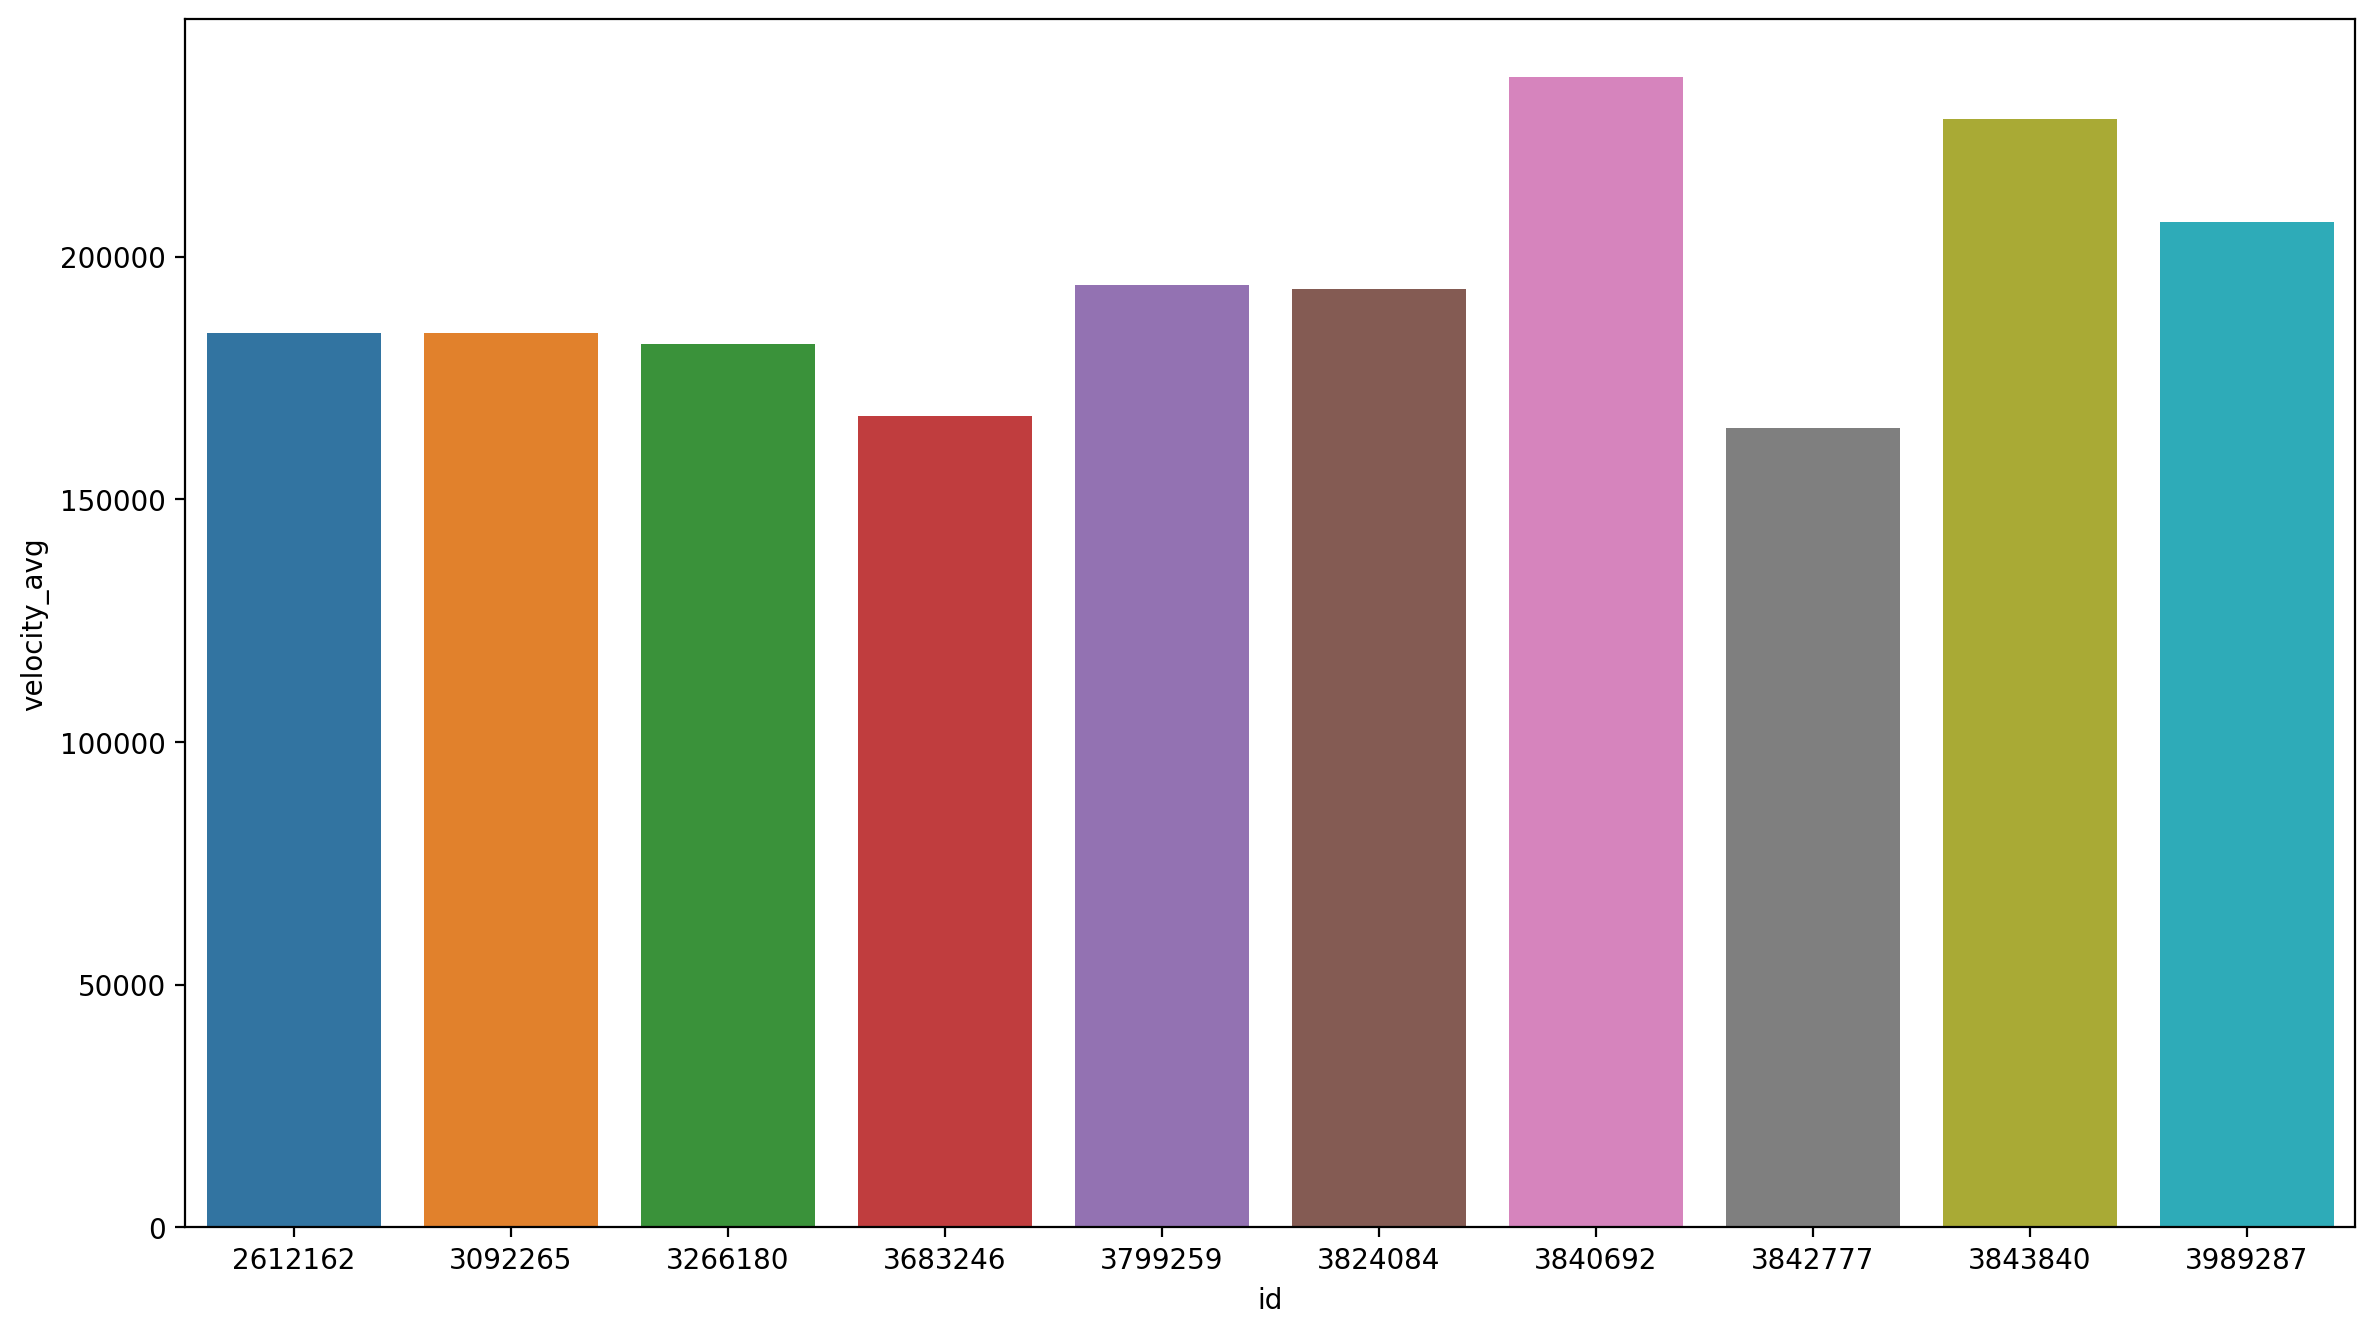

In [59]:
plt.figure(figsize=(14,8), dpi=200)
sns.barplot(x='id', 
            y='velocity_avg',
            data=df.nlargest(10, 'velocity_avg'))

In [63]:
df

id  est_diameter_min  est_diameter_max  \
name                                                                
162635 (2000 SS164)   2162635          1.198271          2.679415   
277475 (2005 WK4)     2277475          0.265800          0.594347   
512244 (2015 YE18)    2512244          0.722030          1.614507   
(2012 BV13)           3596030          0.096506          0.215794   
(2014 GE35)           3667127          0.255009          0.570217   
...                       ...               ...               ...   
(2017 OL68)           3779523          0.176423          0.394494   
(2022 GA4)           54272756          0.232571          0.520044   
(2021 WR3)           54225015          0.310853          0.695088   
(2015 VK142)          3735178          0.350393          0.783502   
(1999 LV7)            3092229          0.347180          0.776319   

                     absolute_magnitude  hazardous   velocity_avg  \
name                                                                
162635 (2000 SS164)               16.73          0   13569.249224   
277475 (2005 WK4)                 20.00          1   37187.969051   
512244 (2015 YE18)                17.83          0   95258.903671   
(2012 BV13)                       22.20          0   43409.550520   
(2014 GE35)                       20.09          1   42580.419393   
...                                 ...        ...            ...   
(2017 OL68)                       20.89          0    4649.668900   
(2022 GA4)                        20.29          0   34153.422552   
(2021 WR3)                        19.66          0  103342.744852   
(2015 VK142)                      19.40          0   65388.349843   
(1999 LV7)                        19.42          0   60242.316201   

                     miss_distance_avg  mean_diameter  
name                                                   
162635 (2000 SS164)       5.483974e+07       1.938843  
277475 (2005 WK4)         3.504758e+07       0.430073  
512244 (2015 YE18)        4.794386e+07       1.168268  
(2012 BV13)               4.313247e+07       0.156150  
(2014 GE35)               4.659339e+07       0.412613  
...                                ...            ...  
(2017 OL68)               4.064435e+07       0.285458  
(2022 GA4)                3.376447e+07       0.376307  
(2021 WR3)                6.254685e+07       0.502971  
(2015 VK142)              6.344693e+07       0.566947  
(1999 LV7)                2.754936e+07       0.561749  

[27423 rows x 8 columns]

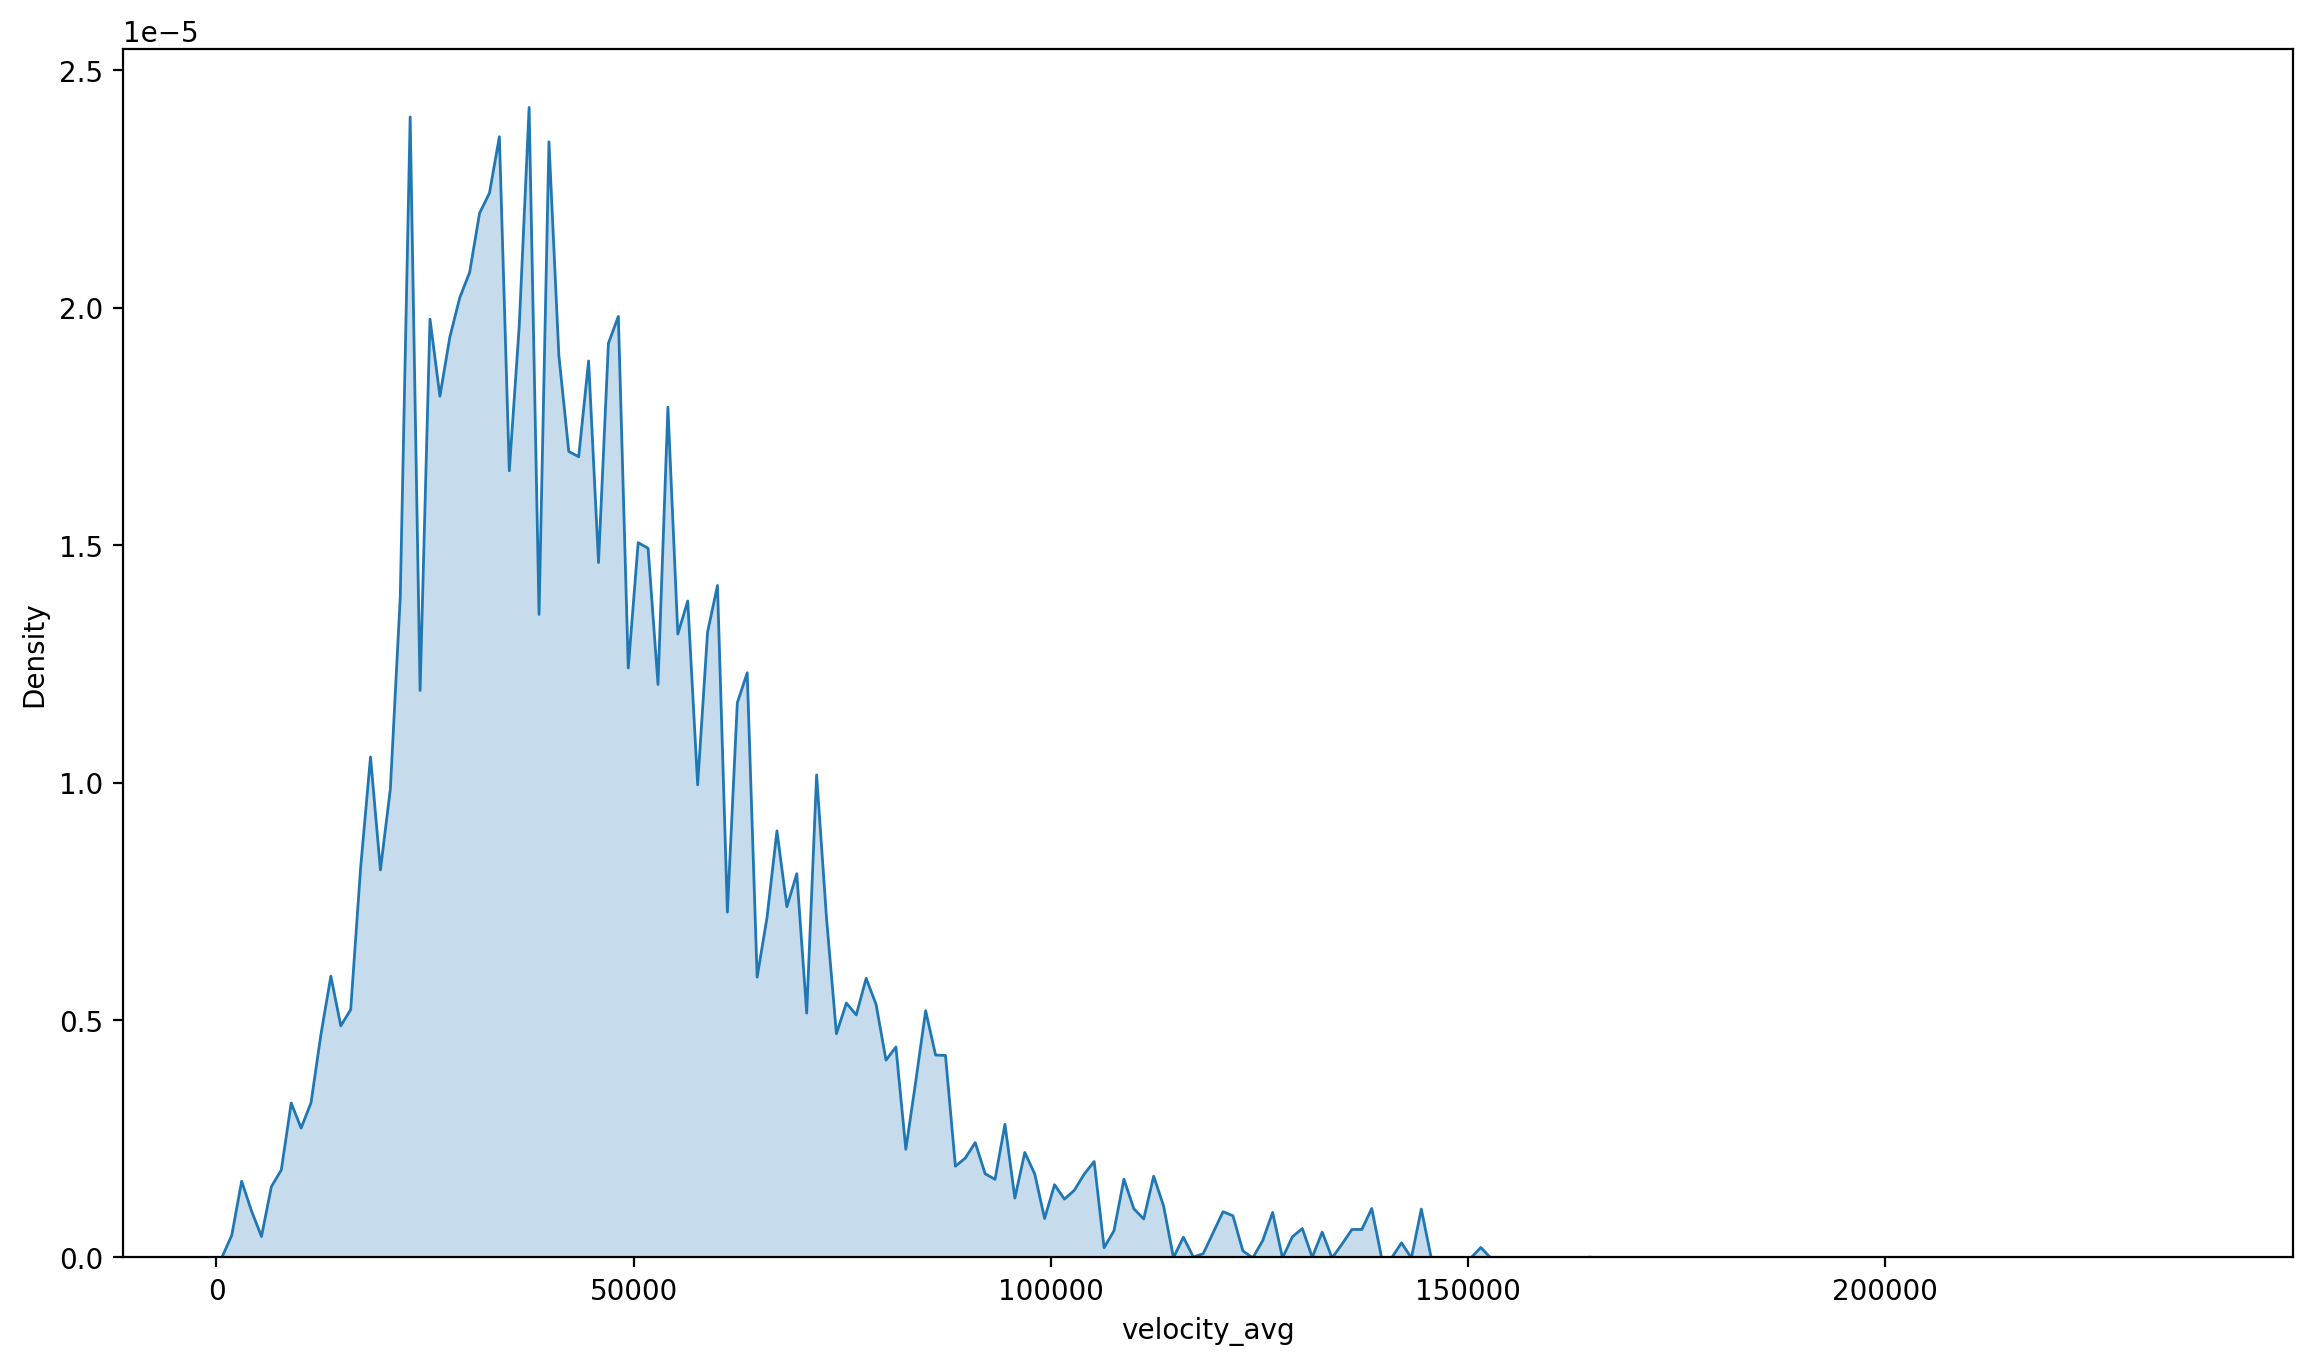

In [71]:
plt.figure(figsize=(14,8), dpi=200)
sns.kdeplot(x=neo_cleaned['velocity_avg'],bw_adjust=0.007,fill=True);

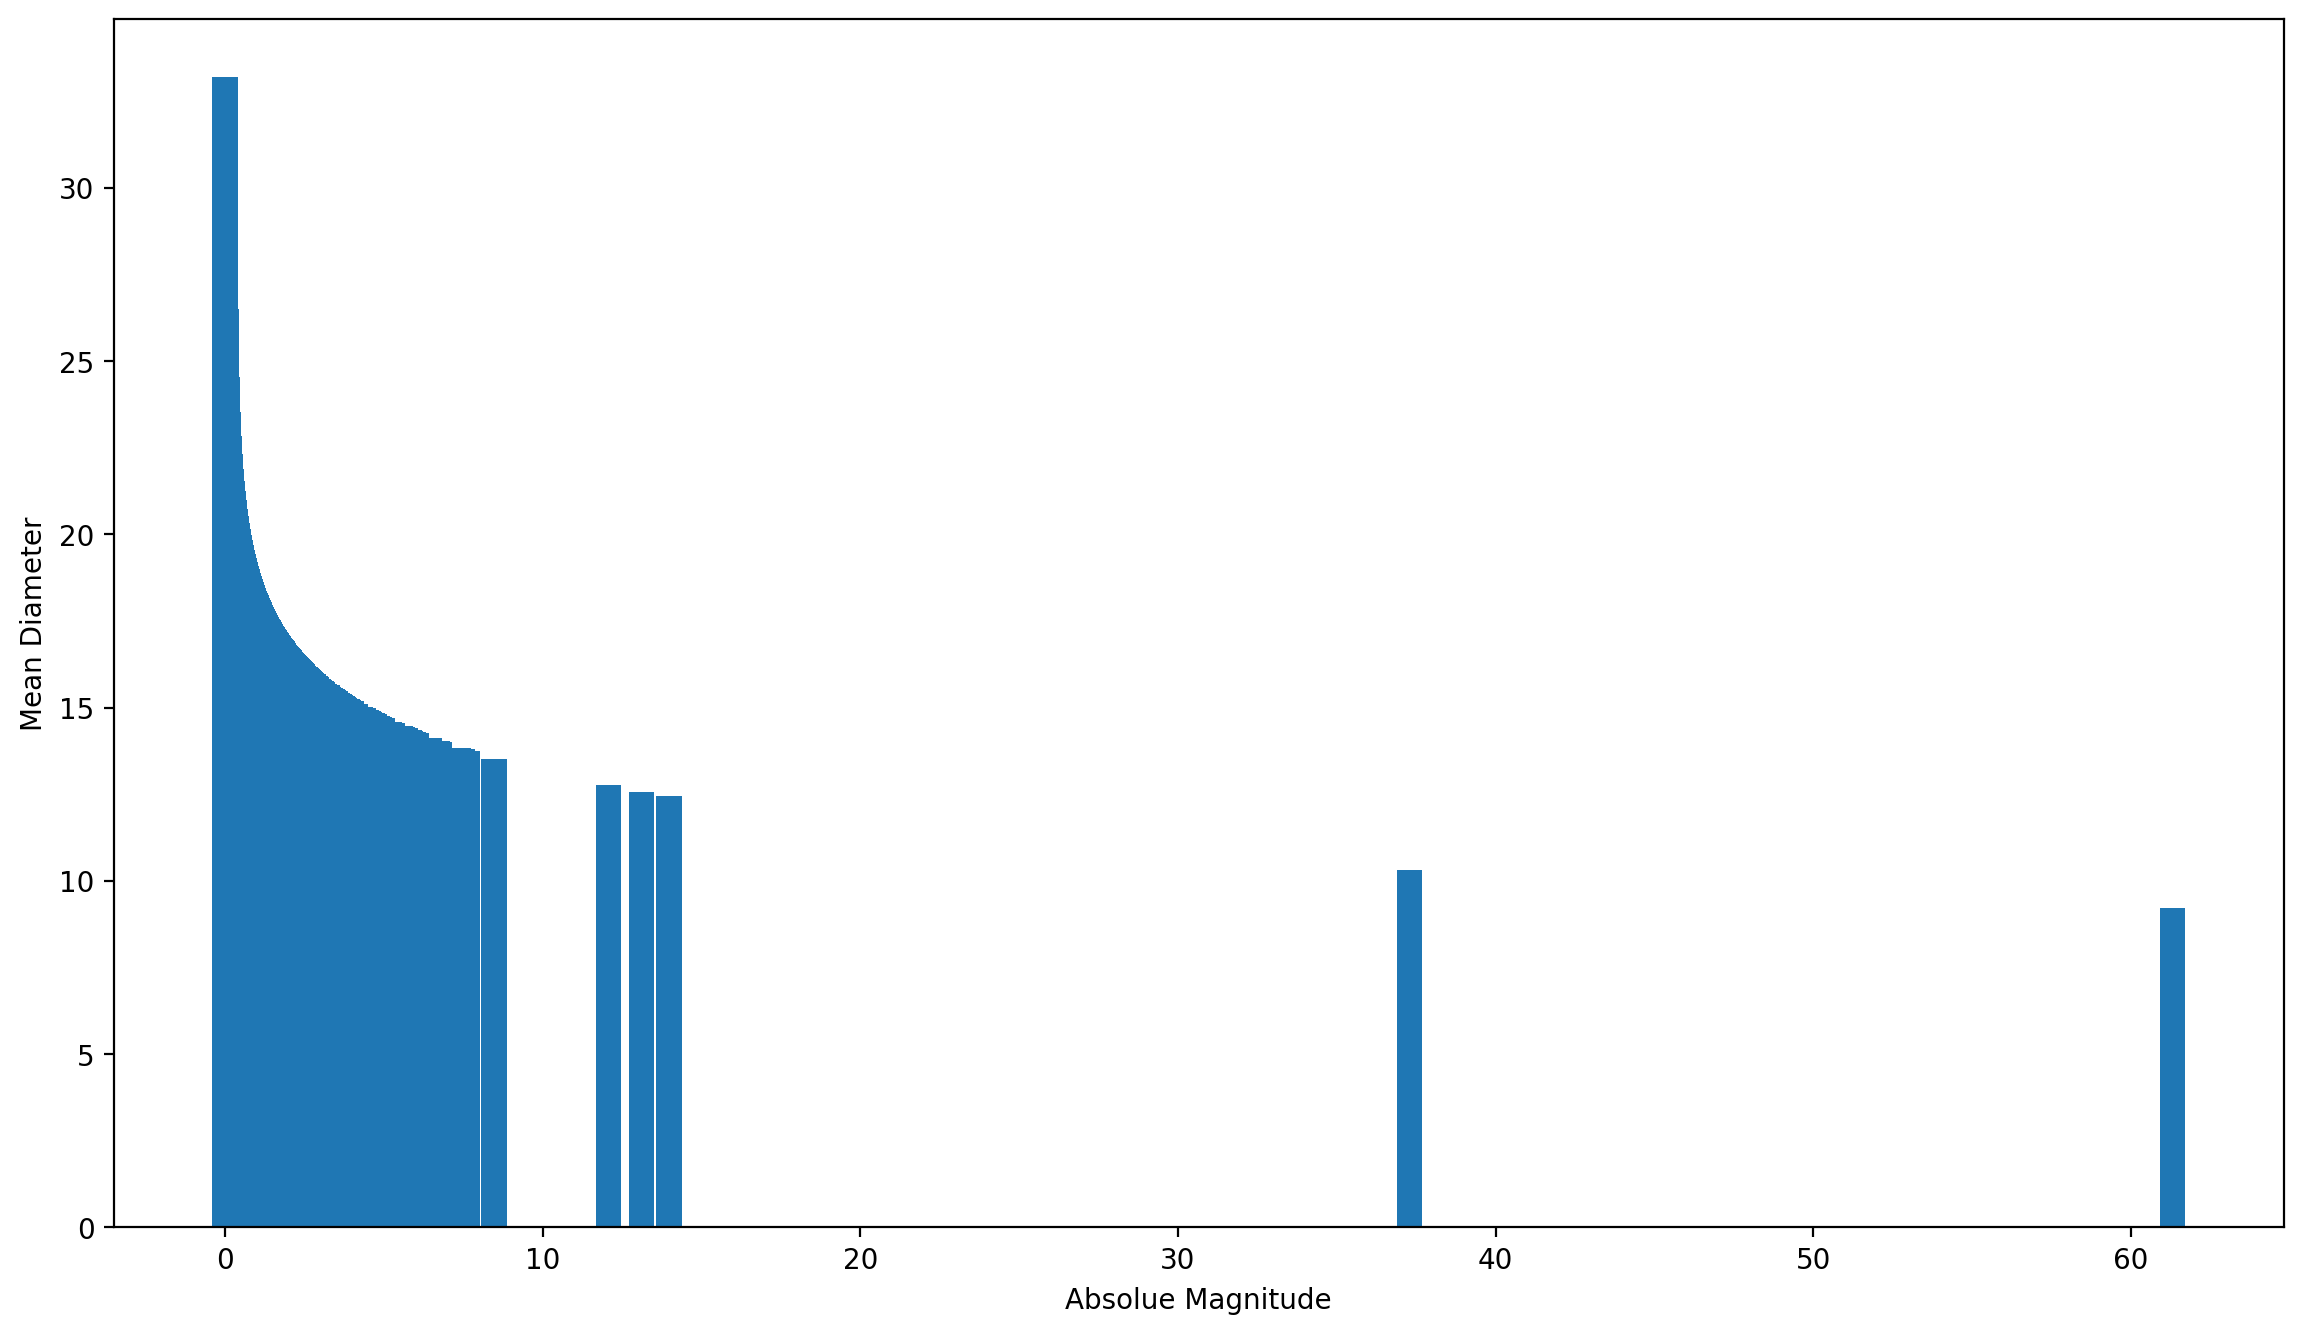

In [72]:
plt.figure(figsize=(14,8), dpi=200)
plt.bar(neo_cleaned['mean_diameter'], neo_cleaned['absolute_magnitude'])
plt.xlabel("Absolue Magnitude")
plt.ylabel("Mean Diameter")
plt.show()

<AxesSubplot:xlabel='mean_diameter', ylabel='velocity_avg'>

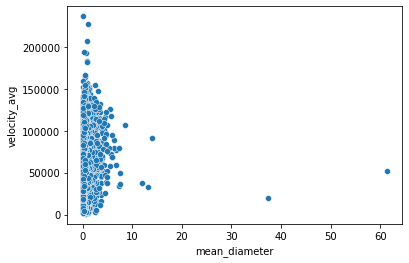

In [66]:
sns.scatterplot(x='mean_diameter', y='velocity_avg', data=neo_cleaned)

In [73]:
df

id  est_diameter_min  est_diameter_max  \
name                                                                
162635 (2000 SS164)   2162635          1.198271          2.679415   
277475 (2005 WK4)     2277475          0.265800          0.594347   
512244 (2015 YE18)    2512244          0.722030          1.614507   
(2012 BV13)           3596030          0.096506          0.215794   
(2014 GE35)           3667127          0.255009          0.570217   
...                       ...               ...               ...   
(2017 OL68)           3779523          0.176423          0.394494   
(2022 GA4)           54272756          0.232571          0.520044   
(2021 WR3)           54225015          0.310853          0.695088   
(2015 VK142)          3735178          0.350393          0.783502   
(1999 LV7)            3092229          0.347180          0.776319   

                     absolute_magnitude  hazardous   velocity_avg  \
name                                                                
162635 (2000 SS164)               16.73          0   13569.249224   
277475 (2005 WK4)                 20.00          1   37187.969051   
512244 (2015 YE18)                17.83          0   95258.903671   
(2012 BV13)                       22.20          0   43409.550520   
(2014 GE35)                       20.09          1   42580.419393   
...                                 ...        ...            ...   
(2017 OL68)                       20.89          0    4649.668900   
(2022 GA4)                        20.29          0   34153.422552   
(2021 WR3)                        19.66          0  103342.744852   
(2015 VK142)                      19.40          0   65388.349843   
(1999 LV7)                        19.42          0   60242.316201   

                     miss_distance_avg  mean_diameter  
name                                                   
162635 (2000 SS164)       5.483974e+07       1.938843  
277475 (2005 WK4)         3.504758e+07       0.430073  
512244 (2015 YE18)        4.794386e+07       1.168268  
(2012 BV13)               4.313247e+07       0.156150  
(2014 GE35)               4.659339e+07       0.412613  
...                                ...            ...  
(2017 OL68)               4.064435e+07       0.285458  
(2022 GA4)                3.376447e+07       0.376307  
(2021 WR3)                6.254685e+07       0.502971  
(2015 VK142)              6.344693e+07       0.566947  
(1999 LV7)                2.754936e+07       0.561749  

[27423 rows x 8 columns]

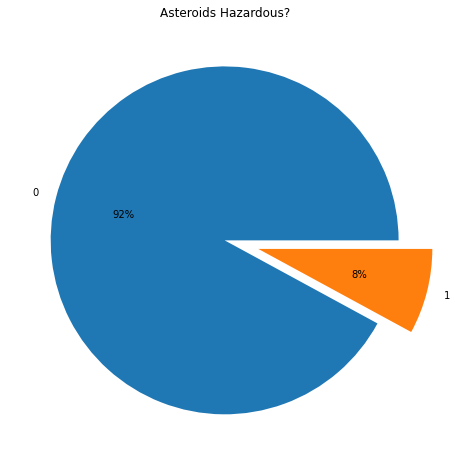

In [76]:
y=df["hazardous"].value_counts()
y
y=list(y)
y
labels=["0","1"]
explode = [0, 0.2]
fig = plt.figure(figsize = (10, 8))
plt.pie(y,labels=labels, autopct='%.0f%%',explode = explode)
plt.title('Asteroids Hazardous?')
plt.show()

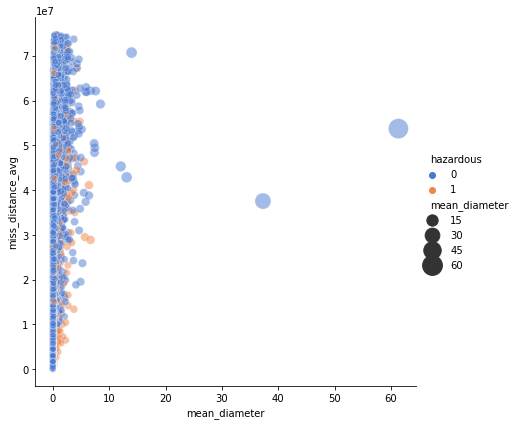

In [79]:
sns.relplot(x='mean_diameter', y='miss_distance_avg', hue='hazardous', size='mean_diameter',
            sizes=(40, 400), alpha=.5, palette='muted',
            height=6, data=df)

In [80]:
df

id  est_diameter_min  est_diameter_max  \
name                                                                
162635 (2000 SS164)   2162635          1.198271          2.679415   
277475 (2005 WK4)     2277475          0.265800          0.594347   
512244 (2015 YE18)    2512244          0.722030          1.614507   
(2012 BV13)           3596030          0.096506          0.215794   
(2014 GE35)           3667127          0.255009          0.570217   
...                       ...               ...               ...   
(2017 OL68)           3779523          0.176423          0.394494   
(2022 GA4)           54272756          0.232571          0.520044   
(2021 WR3)           54225015          0.310853          0.695088   
(2015 VK142)          3735178          0.350393          0.783502   
(1999 LV7)            3092229          0.347180          0.776319   

                     absolute_magnitude  hazardous   velocity_avg  \
name                                                                
162635 (2000 SS164)               16.73          0   13569.249224   
277475 (2005 WK4)                 20.00          1   37187.969051   
512244 (2015 YE18)                17.83          0   95258.903671   
(2012 BV13)                       22.20          0   43409.550520   
(2014 GE35)                       20.09          1   42580.419393   
...                                 ...        ...            ...   
(2017 OL68)                       20.89          0    4649.668900   
(2022 GA4)                        20.29          0   34153.422552   
(2021 WR3)                        19.66          0  103342.744852   
(2015 VK142)                      19.40          0   65388.349843   
(1999 LV7)                        19.42          0   60242.316201   

                     miss_distance_avg  mean_diameter  
name                                                   
162635 (2000 SS164)       5.483974e+07       1.938843  
277475 (2005 WK4)         3.504758e+07       0.430073  
512244 (2015 YE18)        4.794386e+07       1.168268  
(2012 BV13)               4.313247e+07       0.156150  
(2014 GE35)               4.659339e+07       0.412613  
...                                ...            ...  
(2017 OL68)               4.064435e+07       0.285458  
(2022 GA4)                3.376447e+07       0.376307  
(2021 WR3)                6.254685e+07       0.502971  
(2015 VK142)              6.344693e+07       0.566947  
(1999 LV7)                2.754936e+07       0.561749  

[27423 rows x 8 columns]

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


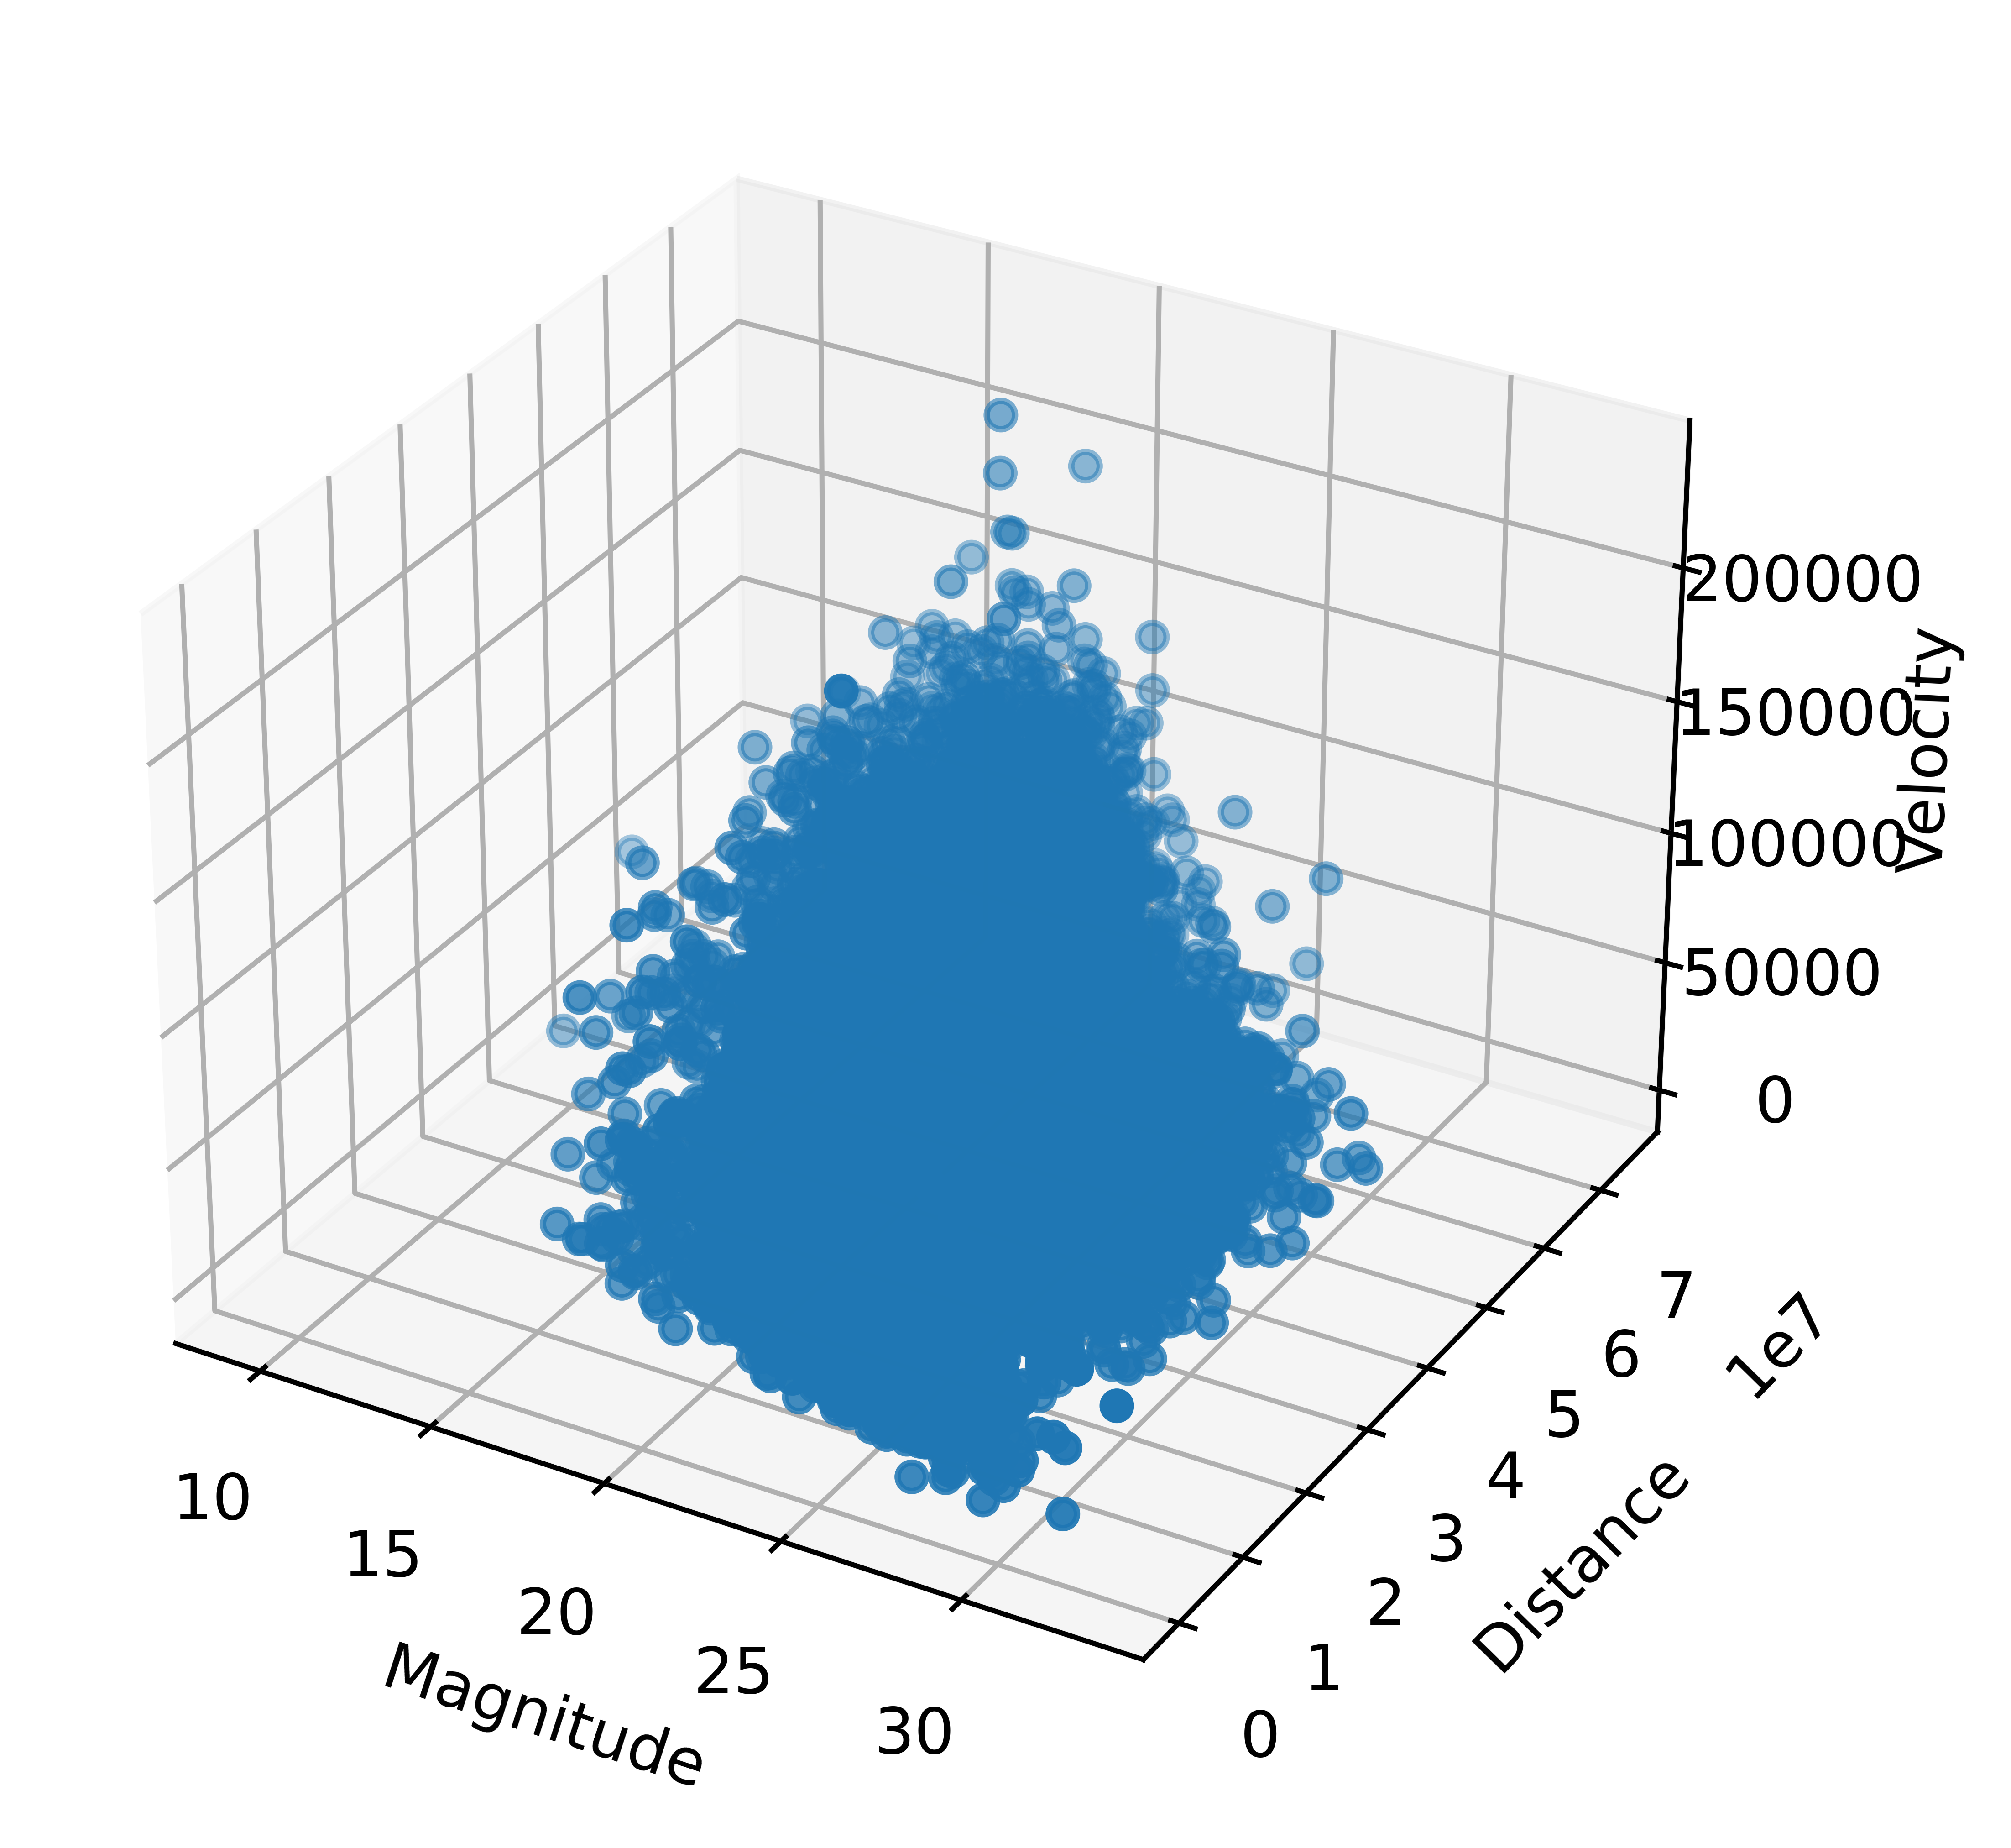

In [98]:
plt.figure(figsize=(15,5), dpi=1000)
axes = plt.axes(projection='3d')
print(type(axes))
axes.scatter3D(df.absolute_magnitude, df.miss_distance_avg, df.velocity_avg)
axes.set_xlabel('Magnitude')
axes.set_ylabel('Distance')
axes.set_zlabel('Velocity')
plt.show();

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


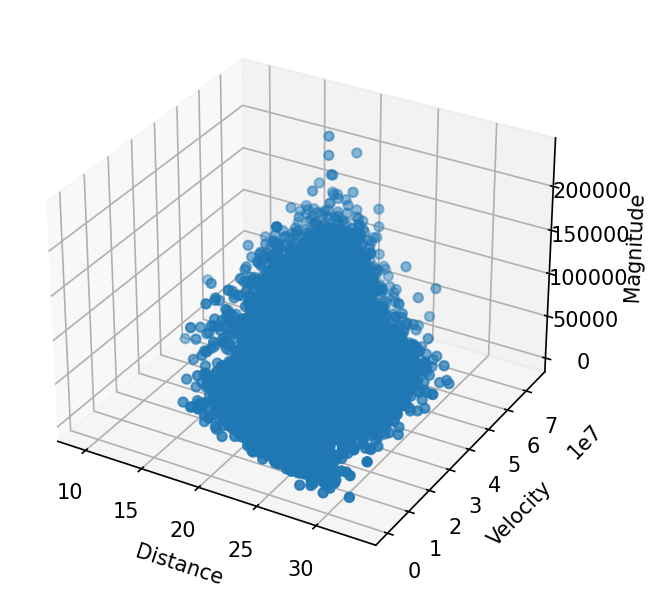

In [106]:
plt.figure(figsize=(5,5), dpi=150)
axes = plt.axes(projection='3d')
print(type(axes))
axes.scatter3D(df.absolute_magnitude, df.miss_distance_avg, df.velocity_avg)
axes.set_zlabel('Magnitude')
axes.set_xlabel('Distance')
axes.set_ylabel('Velocity')
plt.show();

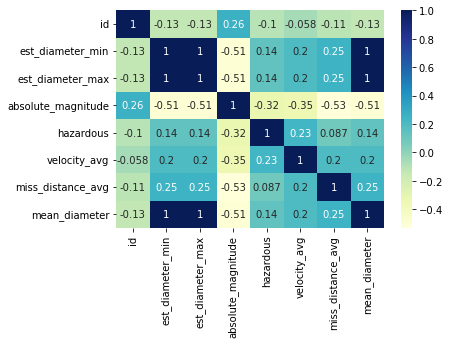

In [94]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()